In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 128)              16512     
 se)                                                             
                                                             

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 5ms/step - loss: 0.2212 - rmse: 0.4703
Epoch 2/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2209 - rmse: 0.4700
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2206 - rmse: 0.4697
Epoch 4/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2203 - rmse: 0.4693
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2199 - rmse: 0.4690
Epoch 6/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2196 - rmse: 0.4686
Epoch 7/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2192 - rmse: 0.4681
Epoch 8/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2187 - rmse: 0.4677
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2183 - rmse: 0.4672
Epoch 10/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2178 - rmse: 0.4667
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.0753 - rmse: 0.2745
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0751 - rmse: 0.2740
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0748 - rmse: 0.2735
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0745 - rmse: 0.2730
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0742 - rmse: 0.2725
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0740 - rmse: 0.2719
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0736 - rmse: 0.2714
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0734 - rmse: 0.2709
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0731 - rmse: 0.2703
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0728 - rmse: 0.2698
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 0.0605 - rmse: 0.2459
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0604 - rmse: 0.2457
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0605 - rmse: 0.2459
Epoch 173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0605 - rmse: 0.2460
Epoch 174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0607 - rmse: 0.2464
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0609 - rmse: 0.2468
Epoch 176/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0612 - rmse: 0.2474
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0615 - rmse: 0.2480
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0616 - rmse: 0.2481
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0615 - rmse: 0.2479
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0487 - rmse: 0.2208
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0487 - rmse: 0.2206
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0487 - rmse: 0.2207
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0487 - rmse: 0.2207
Epoch 258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0485 - rmse: 0.2203
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0483 - rmse: 0.2197
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0479 - rmse: 0.2189
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0476 - rmse: 0.2183
Epoch 262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0473 - rmse: 0.2176
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0471 - rmse: 0.2171
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0348 - rmse: 0.1866
Epoch 339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0349 - rmse: 0.1869
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0350 - rmse: 0.1870
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0350 - rmse: 0.1870
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0350 - rmse: 0.1872
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0350 - rmse: 0.1870
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0346 - rmse: 0.1861
Epoch 345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0341 - rmse: 0.1847
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.1831
Epoch 347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0330 - rmse: 0.1816
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 423/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 425/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 508/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0802
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0788
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 592/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 593/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 594/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 598/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 3.0369e-04 - rmse: 0.0174
Epoch 672/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0113e-04 - rmse: 0.0174
Epoch 673/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9845e-04 - rmse: 0.0173
Epoch 674/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9576e-04 - rmse: 0.0172
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9330e-04 - rmse: 0.0171
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9094e-04 - rmse: 0.0171
Epoch 677/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8871e-04 - rmse: 0.0170
Epoch 678/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8769e-04 - rmse: 0.0170
Epoch 679/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8599e-04 - rmse: 0.0169
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8385e-04 - rmse: 0.0168
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 1.9909e-04 - rmse: 0.0141
Epoch 753/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9739e-04 - rmse: 0.0140
Epoch 754/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9567e-04 - rmse: 0.0140
Epoch 755/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9417e-04 - rmse: 0.0139
Epoch 756/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9308e-04 - rmse: 0.0139
Epoch 757/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9234e-04 - rmse: 0.0139
Epoch 758/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9203e-04 - rmse: 0.0139
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9110e-04 - rmse: 0.0138
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8991e-04 - rmse: 0.0138
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8881e-04 - rmse: 0.0137
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 1.3752e-04 - rmse: 0.0117
Epoch 834/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3848e-04 - rmse: 0.0118
Epoch 835/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4137e-04 - rmse: 0.0119
Epoch 836/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4456e-04 - rmse: 0.0120
Epoch 837/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4668e-04 - rmse: 0.0121
Epoch 838/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4832e-04 - rmse: 0.0122
Epoch 839/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4759e-04 - rmse: 0.0121
Epoch 840/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4402e-04 - rmse: 0.0120
Epoch 841/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3962e-04 - rmse: 0.0118
Epoch 842/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3574e-04 - rmse: 0.0117
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 9.9377e-05 - rmse: 0.0100
Epoch 915/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0013e-04 - rmse: 0.0100
Epoch 916/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0252e-04 - rmse: 0.0101
Epoch 917/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0492e-04 - rmse: 0.0102
Epoch 918/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0421e-04 - rmse: 0.0102
Epoch 919/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0058e-04 - rmse: 0.0100
Epoch 920/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6558e-05 - rmse: 0.0098
Epoch 921/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3912e-05 - rmse: 0.0097
Epoch 922/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2089e-05 - rmse: 0.0096
Epoch 923/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1314e-05 - rmse: 0.0096
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 6.8188e-05 - rmse: 0.0083
Epoch 996/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7678e-05 - rmse: 0.0082
Epoch 997/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7359e-05 - rmse: 0.0082
Epoch 998/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7063e-05 - rmse: 0.0082
Epoch 999/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6999e-05 - rmse: 0.0082
Epoch 1000/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6879e-05 - rmse: 0.0082
Epoch 1001/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6784e-05 - rmse: 0.0082
Epoch 1002/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6818e-05 - rmse: 0.0082
Epoch 1003/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7504e-05 - rmse: 0.0082
Epoch 1004/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7009e-05 - rmse: 0.0082
E

2/2 [==============================] - 0s 4ms/step - loss: 5.1439e-05 - rmse: 0.0072
Epoch 1076/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1375e-05 - rmse: 0.0072
Epoch 1077/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1006e-05 - rmse: 0.0071
Epoch 1078/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1124e-05 - rmse: 0.0072
Epoch 1079/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1348e-05 - rmse: 0.0072
Epoch 1080/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0790e-05 - rmse: 0.0071
Epoch 1081/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9324e-05 - rmse: 0.0070
Epoch 1082/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8236e-05 - rmse: 0.0069
Epoch 1083/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7278e-05 - rmse: 0.0069
Epoch 1084/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7068e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.5478e-05 - rmse: 0.0060
Epoch 1156/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5936e-05 - rmse: 0.0060
Epoch 1157/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6363e-05 - rmse: 0.0060
Epoch 1158/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6329e-05 - rmse: 0.0060
Epoch 1159/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5204e-05 - rmse: 0.0059
Epoch 1160/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3930e-05 - rmse: 0.0058
Epoch 1161/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3298e-05 - rmse: 0.0058
Epoch 1162/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3153e-05 - rmse: 0.0058
Epoch 1163/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3024e-05 - rmse: 0.0057
Epoch 1164/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2926e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6010e-05 - rmse: 0.0051
Epoch 1236/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6028e-05 - rmse: 0.0051
Epoch 1237/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5751e-05 - rmse: 0.0051
Epoch 1238/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5355e-05 - rmse: 0.0050
Epoch 1239/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5108e-05 - rmse: 0.0050
Epoch 1240/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4921e-05 - rmse: 0.0050
Epoch 1241/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4704e-05 - rmse: 0.0050
Epoch 1242/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4413e-05 - rmse: 0.0049
Epoch 1243/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4444e-05 - rmse: 0.0049
Epoch 1244/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5186e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9054e-05 - rmse: 0.0044
Epoch 1316/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8978e-05 - rmse: 0.0044
Epoch 1317/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8891e-05 - rmse: 0.0043
Epoch 1318/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8845e-05 - rmse: 0.0043
Epoch 1319/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8785e-05 - rmse: 0.0043
Epoch 1320/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8707e-05 - rmse: 0.0043
Epoch 1321/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8676e-05 - rmse: 0.0043
Epoch 1322/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8773e-05 - rmse: 0.0043
Epoch 1323/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8924e-05 - rmse: 0.0044
Epoch 1324/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8948e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.6184e-05 - rmse: 0.0040
Epoch 1396/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6823e-05 - rmse: 0.0041
Epoch 1397/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6993e-05 - rmse: 0.0041
Epoch 1398/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6664e-05 - rmse: 0.0041
Epoch 1399/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6191e-05 - rmse: 0.0040
Epoch 1400/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5787e-05 - rmse: 0.0040
Epoch 1401/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5514e-05 - rmse: 0.0039
Epoch 1402/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5424e-05 - rmse: 0.0039
Epoch 1403/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6458e-05 - rmse: 0.0041
Epoch 1404/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7864e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.5713e-05 - rmse: 0.0040
Epoch 1476/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6220e-05 - rmse: 0.0040
Epoch 1477/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5579e-05 - rmse: 0.0039
Epoch 1478/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4140e-05 - rmse: 0.0038
Epoch 1479/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2890e-05 - rmse: 0.0036
Epoch 1480/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2276e-05 - rmse: 0.0035
Epoch 1481/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1952e-05 - rmse: 0.0035
Epoch 1482/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1983e-05 - rmse: 0.0035
Epoch 1483/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2078e-05 - rmse: 0.0035
Epoch 1484/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2162e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0153e-05 - rmse: 0.0032
Epoch 1556/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1272e-05 - rmse: 0.0034
Epoch 1557/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1822e-05 - rmse: 0.0034
Epoch 1558/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1513e-05 - rmse: 0.0034
Epoch 1559/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0686e-05 - rmse: 0.0033
Epoch 1560/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7887e-06 - rmse: 0.0031
Epoch 1561/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2679e-06 - rmse: 0.0030
Epoch 1562/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1557e-06 - rmse: 0.0030
Epoch 1563/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.2183e-06 - rmse: 0.0030
Epoch 1564/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2701e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.9602e-06 - rmse: 0.0028
Epoch 1636/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1895e-06 - rmse: 0.0029
Epoch 1637/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2819e-06 - rmse: 0.0029
Epoch 1638/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2339e-06 - rmse: 0.0029
Epoch 1639/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8914e-06 - rmse: 0.0028
Epoch 1640/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4399e-06 - rmse: 0.0027
Epoch 1641/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3330e-06 - rmse: 0.0027
Epoch 1642/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5434e-06 - rmse: 0.0027
Epoch 1643/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6867e-06 - rmse: 0.0028
Epoch 1644/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5652e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.5588e-06 - rmse: 0.0024
Epoch 1716/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5699e-06 - rmse: 0.0024
Epoch 1717/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5587e-06 - rmse: 0.0024
Epoch 1718/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5404e-06 - rmse: 0.0024
Epoch 1719/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5289e-06 - rmse: 0.0024
Epoch 1720/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4980e-06 - rmse: 0.0023
Epoch 1721/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4442e-06 - rmse: 0.0023
Epoch 1722/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4109e-06 - rmse: 0.0023
Epoch 1723/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4160e-06 - rmse: 0.0023
Epoch 1724/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4516e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.5219e-06 - rmse: 0.0021
Epoch 1796/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4878e-06 - rmse: 0.0021
Epoch 1797/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5343e-06 - rmse: 0.0021
Epoch 1798/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8945e-06 - rmse: 0.0022
Epoch 1799/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6826e-06 - rmse: 0.0024
Epoch 1800/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1748e-06 - rmse: 0.0025
Epoch 1801/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1670e-06 - rmse: 0.0025
Epoch 1802/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7791e-06 - rmse: 0.0024
Epoch 1803/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1968e-06 - rmse: 0.0023
Epoch 1804/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7144e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.8123e-06 - rmse: 0.0020
Epoch 1876/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7922e-06 - rmse: 0.0019
Epoch 1877/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7872e-06 - rmse: 0.0019
Epoch 1878/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8218e-06 - rmse: 0.0020
Epoch 1879/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8579e-06 - rmse: 0.0020
Epoch 1880/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8901e-06 - rmse: 0.0020
Epoch 1881/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9117e-06 - rmse: 0.0020
Epoch 1882/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0010e-06 - rmse: 0.0020
Epoch 1883/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0823e-06 - rmse: 0.0020
Epoch 1884/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0358e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.0692e-06 - rmse: 0.0018
Epoch 1956/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5619e-06 - rmse: 0.0019
Epoch 1957/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0364e-06 - rmse: 0.0020
Epoch 1958/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1676e-06 - rmse: 0.0020
Epoch 1959/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6665e-06 - rmse: 0.0019
Epoch 1960/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1190e-06 - rmse: 0.0018
Epoch 1961/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0111e-06 - rmse: 0.0017
Epoch 1962/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0817e-06 - rmse: 0.0018
Epoch 1963/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1085e-06 - rmse: 0.0018
Epoch 1964/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1754e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6340e-06 - rmse: 0.0016
Epoch 2036/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7310e-06 - rmse: 0.0017
Epoch 2037/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8286e-06 - rmse: 0.0017
Epoch 2038/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8960e-06 - rmse: 0.0017
Epoch 2039/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8320e-06 - rmse: 0.0017
Epoch 2040/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6775e-06 - rmse: 0.0016
Epoch 2041/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5750e-06 - rmse: 0.0016
Epoch 2042/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5462e-06 - rmse: 0.0016
Epoch 2043/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5413e-06 - rmse: 0.0016
Epoch 2044/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5361e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.5230e-06 - rmse: 0.0019
Epoch 2116/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3646e-06 - rmse: 0.0021
Epoch 2117/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5396e-06 - rmse: 0.0021
Epoch 2118/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4338e-06 - rmse: 0.0021
Epoch 2119/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7283e-06 - rmse: 0.0019
Epoch 2120/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6949e-06 - rmse: 0.0016
Epoch 2121/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1706e-06 - rmse: 0.0015
Epoch 2122/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5062e-06 - rmse: 0.0016
Epoch 2123/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2043e-06 - rmse: 0.0018
Epoch 2124/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3950e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9023e-06 - rmse: 0.0014
Epoch 2196/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9540e-06 - rmse: 0.0014
Epoch 2197/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0355e-06 - rmse: 0.0014
Epoch 2198/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1876e-06 - rmse: 0.0015
Epoch 2199/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3537e-06 - rmse: 0.0015
Epoch 2200/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2487e-06 - rmse: 0.0015
Epoch 2201/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0409e-06 - rmse: 0.0014
Epoch 2202/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9773e-06 - rmse: 0.0014
Epoch 2203/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0902e-06 - rmse: 0.0014
Epoch 2204/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3044e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.7125e-06 - rmse: 0.0013
Epoch 2276/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7420e-06 - rmse: 0.0013
Epoch 2277/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7491e-06 - rmse: 0.0013
Epoch 2278/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7317e-06 - rmse: 0.0013
Epoch 2279/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6853e-06 - rmse: 0.0013
Epoch 2280/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7428e-06 - rmse: 0.0013
Epoch 2281/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8174e-06 - rmse: 0.0013
Epoch 2282/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9407e-06 - rmse: 0.0014
Epoch 2283/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0435e-06 - rmse: 0.0014
Epoch 2284/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9252e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.5686e-06 - rmse: 0.0013
Epoch 2356/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6526e-06 - rmse: 0.0013
Epoch 2357/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6802e-06 - rmse: 0.0013
Epoch 2358/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5705e-06 - rmse: 0.0013
Epoch 2359/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6462e-06 - rmse: 0.0013
Epoch 2360/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6917e-06 - rmse: 0.0013
Epoch 2361/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6281e-06 - rmse: 0.0013
Epoch 2362/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5221e-06 - rmse: 0.0012
Epoch 2363/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4909e-06 - rmse: 0.0012
Epoch 2364/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6674e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.8880e-06 - rmse: 0.0014
Epoch 2436/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8491e-06 - rmse: 0.0014
Epoch 2437/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6253e-06 - rmse: 0.0013
Epoch 2438/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5452e-06 - rmse: 0.0012
Epoch 2439/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5450e-06 - rmse: 0.0012
Epoch 2440/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4799e-06 - rmse: 0.0012
Epoch 2441/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4084e-06 - rmse: 0.0012
Epoch 2442/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3815e-06 - rmse: 0.0012
Epoch 2443/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3747e-06 - rmse: 0.0012
Epoch 2444/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3604e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.4710e-06 - rmse: 0.0012
Epoch 2516/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2689e-06 - rmse: 0.0011
Epoch 2517/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2280e-06 - rmse: 0.0011
Epoch 2518/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3150e-06 - rmse: 0.0011
Epoch 2519/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4768e-06 - rmse: 0.0012
Epoch 2520/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6040e-06 - rmse: 0.0013
Epoch 2521/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7267e-06 - rmse: 0.0013
Epoch 2522/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6314e-06 - rmse: 0.0013
Epoch 2523/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5056e-06 - rmse: 0.0012
Epoch 2524/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5419e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.2245e-06 - rmse: 0.0011
Epoch 2596/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2177e-06 - rmse: 0.0011
Epoch 2597/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1551e-06 - rmse: 0.0011
Epoch 2598/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1096e-06 - rmse: 0.0011
Epoch 2599/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4358e-06 - rmse: 0.0012
Epoch 2600/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8783e-06 - rmse: 0.0014
Epoch 2601/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8342e-06 - rmse: 0.0014
Epoch 2602/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4230e-06 - rmse: 0.0012
Epoch 2603/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2564e-06 - rmse: 0.0011
Epoch 2604/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4340e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.1890e-06 - rmse: 0.0011
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1441e-06 - rmse: 0.0011
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0910e-06 - rmse: 0.0010
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0768e-06 - rmse: 0.0010
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0915e-06 - rmse: 0.0010
Epoch 2680/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1077e-06 - rmse: 0.0011
Epoch 2681/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1210e-06 - rmse: 0.0011
Epoch 2682/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1348e-06 - rmse: 0.0011
Epoch 2683/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1848e-06 - rmse: 0.0011
Epoch 2684/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2147e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.3647e-07 - rmse: 9.6771e-04
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4385e-07 - rmse: 9.7152e-04
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4059e-07 - rmse: 9.6984e-04
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4503e-07 - rmse: 9.7212e-04
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5939e-07 - rmse: 9.7948e-04
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7764e-07 - rmse: 9.8876e-04
Epoch 2760/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2162e-07 - rmse: 9.6001e-04
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0320e-07 - rmse: 9.5037e-04
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2453e-07 - rmse: 9.6152e-04
Epoch 2763/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.8323e-07 - rmse: 9.3980e-04
Epoch 2833/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8855e-07 - rmse: 9.4263e-04
Epoch 2834/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1168e-07 - rmse: 9.5482e-04
Epoch 2835/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9154e-07 - rmse: 9.4422e-04
Epoch 2836/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1085e-06 - rmse: 0.0011
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0994e-06 - rmse: 0.0010
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3154e-07 - rmse: 9.1189e-04
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0003e-07 - rmse: 9.4870e-04
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0843e-06 - rmse: 0.0010
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 1.3754e-06 - rmse: 0.0012
Epoch 2911/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8637e-07 - rmse: 9.4147e-04
Epoch 2912/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8267e-07 - rmse: 9.3951e-04
Epoch 2913/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4224e-06 - rmse: 0.0012
Epoch 2914/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4885e-06 - rmse: 0.0012
Epoch 2915/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0566e-06 - rmse: 0.0010
Epoch 2916/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0260e-07 - rmse: 8.9588e-04
Epoch 2917/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0488e-07 - rmse: 9.5125e-04
Epoch 2918/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9796e-07 - rmse: 9.9898e-04
Epoch 2919/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9

Epoch 2988/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5198e-07 - rmse: 8.0745e-04
Epoch 2989/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3570e-07 - rmse: 7.9731e-04
Epoch 2990/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6523e-07 - rmse: 8.1562e-04
Epoch 2991/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0125e-07 - rmse: 8.3741e-04
Epoch 2992/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8580e-07 - rmse: 8.2813e-04
Epoch 2993/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3241e-07 - rmse: 7.9524e-04
Epoch 2994/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6046e-07 - rmse: 8.1269e-04
Epoch 2995/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8881e-07 - rmse: 8.8815e-04
Epoch 2996/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1121e-07 - rmse: 8.4334e-04
Epoch 2997/10000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 6.2826e-07 - rmse: 7.9263e-04
Epoch 3066/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5385e-07 - rmse: 8.0861e-04
Epoch 3067/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8750e-07 - rmse: 8.2916e-04
Epoch 3068/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6460e-07 - rmse: 8.1523e-04
Epoch 3069/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2483e-07 - rmse: 7.9046e-04
Epoch 3070/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0298e-07 - rmse: 7.7652e-04
Epoch 3071/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9210e-07 - rmse: 7.6948e-04
Epoch 3072/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1337e-07 - rmse: 7.8318e-04
Epoch 3073/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7600e-07 - rmse: 7.5894e-04
Epoch 3074/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.6318e-07 - rmse: 8.1436e-04
Epoch 3143/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8170e-07 - rmse: 8.2565e-04
Epoch 3144/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2245e-07 - rmse: 9.0689e-04
Epoch 3145/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7617e-07 - rmse: 9.3604e-04
Epoch 3146/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3272e-07 - rmse: 8.5599e-04
Epoch 3147/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2455e-07 - rmse: 7.9028e-04
Epoch 3148/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3258e-07 - rmse: 7.9535e-04
Epoch 3149/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2327e-07 - rmse: 7.8947e-04
Epoch 3150/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7146e-07 - rmse: 7.5595e-04
Epoch 3151/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.1486e-07 - rmse: 7.1754e-04
Epoch 3220/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3420e-07 - rmse: 7.3089e-04
Epoch 3221/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3555e-07 - rmse: 7.3181e-04
Epoch 3222/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9220e-07 - rmse: 7.0157e-04
Epoch 3223/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0085e-07 - rmse: 7.7514e-04
Epoch 3224/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4112e-07 - rmse: 8.6088e-04
Epoch 3225/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8304e-07 - rmse: 8.2646e-04
Epoch 3226/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2042e-07 - rmse: 7.2140e-04
Epoch 3227/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1604e-07 - rmse: 7.1836e-04
Epoch 3228/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.6381e-07 - rmse: 6.8104e-04
Epoch 3297/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7022e-07 - rmse: 7.5513e-04
Epoch 3298/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2234e-07 - rmse: 7.8888e-04
Epoch 3299/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0400e-07 - rmse: 7.0993e-04
Epoch 3300/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0312e-07 - rmse: 7.0931e-04
Epoch 3301/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4131e-07 - rmse: 8.0082e-04
Epoch 3302/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1828e-07 - rmse: 7.1992e-04
Epoch 3303/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8413e-07 - rmse: 6.9579e-04
Epoch 3304/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1726e-07 - rmse: 8.4691e-04
Epoch 3305/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.9667e-07 - rmse: 7.7245e-04
Epoch 3374/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5591e-07 - rmse: 8.0988e-04
Epoch 3375/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2651e-07 - rmse: 9.0913e-04
Epoch 3376/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1377e-07 - rmse: 8.4485e-04
Epoch 3377/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1556e-07 - rmse: 7.8457e-04
Epoch 3378/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0267e-07 - rmse: 7.7632e-04
Epoch 3379/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3068e-07 - rmse: 7.9415e-04
Epoch 3380/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4379e-07 - rmse: 7.3742e-04
Epoch 3381/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8222e-07 - rmse: 6.9442e-04
Epoch 3382/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.2002e-07 - rmse: 7.8741e-04
Epoch 3451/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1449e-07 - rmse: 7.1728e-04
Epoch 3452/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0413e-07 - rmse: 7.7726e-04
Epoch 3453/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5829e-07 - rmse: 9.2644e-04
Epoch 3454/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5724e-07 - rmse: 7.4648e-04
Epoch 3455/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6027e-07 - rmse: 6.7843e-04
Epoch 3456/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5829e-07 - rmse: 8.7080e-04
Epoch 3457/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8249e-07 - rmse: 8.2613e-04
Epoch 3458/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3473e-07 - rmse: 6.5934e-04
Epoch 3459/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.2922e-07 - rmse: 6.5515e-04
Epoch 3528/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1450e-07 - rmse: 6.4381e-04
Epoch 3529/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1423e-07 - rmse: 6.4361e-04
Epoch 3530/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2209e-07 - rmse: 7.2256e-04
Epoch 3531/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7186e-07 - rmse: 8.7856e-04
Epoch 3532/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7927e-07 - rmse: 8.8276e-04
Epoch 3533/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0321e-07 - rmse: 7.0937e-04
Epoch 3534/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2681e-07 - rmse: 7.2582e-04
Epoch 3535/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4670e-07 - rmse: 7.3939e-04
Epoch 3536/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 6.0481e-07 - rmse: 7.7769e-04
Epoch 3605/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9936e-07 - rmse: 7.0665e-04
Epoch 3606/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9055e-07 - rmse: 6.2494e-04
Epoch 3607/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1494e-07 - rmse: 7.1760e-04
Epoch 3608/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4014e-07 - rmse: 6.6343e-04
Epoch 3609/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7237e-07 - rmse: 6.1023e-04
Epoch 3610/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3779e-07 - rmse: 6.6166e-04
Epoch 3611/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0941e-07 - rmse: 6.3985e-04
Epoch 3612/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7587e-07 - rmse: 6.1308e-04
Epoch 3613/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 4.0757e-07 - rmse: 6.3842e-04
Epoch 3682/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2496e-07 - rmse: 6.5189e-04
Epoch 3683/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0100e-07 - rmse: 7.7524e-04
Epoch 3684/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1542e-07 - rmse: 8.4582e-04
Epoch 3685/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3779e-07 - rmse: 6.6166e-04
Epoch 3686/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9198e-07 - rmse: 6.2608e-04
Epoch 3687/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0689e-07 - rmse: 7.1196e-04
Epoch 3688/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2496e-07 - rmse: 6.5189e-04
Epoch 3689/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4644e-07 - rmse: 5.8859e-04
Epoch 3690/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step - loss: 3.4554e-07 - rmse: 5.8783e-04
Epoch 3759/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4036e-07 - rmse: 5.8340e-04
Epoch 3760/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4358e-07 - rmse: 5.8616e-04
Epoch 3761/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7109e-07 - rmse: 6.0917e-04
Epoch 3762/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5240e-07 - rmse: 6.7261e-04
Epoch 3763/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0377e-07 - rmse: 6.3543e-04
Epoch 3764/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8728e-07 - rmse: 8.8729e-04
Epoch 3765/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8881e-07 - rmse: 7.6734e-04
Epoch 3766/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2207e-07 - rmse: 7.2254e-04
Epoch 3767/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 6.3208e-07 - rmse: 7.9503e-04
Epoch 3836/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1678e-07 - rmse: 9.0376e-04
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9228e-07 - rmse: 6.2632e-04
Epoch 3838/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1687e-07 - rmse: 7.1894e-04
Epoch 3839/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9683e-07 - rmse: 7.0486e-04
Epoch 3840/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1088e-07 - rmse: 6.4100e-04
Epoch 3841/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8216e-07 - rmse: 8.8440e-04
Epoch 3842/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7800e-07 - rmse: 7.6026e-04
Epoch 3843/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9368e-07 - rmse: 6.2744e-04
Epoch 3844/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.5882e-07 - rmse: 7.4754e-04
Epoch 3913/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4384e-07 - rmse: 6.6621e-04
Epoch 3914/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7921e-07 - rmse: 6.1580e-04
Epoch 3915/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4970e-07 - rmse: 6.7060e-04
Epoch 3916/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1918e-07 - rmse: 5.6496e-04
Epoch 3917/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1534e-07 - rmse: 5.6156e-04
Epoch 3918/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3514e-07 - rmse: 5.7891e-04
Epoch 3919/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6709e-07 - rmse: 6.0588e-04
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6927e-07 - rmse: 6.0767e-04
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.2843e-07 - rmse: 6.5455e-04
Epoch 3990/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6112e-07 - rmse: 6.0093e-04
Epoch 3991/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3760e-07 - rmse: 6.6151e-04
Epoch 3992/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9805e-07 - rmse: 6.3091e-04
Epoch 3993/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3139e-07 - rmse: 6.5680e-04
Epoch 3994/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4924e-07 - rmse: 7.4111e-04
Epoch 3995/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9363e-07 - rmse: 6.2740e-04
Epoch 3996/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2665e-07 - rmse: 5.7153e-04
Epoch 3997/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2627e-07 - rmse: 5.7120e-04
Epoch 3998/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.9160e-07 - rmse: 5.4000e-04
Epoch 4067/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5067e-07 - rmse: 5.9217e-04
Epoch 4068/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1085e-07 - rmse: 5.5754e-04
Epoch 4069/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6502e-07 - rmse: 6.0417e-04
Epoch 4070/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5833e-07 - rmse: 5.9861e-04
Epoch 4071/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2887e-07 - rmse: 5.7347e-04
Epoch 4072/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8813e-07 - rmse: 6.2300e-04
Epoch 4073/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0097e-07 - rmse: 5.4861e-04
Epoch 4074/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9888e-07 - rmse: 5.4670e-04
Epoch 4075/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 5.6837e-07 - rmse: 7.5390e-04
Epoch 4144/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4694e-07 - rmse: 5.8901e-04
Epoch 4145/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7698e-07 - rmse: 6.9064e-04
Epoch 4146/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2654e-07 - rmse: 5.7143e-04
Epoch 4147/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0133e-07 - rmse: 7.7546e-04
Epoch 4148/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9909e-07 - rmse: 5.4689e-04
Epoch 4149/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6729e-07 - rmse: 7.5318e-04
Epoch 4150/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9093e-07 - rmse: 5.3938e-04
Epoch 4151/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2127e-07 - rmse: 7.2199e-04
Epoch 4152/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.3209e-07 - rmse: 5.7627e-04
Epoch 4221/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6926e-07 - rmse: 6.8502e-04
Epoch 4222/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1952e-07 - rmse: 5.6526e-04
Epoch 4223/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1545e-07 - rmse: 6.4455e-04
Epoch 4224/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0555e-07 - rmse: 5.5276e-04
Epoch 4225/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3103e-07 - rmse: 5.7535e-04
Epoch 4226/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0793e-07 - rmse: 5.5492e-04
Epoch 4227/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8363e-07 - rmse: 5.3257e-04
Epoch 4228/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8110e-07 - rmse: 5.3019e-04
Epoch 4229/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.8003e-07 - rmse: 5.2918e-04
Epoch 4298/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2235e-07 - rmse: 6.4988e-04
Epoch 4299/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7333e-07 - rmse: 5.2281e-04
Epoch 4300/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4564e-07 - rmse: 6.6756e-04
Epoch 4301/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3058e-07 - rmse: 5.7496e-04
Epoch 4302/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9875e-07 - rmse: 6.3146e-04
Epoch 4303/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2191e-07 - rmse: 6.4954e-04
Epoch 4304/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1556e-07 - rmse: 5.6175e-04
Epoch 4305/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2825e-07 - rmse: 6.5441e-04
Epoch 4306/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.9015e-07 - rmse: 5.3865e-04
Epoch 4375/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8356e-07 - rmse: 5.3250e-04
Epoch 4376/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7701e-07 - rmse: 6.1401e-04
Epoch 4377/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0275e-07 - rmse: 5.5023e-04
Epoch 4378/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6868e-07 - rmse: 7.5411e-04
Epoch 4379/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9436e-07 - rmse: 5.4255e-04
Epoch 4380/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0695e-07 - rmse: 7.7907e-04
Epoch 4381/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8916e-07 - rmse: 6.2382e-04
Epoch 4382/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5970e-07 - rmse: 5.9975e-04
Epoch 4383/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.0088e-07 - rmse: 8.3719e-04
Epoch 4452/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4183e-07 - rmse: 8.0114e-04
Epoch 4453/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0847e-07 - rmse: 7.1307e-04
Epoch 4454/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0916e-07 - rmse: 7.8048e-04
Epoch 4455/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4972e-07 - rmse: 7.4143e-04
Epoch 4456/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6456e-07 - rmse: 7.5137e-04
Epoch 4457/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0504e-07 - rmse: 7.1066e-04
Epoch 4458/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2899e-07 - rmse: 5.7358e-04
Epoch 4459/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8095e-07 - rmse: 6.1721e-04
Epoch 4460/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.0531e-07 - rmse: 5.5255e-04
Epoch 4529/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6599e-07 - rmse: 6.0497e-04
Epoch 4530/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9008e-07 - rmse: 6.2457e-04
Epoch 4531/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5834e-07 - rmse: 5.9862e-04
Epoch 4532/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1683e-07 - rmse: 8.4666e-04
Epoch 4533/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2683e-06 - rmse: 0.0011
Epoch 4534/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7222e-07 - rmse: 5.2175e-04
Epoch 4535/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5618e-07 - rmse: 7.4577e-04
Epoch 4536/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0710e-07 - rmse: 5.5417e-04
Epoch 4537/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 3.2948e-07 - rmse: 5.7400e-04
Epoch 4606/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7145e-07 - rmse: 9.8562e-04
Epoch 4607/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9722e-07 - rmse: 5.4518e-04
Epoch 4608/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7074e-07 - rmse: 6.8611e-04
Epoch 4609/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1269e-07 - rmse: 5.5919e-04
Epoch 4610/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3474e-07 - rmse: 5.7856e-04
Epoch 4611/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6246e-07 - rmse: 5.1231e-04
Epoch 4612/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0401e-07 - rmse: 5.5137e-04
Epoch 4613/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8895e-07 - rmse: 5.3754e-04
Epoch 4614/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.5621e-07 - rmse: 9.2531e-04
Epoch 4683/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5682e-07 - rmse: 5.9734e-04
Epoch 4684/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9197e-07 - rmse: 5.4034e-04
Epoch 4685/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4232e-07 - rmse: 7.3642e-04
Epoch 4686/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9682e-07 - rmse: 5.4481e-04
Epoch 4687/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3918e-07 - rmse: 6.6271e-04
Epoch 4688/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7738e-07 - rmse: 6.1431e-04
Epoch 4689/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0720e-06 - rmse: 0.0010
Epoch 4690/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5803e-07 - rmse: 5.0797e-04
Epoch 4691/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 3.3905e-07 - rmse: 5.8228e-04
Epoch 4760/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5646e-07 - rmse: 5.0642e-04
Epoch 4761/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7064e-07 - rmse: 5.2023e-04
Epoch 4762/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1841e-07 - rmse: 4.6735e-04
Epoch 4763/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8002e-07 - rmse: 6.1646e-04
Epoch 4764/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8750e-07 - rmse: 5.3619e-04
Epoch 4765/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8274e-07 - rmse: 8.8473e-04
Epoch 4766/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2988e-07 - rmse: 7.2793e-04
Epoch 4767/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8216e-07 - rmse: 8.8440e-04
Epoch 4768/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.1977e-07 - rmse: 6.4790e-04
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7017e-07 - rmse: 9.3283e-04
Epoch 4838/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6347e-07 - rmse: 5.1330e-04
Epoch 4839/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6275e-07 - rmse: 8.1410e-04
Epoch 4840/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6706e-07 - rmse: 5.1678e-04
Epoch 4841/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1360e-07 - rmse: 7.8332e-04
Epoch 4842/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2727e-07 - rmse: 4.7672e-04
Epoch 4843/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6862e-07 - rmse: 5.1828e-04
Epoch 4844/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8369e-07 - rmse: 5.3262e-04
Epoch 4845/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0072e-06 - rmse: 0.0010
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3991e-07 - rmse: 6.6326e-04
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1954e-06 - rmse: 0.0015
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3762e-07 - rmse: 6.6153e-04
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3862e-06 - rmse: 0.0015
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9030e-07 - rmse: 8.3084e-04
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4754e-06 - rmse: 0.0012
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1653e-07 - rmse: 8.4648e-04
Epoch 4921/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0700e-07 - rmse: 9.5237e-04
Epoch 4922/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4

2/2 [==============================] - 0s 4ms/step - loss: 2.1263e-07 - rmse: 4.6112e-04
Epoch 4992/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4571e-07 - rmse: 5.8797e-04
Epoch 4993/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4804e-07 - rmse: 4.9803e-04
Epoch 4994/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7423e-07 - rmse: 5.2367e-04
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9463e-07 - rmse: 6.2820e-04
Epoch 4996/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6785e-07 - rmse: 8.7627e-04
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6851e-07 - rmse: 5.1818e-04
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0283e-06 - rmse: 0.0010
Epoch 4999/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6354e-07 - rmse: 8.7381e-04
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 2.2918e-07 - rmse: 4.7873e-04
Epoch 5069/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4774e-07 - rmse: 4.9774e-04
Epoch 5070/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4780e-07 - rmse: 4.9779e-04
Epoch 5071/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9598e-07 - rmse: 6.2927e-04
Epoch 5072/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2499e-07 - rmse: 4.7433e-04
Epoch 5073/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2648e-07 - rmse: 6.5305e-04
Epoch 5074/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2424e-07 - rmse: 4.7354e-04
Epoch 5075/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1742e-07 - rmse: 4.6628e-04
Epoch 5076/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7519e-07 - rmse: 5.2458e-04
Epoch 5077/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.4913e-07 - rmse: 4.9913e-04
Epoch 5146/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1657e-07 - rmse: 4.6537e-04
Epoch 5147/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9507e-07 - rmse: 7.0361e-04
Epoch 5148/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7889e-07 - rmse: 5.2810e-04
Epoch 5149/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5974e-06 - rmse: 0.0016
Epoch 5150/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4318e-07 - rmse: 5.8581e-04
Epoch 5151/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2809e-06 - rmse: 0.0011
Epoch 5152/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0688e-06 - rmse: 0.0010
Epoch 5153/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2870e-07 - rmse: 4.7823e-04
Epoch 5154/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 8.7386e-07 - rmse: 9.3481e-04
Epoch 5224/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3485e-07 - rmse: 7.3133e-04
Epoch 5225/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8322e-07 - rmse: 6.9514e-04
Epoch 5226/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7131e-07 - rmse: 5.2088e-04
Epoch 5227/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1803e-06 - rmse: 0.0011
Epoch 5228/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6027e-07 - rmse: 8.1257e-04
Epoch 5229/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4044e-07 - rmse: 8.6049e-04
Epoch 5230/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4484e-07 - rmse: 6.6697e-04
Epoch 5231/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9815e-07 - rmse: 7.7340e-04
Epoch 5232/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 3ms/step - loss: 2.9346e-07 - rmse: 5.4172e-04
Epoch 5302/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0676e-07 - rmse: 5.5386e-04
Epoch 5303/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7227e-07 - rmse: 6.1014e-04
Epoch 5304/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6064e-07 - rmse: 8.1280e-04
Epoch 5305/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8916e-07 - rmse: 5.3774e-04
Epoch 5306/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6161e-07 - rmse: 5.1147e-04
Epoch 5307/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4655e-07 - rmse: 6.6824e-04
Epoch 5308/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0239e-07 - rmse: 6.3434e-04
Epoch 5309/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8741e-07 - rmse: 6.2242e-04
Epoch 5310/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.0430e-07 - rmse: 4.5200e-04
Epoch 5379/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8697e-07 - rmse: 4.3240e-04
Epoch 5380/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7773e-07 - rmse: 4.2158e-04
Epoch 5381/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1756e-07 - rmse: 4.6643e-04
Epoch 5382/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8131e-07 - rmse: 4.2580e-04
Epoch 5383/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8156e-07 - rmse: 5.3062e-04
Epoch 5384/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1945e-07 - rmse: 4.6845e-04
Epoch 5385/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9995e-07 - rmse: 4.4716e-04
Epoch 5386/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8628e-07 - rmse: 4.3160e-04
Epoch 5387/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.3313e-07 - rmse: 7.3015e-04
Epoch 5456/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4289e-07 - rmse: 7.3681e-04
Epoch 5457/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1215e-06 - rmse: 0.0011
Epoch 5458/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8066e-07 - rmse: 7.6201e-04
Epoch 5459/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7406e-06 - rmse: 0.0013
Epoch 5460/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0939e-07 - rmse: 8.4225e-04
Epoch 5461/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1171e-06 - rmse: 0.0011
Epoch 5462/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2363e-06 - rmse: 0.0011
Epoch 5463/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5105e-07 - rmse: 5.9250e-04
Epoch 5464/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7

2/2 [==============================] - 0s 4ms/step - loss: 2.1589e-07 - rmse: 4.6464e-04
Epoch 5533/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0606e-07 - rmse: 7.1138e-04
Epoch 5534/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0324e-07 - rmse: 5.5067e-04
Epoch 5535/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1416e-07 - rmse: 5.6050e-04
Epoch 5536/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0278e-06 - rmse: 0.0010
Epoch 5537/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4013e-07 - rmse: 5.8321e-04
Epoch 5538/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7886e-07 - rmse: 7.6083e-04
Epoch 5539/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6492e-07 - rmse: 6.0409e-04
Epoch 5540/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1256e-07 - rmse: 4.6105e-04
Epoch 5541/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 3ms/step - loss: 2.6791e-07 - rmse: 5.1760e-04
Epoch 5610/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6435e-07 - rmse: 9.2971e-04
Epoch 5611/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1606e-06 - rmse: 0.0011
Epoch 5612/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9895e-07 - rmse: 6.3162e-04
Epoch 5613/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7375e-06 - rmse: 0.0013
Epoch 5614/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2986e-07 - rmse: 7.2791e-04
Epoch 5615/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7993e-06 - rmse: 0.0017
Epoch 5616/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9235e-07 - rmse: 9.9617e-04
Epoch 5617/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1871e-06 - rmse: 0.0011
Epoch 5618/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7

2/2 [==============================] - 0s 4ms/step - loss: 6.2080e-07 - rmse: 7.8791e-04
Epoch 5687/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2803e-07 - rmse: 5.7274e-04
Epoch 5688/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1881e-07 - rmse: 4.6777e-04
Epoch 5689/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7251e-07 - rmse: 7.5664e-04
Epoch 5690/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6348e-07 - rmse: 9.8157e-04
Epoch 5691/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4931e-07 - rmse: 9.2158e-04
Epoch 5692/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5449e-07 - rmse: 6.7416e-04
Epoch 5693/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5719e-06 - rmse: 0.0013
Epoch 5694/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3008e-07 - rmse: 9.1109e-04
Epoch 5695/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 2.4330e-07 - rmse: 4.9326e-04
Epoch 5764/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7040e-07 - rmse: 4.1280e-04
Epoch 5765/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7028e-07 - rmse: 4.1265e-04
Epoch 5766/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8084e-07 - rmse: 4.2526e-04
Epoch 5767/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8503e-07 - rmse: 4.3015e-04
Epoch 5768/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0870e-07 - rmse: 4.5684e-04
Epoch 5769/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9508e-07 - rmse: 4.4168e-04
Epoch 5770/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6416e-07 - rmse: 4.0517e-04
Epoch 5771/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4967e-07 - rmse: 3.8687e-04
Epoch 5772/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.9387e-07 - rmse: 7.7063e-04
Epoch 5841/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3181e-07 - rmse: 9.1203e-04
Epoch 5842/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3195e-07 - rmse: 6.5723e-04
Epoch 5843/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0618e-07 - rmse: 7.1146e-04
Epoch 5844/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4489e-07 - rmse: 6.6700e-04
Epoch 5845/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6352e-06 - rmse: 0.0016
Epoch 5846/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0949e-07 - rmse: 6.3991e-04
Epoch 5847/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0731e-06 - rmse: 0.0018
Epoch 5848/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4368e-07 - rmse: 7.3735e-04
Epoch 5849/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.9002e-06 - rmse: 0.0014
Epoch 5920/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1408e-07 - rmse: 7.1699e-04
Epoch 5921/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7817e-06 - rmse: 0.0013
Epoch 5922/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3543e-06 - rmse: 0.0012
Epoch 5923/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9080e-07 - rmse: 7.6864e-04
Epoch 5924/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3270e-06 - rmse: 0.0018
Epoch 5925/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3728e-07 - rmse: 8.5865e-04
Epoch 5926/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4999e-07 - rmse: 9.2195e-04
Epoch 5927/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6100e-07 - rmse: 6.7897e-04
Epoch 5928/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0

2/2 [==============================] - 0s 4ms/step - loss: 1.7609e-07 - rmse: 4.1963e-04
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8619e-07 - rmse: 4.3150e-04
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8982e-07 - rmse: 4.3569e-04
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3197e-07 - rmse: 4.8163e-04
Epoch 6000/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1539e-07 - rmse: 4.6411e-04
Epoch 6001/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3548e-07 - rmse: 3.6808e-04
Epoch 6002/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3417e-07 - rmse: 3.6629e-04
Epoch 6003/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9074e-07 - rmse: 4.3674e-04
Epoch 6004/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4668e-07 - rmse: 3.8298e-04
Epoch 6005/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4286e-07 - rmse: 3.7797e-04
Epoch 6074/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6330e-07 - rmse: 4.0410e-04
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9573e-07 - rmse: 5.4381e-04
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6972e-07 - rmse: 6.8536e-04
Epoch 6077/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8644e-07 - rmse: 4.3179e-04
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1851e-07 - rmse: 6.4692e-04
Epoch 6079/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8234e-07 - rmse: 6.9451e-04
Epoch 6080/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5850e-07 - rmse: 6.7712e-04
Epoch 6081/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8694e-07 - rmse: 5.3567e-04
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.9851e-07 - rmse: 4.4555e-04
Epoch 6151/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4864e-07 - rmse: 8.0538e-04
Epoch 6152/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6816e-07 - rmse: 4.1007e-04
Epoch 6153/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8496e-07 - rmse: 6.2046e-04
Epoch 6154/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6198e-07 - rmse: 5.1184e-04
Epoch 6155/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1600e-07 - rmse: 4.6476e-04
Epoch 6156/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6314e-07 - rmse: 6.8054e-04
Epoch 6157/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0779e-07 - rmse: 4.5584e-04
Epoch 6158/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6926e-07 - rmse: 4.1142e-04
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.9224e-07 - rmse: 4.3845e-04
Epoch 6228/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4185e-07 - rmse: 8.0115e-04
Epoch 6229/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0313e-07 - rmse: 7.0932e-04
Epoch 6230/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7628e-07 - rmse: 4.1986e-04
Epoch 6231/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2190e-07 - rmse: 3.4914e-04
Epoch 6232/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4092e-07 - rmse: 3.7539e-04
Epoch 6233/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4766e-07 - rmse: 5.8963e-04
Epoch 6234/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4696e-07 - rmse: 4.9695e-04
Epoch 6235/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6611e-07 - rmse: 5.1586e-04
Epoch 6236/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.0573e-07 - rmse: 6.3697e-04
Epoch 6305/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8266e-07 - rmse: 6.1860e-04
Epoch 6306/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9627e-07 - rmse: 4.4302e-04
Epoch 6307/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6569e-07 - rmse: 4.0705e-04
Epoch 6308/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0458e-07 - rmse: 8.9699e-04
Epoch 6309/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0823e-07 - rmse: 4.5633e-04
Epoch 6310/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0100e-06 - rmse: 0.0010
Epoch 6311/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0005e-07 - rmse: 5.4777e-04
Epoch 6312/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4948e-07 - rmse: 3.8662e-04
Epoch 6313/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 1.0303e-06 - rmse: 0.0010
Epoch 6382/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3055e-06 - rmse: 0.0011
Epoch 6383/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6995e-07 - rmse: 5.1956e-04
Epoch 6384/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6079e-06 - rmse: 0.0013
Epoch 6385/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8480e-07 - rmse: 6.9627e-04
Epoch 6386/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9036e-07 - rmse: 9.9517e-04
Epoch 6387/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5928e-07 - rmse: 5.0920e-04
Epoch 6388/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8976e-07 - rmse: 7.6796e-04
Epoch 6389/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9411e-07 - rmse: 4.4058e-04
Epoch 6390/10000
2/2 [==============================] - 0s 5ms/step - loss:

2/2 [==============================] - 0s 6ms/step - loss: 5.2020e-07 - rmse: 7.2125e-04
Epoch 6460/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2891e-07 - rmse: 7.2726e-04
Epoch 6461/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5440e-07 - rmse: 5.9532e-04
Epoch 6462/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0095e-07 - rmse: 6.3320e-04
Epoch 6463/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9383e-07 - rmse: 7.7060e-04
Epoch 6464/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5555e-07 - rmse: 5.0551e-04
Epoch 6465/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0019e-06 - rmse: 0.0014
Epoch 6466/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6650e-07 - rmse: 6.0539e-04
Epoch 6467/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6754e-07 - rmse: 9.8364e-04
Epoch 6468/10000
2/2 [==============================] - 0s 5ms/step

2/2 [==============================] - 0s 5ms/step - loss: 1.3757e-06 - rmse: 0.0012
Epoch 6537/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4901e-07 - rmse: 8.6545e-04
Epoch 6538/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8533e-07 - rmse: 7.6507e-04
Epoch 6539/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6499e-06 - rmse: 0.0016
Epoch 6540/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1317e-07 - rmse: 8.4449e-04
Epoch 6541/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0354e-06 - rmse: 0.0010
Epoch 6542/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6372e-07 - rmse: 8.7391e-04
Epoch 6543/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7583e-07 - rmse: 6.8981e-04
Epoch 6544/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5966e-07 - rmse: 7.4810e-04
Epoch 6545/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 4.5633e-07 - rmse: 6.7552e-04
Epoch 6614/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1043e-07 - rmse: 7.8130e-04
Epoch 6615/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3307e-06 - rmse: 0.0015
Epoch 6616/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0365e-07 - rmse: 7.7695e-04
Epoch 6617/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3147e-07 - rmse: 9.6513e-04
Epoch 6618/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6387e-07 - rmse: 9.2944e-04
Epoch 6619/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7547e-07 - rmse: 4.1890e-04
Epoch 6620/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5539e-07 - rmse: 9.2487e-04
Epoch 6621/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4350e-06 - rmse: 0.0016
Epoch 6622/10000
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 3ms/step - loss: 2.0389e-07 - rmse: 4.5154e-04
Epoch 6691/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2928e-07 - rmse: 7.2752e-04
Epoch 6692/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5848e-07 - rmse: 6.7711e-04
Epoch 6693/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1615e-07 - rmse: 4.6492e-04
Epoch 6694/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7664e-07 - rmse: 8.2258e-04
Epoch 6695/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4600e-07 - rmse: 3.8210e-04
Epoch 6696/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0665e-07 - rmse: 8.4063e-04
Epoch 6697/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6753e-07 - rmse: 6.8376e-04
Epoch 6698/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3119e-07 - rmse: 5.7549e-04
Epoch 6699/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.6755e-06 - rmse: 0.0019
Epoch 6768/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3958e-06 - rmse: 0.0025
Epoch 6769/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1669e-06 - rmse: 0.0011
Epoch 6770/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2921e-06 - rmse: 0.0030
Epoch 6771/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5363e-06 - rmse: 0.0021
Epoch 6772/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4308e-06 - rmse: 0.0031
Epoch 6773/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4030e-06 - rmse: 0.0023
Epoch 6774/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1363e-06 - rmse: 0.0018
Epoch 6775/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8714e-06 - rmse: 0.0022
Epoch 6776/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4505e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8012e-07 - rmse: 5.2926e-04
Epoch 6846/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1523e-07 - rmse: 4.6393e-04
Epoch 6847/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9266e-07 - rmse: 4.3893e-04
Epoch 6848/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7773e-07 - rmse: 4.2158e-04
Epoch 6849/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2194e-07 - rmse: 4.7111e-04
Epoch 6850/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8127e-07 - rmse: 4.2575e-04
Epoch 6851/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4539e-07 - rmse: 7.3850e-04
Epoch 6852/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4688e-07 - rmse: 3.8325e-04
Epoch 6853/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5074e-07 - rmse: 3.8825e-04
Epoch 6854/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.2130e-07 - rmse: 4.7043e-04
Epoch 6923/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5826e-07 - rmse: 3.9782e-04
Epoch 6924/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8098e-07 - rmse: 9.9044e-04
Epoch 6925/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2087e-07 - rmse: 6.4874e-04
Epoch 6926/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8127e-07 - rmse: 6.1747e-04
Epoch 6927/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8401e-07 - rmse: 9.9197e-04
Epoch 6928/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4401e-07 - rmse: 3.7949e-04
Epoch 6929/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8907e-07 - rmse: 5.3765e-04
Epoch 6930/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7440e-07 - rmse: 4.1761e-04
Epoch 6931/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.3019e-07 - rmse: 7.9384e-04
Epoch 7000/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1045e-07 - rmse: 5.5718e-04
Epoch 7001/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4431e-07 - rmse: 3.7988e-04
Epoch 7002/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2275e-07 - rmse: 6.5019e-04
Epoch 7003/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1760e-07 - rmse: 8.4711e-04
Epoch 7004/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4211e-07 - rmse: 3.7697e-04
Epoch 7005/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8162e-07 - rmse: 7.6264e-04
Epoch 7006/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9611e-07 - rmse: 5.4416e-04
Epoch 7007/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9102e-07 - rmse: 6.2531e-04
Epoch 7008/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.2071e-07 - rmse: 4.6980e-04
Epoch 7077/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9423e-07 - rmse: 5.4243e-04
Epoch 7078/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1169e-07 - rmse: 5.5830e-04
Epoch 7079/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4690e-07 - rmse: 6.6851e-04
Epoch 7080/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2548e-07 - rmse: 3.5423e-04
Epoch 7081/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8508e-06 - rmse: 0.0014
Epoch 7082/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6106e-06 - rmse: 0.0013
Epoch 7083/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0240e-06 - rmse: 0.0010
Epoch 7084/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9310e-06 - rmse: 0.0014
Epoch 7085/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7

2/2 [==============================] - 0s 4ms/step - loss: 4.3727e-07 - rmse: 6.6126e-04
Epoch 7155/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3003e-07 - rmse: 3.6060e-04
Epoch 7156/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0326e-07 - rmse: 7.0941e-04
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9608e-07 - rmse: 5.4413e-04
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1782e-07 - rmse: 4.6671e-04
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6649e-07 - rmse: 4.0803e-04
Epoch 7160/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1744e-07 - rmse: 3.4270e-04
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2358e-07 - rmse: 3.5153e-04
Epoch 7162/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5293e-07 - rmse: 3.9107e-04
Epoch 7163/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.9344e-07 - rmse: 9.4522e-04
Epoch 7232/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5457e-07 - rmse: 9.2443e-04
Epoch 7233/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1201e-06 - rmse: 0.0011
Epoch 7234/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5139e-07 - rmse: 8.6683e-04
Epoch 7235/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0154e-07 - rmse: 6.3367e-04
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6271e-06 - rmse: 0.0013
Epoch 7237/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3876e-07 - rmse: 5.8203e-04
Epoch 7238/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9423e-07 - rmse: 5.4243e-04
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7488e-07 - rmse: 6.8912e-04
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 7.7795e-07 - rmse: 8.8202e-04
Epoch 7310/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6158e-06 - rmse: 0.0013
Epoch 7311/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2081e-06 - rmse: 0.0015
Epoch 7312/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1578e-07 - rmse: 7.8472e-04
Epoch 7313/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6600e-06 - rmse: 0.0022
Epoch 7314/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3390e-07 - rmse: 9.1318e-04
Epoch 7315/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4710e-06 - rmse: 0.0019
Epoch 7316/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2586e-06 - rmse: 0.0023
Epoch 7317/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4872e-06 - rmse: 0.0019
Epoch 7318/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3086e-06 

2/2 [==============================] - 0s 3ms/step - loss: 7.4283e-07 - rmse: 8.6187e-04
Epoch 7388/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2100e-07 - rmse: 6.4884e-04
Epoch 7389/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3440e-07 - rmse: 6.5909e-04
Epoch 7390/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0683e-07 - rmse: 9.5227e-04
Epoch 7391/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6348e-07 - rmse: 5.1330e-04
Epoch 7392/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3443e-07 - rmse: 7.9651e-04
Epoch 7393/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0974e-07 - rmse: 4.5797e-04
Epoch 7394/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6638e-07 - rmse: 6.0529e-04
Epoch 7395/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9965e-07 - rmse: 7.0686e-04
Epoch 7396/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.0207e-07 - rmse: 4.4952e-04
Epoch 7465/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2350e-07 - rmse: 3.5142e-04
Epoch 7466/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3223e-07 - rmse: 4.8190e-04
Epoch 7467/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9581e-07 - rmse: 4.4250e-04
Epoch 7468/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4701e-07 - rmse: 3.8342e-04
Epoch 7469/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1094e-07 - rmse: 6.4104e-04
Epoch 7470/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1726e-07 - rmse: 3.4244e-04
Epoch 7471/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4050e-07 - rmse: 5.8352e-04
Epoch 7472/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0659e-07 - rmse: 4.5452e-04
Epoch 7473/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0086e-06 - rmse: 0.0010
Epoch 7542/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5592e-07 - rmse: 9.2516e-04
Epoch 7543/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2561e-06 - rmse: 0.0011
Epoch 7544/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9460e-06 - rmse: 0.0020
Epoch 7545/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7768e-07 - rmse: 4.2152e-04
Epoch 7546/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6443e-06 - rmse: 0.0024
Epoch 7547/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1802e-06 - rmse: 0.0011
Epoch 7548/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0592e-07 - rmse: 9.5180e-04
Epoch 7549/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3240e-06 - rmse: 0.0012
Epoch 7550/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9673e-07 

2/2 [==============================] - 0s 3ms/step - loss: 1.7344e-07 - rmse: 4.1646e-04
Epoch 7619/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2267e-07 - rmse: 3.5025e-04
Epoch 7620/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5345e-07 - rmse: 6.7339e-04
Epoch 7621/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2121e-07 - rmse: 3.4815e-04
Epoch 7622/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3405e-07 - rmse: 4.8379e-04
Epoch 7623/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4814e-07 - rmse: 8.0507e-04
Epoch 7624/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3192e-07 - rmse: 3.6321e-04
Epoch 7625/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1038e-07 - rmse: 6.4061e-04
Epoch 7626/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8168e-07 - rmse: 6.1780e-04
Epoch 7627/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.4821e-07 - rmse: 4.9821e-04
Epoch 7697/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3585e-07 - rmse: 4.8565e-04
Epoch 7698/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1002e-07 - rmse: 9.0001e-04
Epoch 7699/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5649e-07 - rmse: 3.9559e-04
Epoch 7700/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0491e-06 - rmse: 0.0010
Epoch 7701/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2509e-07 - rmse: 5.7017e-04
Epoch 7702/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7825e-07 - rmse: 6.9156e-04
Epoch 7703/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6821e-06 - rmse: 0.0013
Epoch 7704/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8599e-07 - rmse: 8.2824e-04
Epoch 7705/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 2.6261e-07 - rmse: 5.1246e-04
Epoch 7774/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3162e-07 - rmse: 4.8127e-04
Epoch 7775/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2815e-07 - rmse: 8.5332e-04
Epoch 7776/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2007e-07 - rmse: 3.4651e-04
Epoch 7777/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0115e-07 - rmse: 7.0792e-04
Epoch 7778/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5531e-07 - rmse: 5.0528e-04
Epoch 7779/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7828e-07 - rmse: 4.2223e-04
Epoch 7780/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2701e-07 - rmse: 3.5639e-04
Epoch 7781/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6425e-07 - rmse: 5.1406e-04
Epoch 7782/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.5494e-07 - rmse: 5.9577e-04
Epoch 7851/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1686e-07 - rmse: 7.8540e-04
Epoch 7852/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0005e-07 - rmse: 7.7463e-04
Epoch 7853/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5605e-07 - rmse: 5.9670e-04
Epoch 7854/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3624e-07 - rmse: 9.1446e-04
Epoch 7855/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1908e-07 - rmse: 4.6806e-04
Epoch 7856/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0525e-07 - rmse: 7.7798e-04
Epoch 7857/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7587e-07 - rmse: 7.5886e-04
Epoch 7858/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9089e-07 - rmse: 4.3691e-04
Epoch 7859/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 2.5682e-07 - rmse: 5.0677e-04
Epoch 7928/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9026e-07 - rmse: 4.3619e-04
Epoch 7929/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5578e-07 - rmse: 3.9469e-04
Epoch 7930/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4887e-07 - rmse: 6.6998e-04
Epoch 7931/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8246e-07 - rmse: 5.3147e-04
Epoch 7932/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4883e-07 - rmse: 4.9883e-04
Epoch 7933/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0993e-07 - rmse: 5.5672e-04
Epoch 7934/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5683e-07 - rmse: 5.0679e-04
Epoch 7935/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1101e-07 - rmse: 4.5935e-04
Epoch 7936/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.7823e-07 - rmse: 5.2748e-04
Epoch 8005/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2997e-07 - rmse: 3.6051e-04
Epoch 8006/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7598e-07 - rmse: 4.1950e-04
Epoch 8007/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8238e-07 - rmse: 5.3139e-04
Epoch 8008/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9467e-07 - rmse: 4.4121e-04
Epoch 8009/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1279e-07 - rmse: 3.3585e-04
Epoch 8010/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8339e-07 - rmse: 5.3235e-04
Epoch 8011/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1110e-07 - rmse: 3.3332e-04
Epoch 8012/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9553e-07 - rmse: 4.4219e-04
Epoch 8013/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 7ms/step - loss: 4.8591e-07 - rmse: 6.9707e-04
Epoch 8082/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4102e-07 - rmse: 3.7552e-04
Epoch 8083/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0302e-07 - rmse: 3.2097e-04
Epoch 8084/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1037e-07 - rmse: 5.5710e-04
Epoch 8085/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3546e-07 - rmse: 3.6805e-04
Epoch 8086/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4142e-07 - rmse: 3.7606e-04
Epoch 8087/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2680e-07 - rmse: 3.5608e-04
Epoch 8088/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5022e-07 - rmse: 5.9179e-04
Epoch 8089/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2402e-07 - rmse: 3.5216e-04
Epoch 8090/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 6.3229e-07 - rmse: 7.9516e-04
Epoch 8159/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7427e-07 - rmse: 6.1178e-04
Epoch 8160/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2910e-06 - rmse: 0.0011
Epoch 8161/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0190e-06 - rmse: 0.0014
Epoch 8162/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1930e-07 - rmse: 4.6829e-04
Epoch 8163/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7063e-06 - rmse: 0.0016
Epoch 8164/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2318e-06 - rmse: 0.0029
Epoch 8165/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4718e-06 - rmse: 0.0012
Epoch 8166/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6947e-05 - rmse: 0.0041
Epoch 8167/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3242e-06 

2/2 [==============================] - 0s 4ms/step - loss: 1.2871e-07 - rmse: 3.5876e-04
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3934e-07 - rmse: 3.7329e-04
Epoch 8238/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6258e-07 - rmse: 4.0321e-04
Epoch 8239/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6871e-07 - rmse: 4.1074e-04
Epoch 8240/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1526e-07 - rmse: 3.3950e-04
Epoch 8241/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3998e-07 - rmse: 3.7414e-04
Epoch 8242/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6169e-07 - rmse: 6.0141e-04
Epoch 8243/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6051e-07 - rmse: 4.0063e-04
Epoch 8244/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2814e-07 - rmse: 3.5796e-04
Epoch 8245/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 1.2304e-07 - rmse: 3.5077e-04
Epoch 8314/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0738e-07 - rmse: 3.2768e-04
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3455e-07 - rmse: 4.8431e-04
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3480e-08 - rmse: 3.0574e-04
Epoch 8317/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4658e-07 - rmse: 4.9657e-04
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1393e-07 - rmse: 3.3754e-04
Epoch 8319/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6969e-08 - rmse: 2.9491e-04
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3846e-07 - rmse: 3.7210e-04
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0498e-07 - rmse: 3.2400e-04
Epoch 8322/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.2657e-07 - rmse: 4.7599e-04
Epoch 8391/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2099e-07 - rmse: 4.7009e-04
Epoch 8392/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7330e-07 - rmse: 4.1630e-04
Epoch 8393/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2578e-07 - rmse: 3.5466e-04
Epoch 8394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7925e-07 - rmse: 4.2338e-04
Epoch 8395/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9357e-07 - rmse: 5.4182e-04
Epoch 8396/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5697e-07 - rmse: 3.9619e-04
Epoch 8397/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2208e-07 - rmse: 4.7126e-04
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7290e-07 - rmse: 4.1581e-04
Epoch 8399/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 9.3396e-07 - rmse: 9.6641e-04
Epoch 8468/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6413e-07 - rmse: 9.8190e-04
Epoch 8469/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8038e-07 - rmse: 4.2471e-04
Epoch 8470/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5877e-06 - rmse: 0.0019
Epoch 8471/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6102e-06 - rmse: 0.0016
Epoch 8472/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7480e-06 - rmse: 0.0017
Epoch 8473/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7862e-06 - rmse: 0.0017
Epoch 8474/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0703e-06 - rmse: 0.0018
Epoch 8475/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7840e-07 - rmse: 9.8914e-04
Epoch 8476/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7139e

2/2 [==============================] - 0s 4ms/step - loss: 8.8004e-07 - rmse: 9.3811e-04
Epoch 8545/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6194e-07 - rmse: 6.7966e-04
Epoch 8546/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8090e-07 - rmse: 4.2532e-04
Epoch 8547/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4574e-06 - rmse: 0.0012
Epoch 8548/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3389e-07 - rmse: 9.1318e-04
Epoch 8549/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3161e-07 - rmse: 6.5697e-04
Epoch 8550/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1886e-06 - rmse: 0.0011
Epoch 8551/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1890e-07 - rmse: 6.4722e-04
Epoch 8552/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7369e-07 - rmse: 4.1676e-04
Epoch 8553/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.4152e-07 - rmse: 3.7619e-04
Epoch 8622/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9709e-07 - rmse: 4.4395e-04
Epoch 8623/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7542e-07 - rmse: 6.8951e-04
Epoch 8624/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9856e-08 - rmse: 2.9976e-04
Epoch 8625/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7209e-07 - rmse: 7.5636e-04
Epoch 8626/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1786e-07 - rmse: 4.6675e-04
Epoch 8627/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1771e-07 - rmse: 7.8595e-04
Epoch 8628/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3201e-07 - rmse: 6.5728e-04
Epoch 8629/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4358e-07 - rmse: 4.9354e-04
Epoch 8630/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.6740e-08 - rmse: 2.9452e-04
Epoch 8699/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0089e-07 - rmse: 3.1764e-04
Epoch 8700/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1142e-07 - rmse: 3.3379e-04
Epoch 8701/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1271e-08 - rmse: 2.6697e-04
Epoch 8702/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1158e-07 - rmse: 4.5998e-04
Epoch 8703/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2515e-08 - rmse: 2.6929e-04
Epoch 8704/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7161e-07 - rmse: 4.1425e-04
Epoch 8705/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9048e-08 - rmse: 2.8116e-04
Epoch 8706/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4767e-07 - rmse: 3.8428e-04
Epoch 8707/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.6567e-07 - rmse: 8.7502e-04
Epoch 8776/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4183e-07 - rmse: 8.6129e-04
Epoch 8777/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8652e-07 - rmse: 5.3528e-04
Epoch 8778/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.8222e-07 - rmse: 9.3927e-04
Epoch 8779/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6279e-07 - rmse: 9.8122e-04
Epoch 8780/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3243e-07 - rmse: 5.7657e-04
Epoch 8781/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7435e-06 - rmse: 0.0026
Epoch 8782/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4029e-06 - rmse: 0.0012
Epoch 8783/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2288e-06 - rmse: 0.0011
Epoch 8784/10000
2/2 [==============================] - 0s 7ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 1.3945e-06 - rmse: 0.0012
Epoch 8855/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4213e-07 - rmse: 3.7700e-04
Epoch 8856/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3136e-06 - rmse: 0.0011
Epoch 8857/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3214e-07 - rmse: 5.7632e-04
Epoch 8858/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2703e-06 - rmse: 0.0015
Epoch 8859/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7919e-07 - rmse: 6.9224e-04
Epoch 8860/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2886e-06 - rmse: 0.0011
Epoch 8861/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0557e-07 - rmse: 4.5340e-04
Epoch 8862/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3158e-07 - rmse: 6.5695e-04
Epoch 8863/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3

2/2 [==============================] - 0s 4ms/step - loss: 1.2352e-07 - rmse: 3.5145e-04
Epoch 8932/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6987e-08 - rmse: 2.9494e-04
Epoch 8933/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1017e-07 - rmse: 3.3192e-04
Epoch 8934/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3452e-07 - rmse: 3.6677e-04
Epoch 8935/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7980e-08 - rmse: 2.7925e-04
Epoch 8936/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2612e-07 - rmse: 3.5514e-04
Epoch 8937/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0255e-07 - rmse: 3.2024e-04
Epoch 8938/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4137e-08 - rmse: 2.9006e-04
Epoch 8939/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0229e-08 - rmse: 3.0038e-04
Epoch 8940/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 7ms/step - loss: 2.3569e-07 - rmse: 4.8548e-04
Epoch 9009/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8654e-07 - rmse: 4.3190e-04
Epoch 9010/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5166e-07 - rmse: 3.8944e-04
Epoch 9011/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0144e-08 - rmse: 3.0024e-04
Epoch 9012/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8864e-07 - rmse: 4.3432e-04
Epoch 9013/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5682e-07 - rmse: 3.9600e-04
Epoch 9014/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6782e-07 - rmse: 5.1751e-04
Epoch 9015/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1467e-07 - rmse: 3.3863e-04
Epoch 9016/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8649e-07 - rmse: 5.3525e-04
Epoch 9017/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 8.0111e-08 - rmse: 2.8304e-04
Epoch 9086/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6911e-08 - rmse: 3.1130e-04
Epoch 9087/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8827e-08 - rmse: 2.9804e-04
Epoch 9088/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0182e-08 - rmse: 2.8316e-04
Epoch 9089/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2924e-08 - rmse: 2.7004e-04
Epoch 9090/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1920e-08 - rmse: 2.4884e-04
Epoch 9091/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1155e-07 - rmse: 3.3399e-04
Epoch 9092/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7332e-08 - rmse: 2.5948e-04
Epoch 9093/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3688e-07 - rmse: 3.6997e-04
Epoch 9094/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 3ms/step - loss: 8.0043e-08 - rmse: 2.8292e-04
Epoch 9163/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9345e-07 - rmse: 4.3983e-04
Epoch 9164/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7846e-08 - rmse: 2.6047e-04
Epoch 9165/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3656e-07 - rmse: 4.8637e-04
Epoch 9166/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2286e-08 - rmse: 2.6886e-04
Epoch 9167/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2483e-07 - rmse: 3.5331e-04
Epoch 9168/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2852e-08 - rmse: 2.6991e-04
Epoch 9169/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7092e-07 - rmse: 4.1343e-04
Epoch 9170/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4898e-08 - rmse: 2.7367e-04
Epoch 9171/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.9876e-07 - rmse: 4.4583e-04
Epoch 9240/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8510e-07 - rmse: 5.3394e-04
Epoch 9241/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5552e-07 - rmse: 3.9436e-04
Epoch 9242/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4442e-07 - rmse: 3.8002e-04
Epoch 9243/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0323e-07 - rmse: 3.2129e-04
Epoch 9244/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8522e-08 - rmse: 2.8022e-04
Epoch 9245/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0084e-07 - rmse: 3.1755e-04
Epoch 9246/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5589e-08 - rmse: 2.7493e-04
Epoch 9247/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1561e-08 - rmse: 2.8559e-04
Epoch 9248/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.1571e-07 - rmse: 3.4016e-04
Epoch 9317/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9129e-07 - rmse: 4.3736e-04
Epoch 9318/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1121e-07 - rmse: 3.3349e-04
Epoch 9319/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4498e-08 - rmse: 2.7294e-04
Epoch 9320/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2985e-07 - rmse: 3.6034e-04
Epoch 9321/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0272e-07 - rmse: 3.2050e-04
Epoch 9322/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0434e-07 - rmse: 3.2301e-04
Epoch 9323/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0005e-07 - rmse: 3.1630e-04
Epoch 9324/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6091e-08 - rmse: 2.9341e-04
Epoch 9325/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 1.1774e-07 - rmse: 3.4313e-04
Epoch 9394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2811e-07 - rmse: 3.5792e-04
Epoch 9395/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4347e-08 - rmse: 2.7267e-04
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6083e-07 - rmse: 4.0103e-04
Epoch 9397/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3970e-07 - rmse: 3.7376e-04
Epoch 9398/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0319e-07 - rmse: 3.2123e-04
Epoch 9399/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7922e-07 - rmse: 5.2841e-04
Epoch 9400/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0562e-07 - rmse: 3.2499e-04
Epoch 9401/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0880e-08 - rmse: 2.8439e-04
Epoch 9402/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 7ms/step - loss: 1.4163e-07 - rmse: 3.7634e-04
Epoch 9471/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0582e-07 - rmse: 3.2530e-04
Epoch 9472/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2926e-07 - rmse: 3.5952e-04
Epoch 9473/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0242e-08 - rmse: 2.8327e-04
Epoch 9474/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4151e-08 - rmse: 2.7231e-04
Epoch 9475/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0460e-08 - rmse: 3.0077e-04
Epoch 9476/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2340e-07 - rmse: 3.5129e-04
Epoch 9477/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8680e-07 - rmse: 4.3221e-04
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0880e-07 - rmse: 3.2985e-04
Epoch 9479/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2266e-07 - rmse: 3.5023e-04
Epoch 9548/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2356e-07 - rmse: 3.5151e-04
Epoch 9549/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8291e-07 - rmse: 6.1879e-04
Epoch 9550/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0809e-07 - rmse: 6.3882e-04
Epoch 9551/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9242e-07 - rmse: 4.3865e-04
Epoch 9552/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4427e-07 - rmse: 6.6653e-04
Epoch 9553/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2963e-07 - rmse: 6.5546e-04
Epoch 9554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2437e-07 - rmse: 3.5267e-04
Epoch 9555/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6634e-07 - rmse: 8.7541e-04
Epoch 9556/10000
2/2 [==============================] - 0s 3ms/

Epoch 9625/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9459e-07 - rmse: 6.2817e-04
Epoch 9626/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3276e-07 - rmse: 5.7686e-04
Epoch 9627/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1964e-07 - rmse: 4.6866e-04
Epoch 9628/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4438e-07 - rmse: 6.6662e-04
Epoch 9629/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4952e-07 - rmse: 3.8668e-04
Epoch 9630/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3898e-07 - rmse: 6.6256e-04
Epoch 9631/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8360e-07 - rmse: 4.2849e-04
Epoch 9632/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1068e-07 - rmse: 3.3268e-04
Epoch 9633/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3075e-07 - rmse: 6.5631e-04
Epoch 9634/10000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 4.4280e-07 - rmse: 6.6544e-04
Epoch 9703/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7536e-07 - rmse: 6.1266e-04
Epoch 9704/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0326e-07 - rmse: 4.5084e-04
Epoch 9705/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8034e-07 - rmse: 5.2947e-04
Epoch 9706/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6447e-07 - rmse: 4.0555e-04
Epoch 9707/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3080e-08 - rmse: 3.0509e-04
Epoch 9708/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6418e-08 - rmse: 2.5772e-04
Epoch 9709/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7531e-08 - rmse: 3.1230e-04
Epoch 9710/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1813e-07 - rmse: 4.6705e-04
Epoch 9711/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.5100e-07 - rmse: 3.8859e-04
Epoch 9780/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6159e-07 - rmse: 4.0198e-04
Epoch 9781/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5294e-08 - rmse: 2.7440e-04
Epoch 9782/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8324e-08 - rmse: 3.1357e-04
Epoch 9783/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7161e-08 - rmse: 2.9523e-04
Epoch 9784/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0116e-07 - rmse: 3.1806e-04
Epoch 9785/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1170e-08 - rmse: 2.8490e-04
Epoch 9786/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2042e-07 - rmse: 3.4702e-04
Epoch 9787/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5578e-07 - rmse: 3.9469e-04
Epoch 9788/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 1.3313e-06 - rmse: 0.0012
Epoch 9857/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2558e-06 - rmse: 0.0011
Epoch 9858/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2713e-06 - rmse: 0.0018
Epoch 9859/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6375e-07 - rmse: 9.2938e-04
Epoch 9860/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9912e-07 - rmse: 5.4692e-04
Epoch 9861/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1073e-06 - rmse: 0.0018
Epoch 9862/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2138e-06 - rmse: 0.0015
Epoch 9863/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4290e-06 - rmse: 0.0012
Epoch 9864/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4482e-07 - rmse: 7.3812e-04
Epoch 9865/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6055e-06 

2/2 [==============================] - 0s 7ms/step - loss: 1.0161e-07 - rmse: 3.1877e-04
Epoch 9935/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1606e-07 - rmse: 3.4068e-04
Epoch 9936/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1233e-08 - rmse: 3.0205e-04
Epoch 9937/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8102e-07 - rmse: 4.2546e-04
Epoch 9938/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6206e-07 - rmse: 4.0256e-04
Epoch 9939/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6628e-08 - rmse: 2.7682e-04
Epoch 9940/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6289e-07 - rmse: 4.0360e-04
Epoch 9941/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1725e-07 - rmse: 5.6325e-04
Epoch 9942/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5672e-08 - rmse: 2.9270e-04
Epoch 9943/10000
2/2 [==============================] - 0s 7ms/

In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:01:35.450010


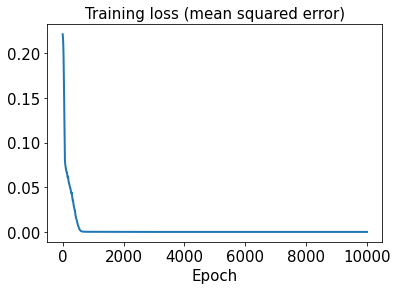

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

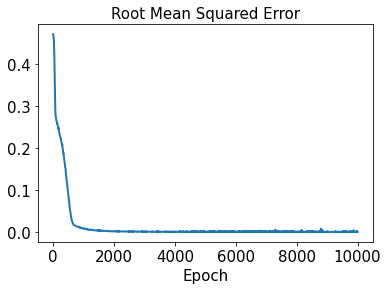

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.0008866953614413891


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.0016236733883492436


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.0008835128853953453, 0.00033148458459282597, 0.0012674233916136466, 0.0006921845935604979, 0.0010138150462409975, 0.0007230934798955759, 0.000775805398664015, 0.00047520866757288594, 0.0012023305239107745, 0.0010561188180042847, 0.0010246519697992092, 0.0011536927880319953, 0.0007998052109709802, 0.000560373909759522, 0.0002820986680490832, 0.0005619281372719954, 0.001093364731529238, 0.0009866785141827766, 0.0005053528516904502, 0.0005045774420547029, 0.0010412938894303646, 0.001052677376057542, 0.0008051376237074814, 0.0014329474771607035, 0.0009785512256714373, 0.0003868226326516257, 0.0009331332723919912, 0.001431539013627659, 0.0016284681423219863, 0.0006343464825860886, 0.000952487333818924, 0.0006504869293031503, 0.0014246264295474157]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.0010483641580255657, 0.0017276078342917764, 0.0011068586959081916, 0.0010037217505696786, 0.0013746742483896834, 0.0028087268256806975, 0.002506300157209847, 0.001983065186899654]


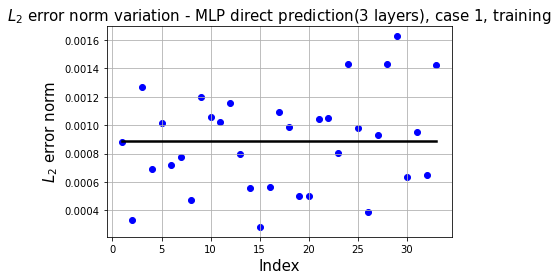

In [33]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

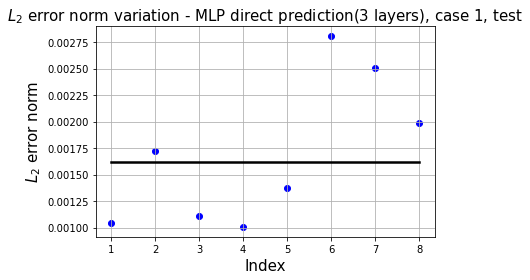

In [34]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

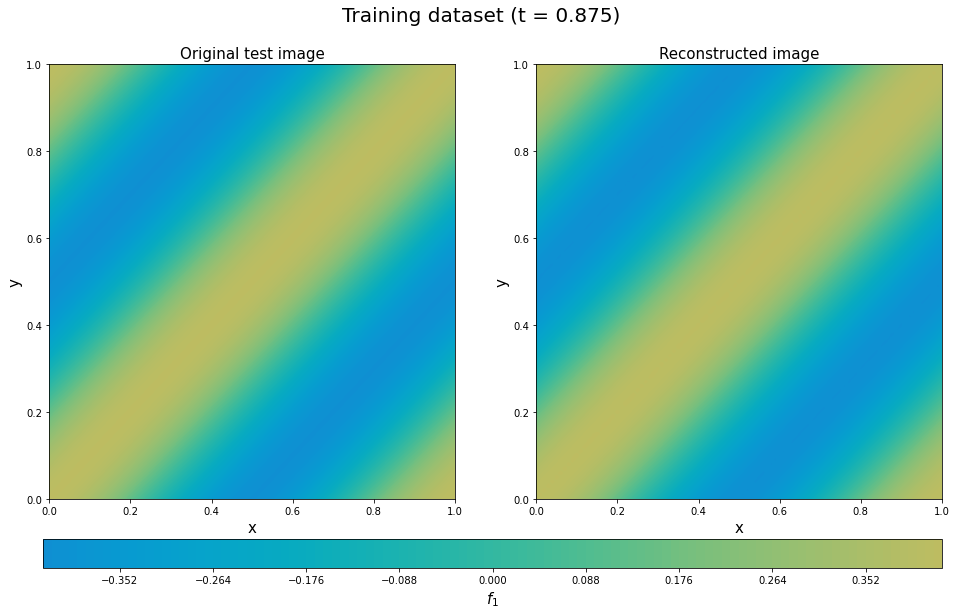

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

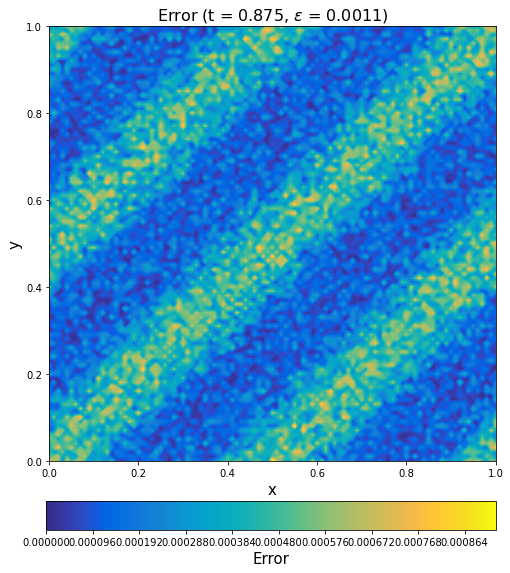

In [109]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.875, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

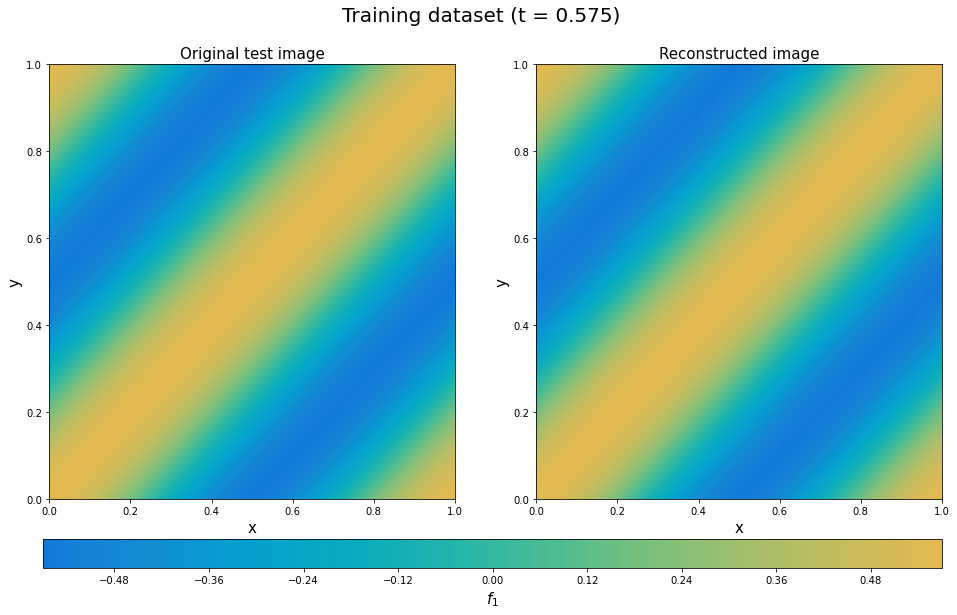

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

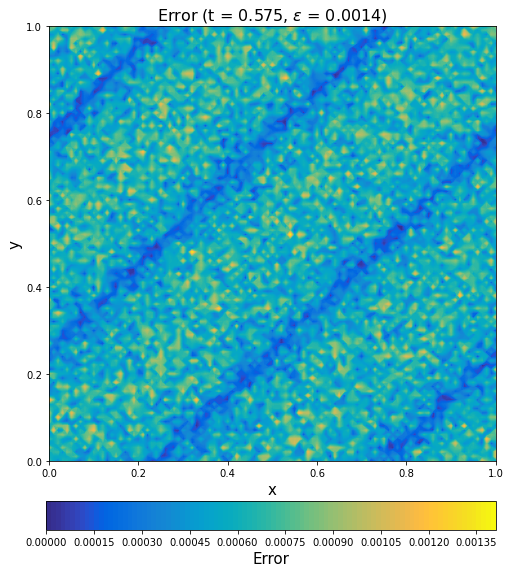

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

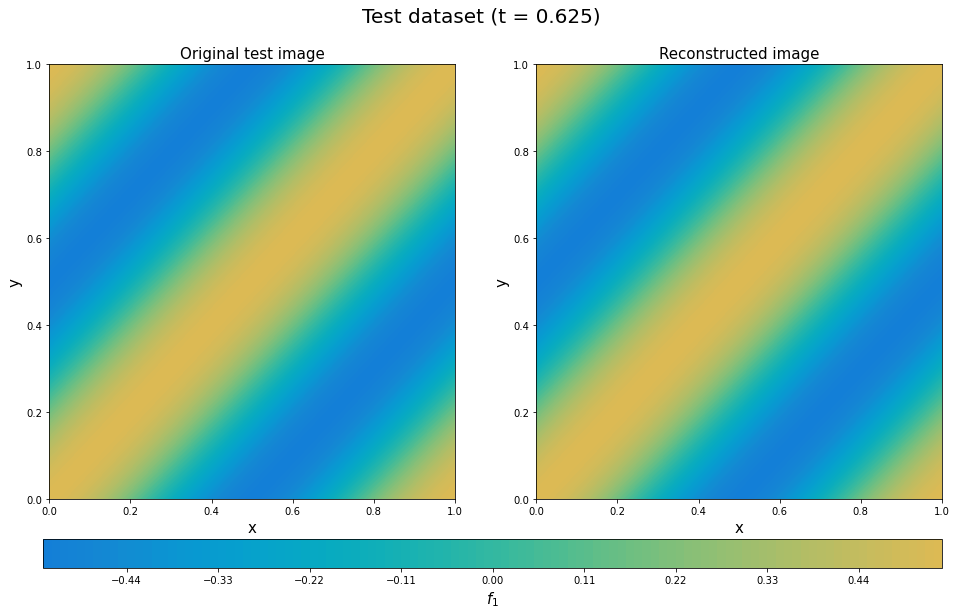

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

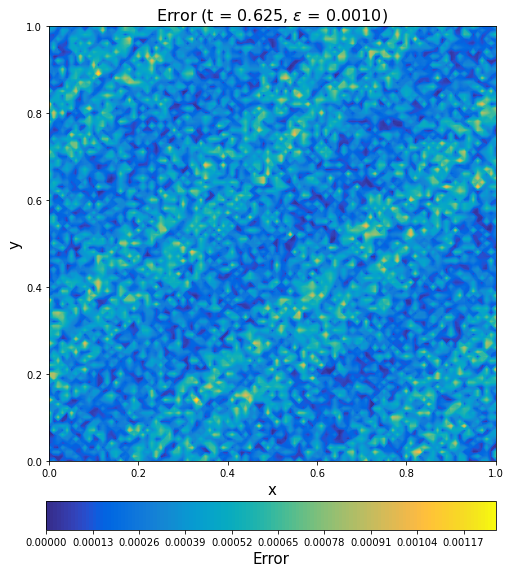

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

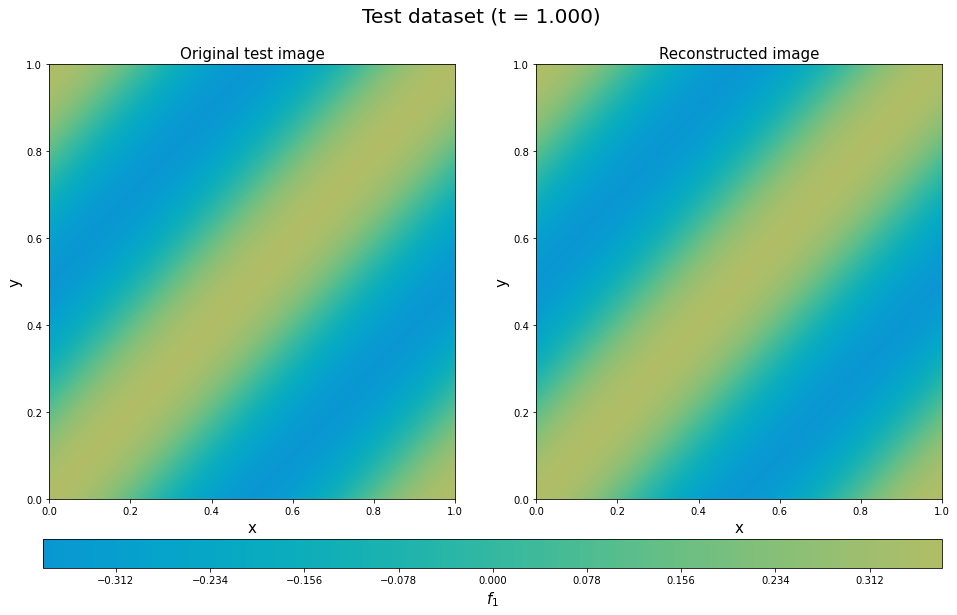

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

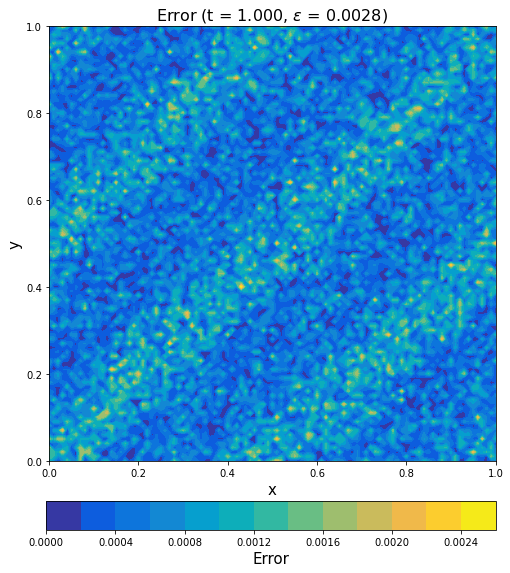

In [42]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

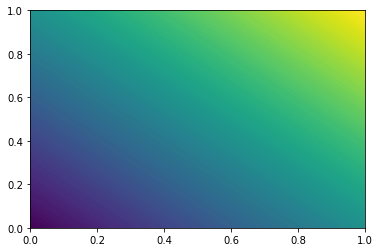

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6982 - rmse: 1.6426
Epoch 2/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6780 - rmse: 1.6365
Epoch 3/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6588 - rmse: 1.6306
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6406 - rmse: 1.6250
Epoch 5/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6231 - rmse: 1.6196
Epoch 6/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6065 - rmse: 1.6145
Epoch 7/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.5908 - rmse: 1.6096
Epoch 8/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5760 - rmse: 1.6050
Epoch 9/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5621 - rmse: 1.6007
Epoch 10/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5491 - rmse: 1.5966
Epoch 11/10000
2/2 [====================

2/2 [==============================] - 0s 4ms/step - loss: 1.5139 - rmse: 1.2304
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4887 - rmse: 1.2201
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4631 - rmse: 1.2096
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4377 - rmse: 1.1991
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4125 - rmse: 1.1885
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3861 - rmse: 1.1773
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3593 - rmse: 1.1659
Epoch 93/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3323 - rmse: 1.1542
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3051 - rmse: 1.1424
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2788 - rmse: 1.1308
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.1092 - rmse: 0.3305
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1047 - rmse: 0.3236
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1003 - rmse: 0.3167
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0960 - rmse: 0.3099
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0919 - rmse: 0.3032
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0880 - rmse: 0.2967
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0843 - rmse: 0.2903
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0807 - rmse: 0.2841
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0773 - rmse: 0.2781
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0741 - rmse: 0.2723
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1037
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1033
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1028
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0104 - rmse: 0.1022
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1017
Epoch 260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1013
Epoch 261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.1009
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1002
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0880
Epoch 343/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 507/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0062 - rmse: 0.0788
Epoch 514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0775
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 675/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 677/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 683/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 759/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 762/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 763/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 764/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 767/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 846/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 847/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 850/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 851/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 927/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 928/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 930/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 932/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 933/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 935/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 1011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0738
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 1013/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0755
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 1018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 1019/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 1094/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 1097/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 1099/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 1102/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 1177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0710
Epoch 1178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0714
Epoch 1180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0714
Epoch 1181/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0713
Epoch 1182/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0710
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 1261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 1262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 1264/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0689
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0689
Epoch 1267/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0689
Epoch 1268/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 1345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 1348/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 1351/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 1426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0652
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0652
Epoch 1428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 1429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 1430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 1431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 1434/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 1512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 1513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 1516/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 1517/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 1593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 1594/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 1598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 1599/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 1676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0561
Epoch 1677/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 1678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 1679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1681/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 1682/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 1683/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 1759/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 1761/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 1762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 1763/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 1766/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 1841/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 1842/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1843/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 1847/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 1848/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 1849/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 9.4673e-04 - rmse: 0.0308
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4286e-04 - rmse: 0.0307
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4050e-04 - rmse: 0.0307
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4138e-04 - rmse: 0.0307
Epoch 1927/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3600e-04 - rmse: 0.0306
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2709e-04 - rmse: 0.0304
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2273e-04 - rmse: 0.0304
Epoch 1930/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3197e-04 - rmse: 0.0305
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3516e-04 - rmse: 0.0306
Epoch 1932/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.2876e-04 - rmse: 0.03

2/2 [==============================] - 0s 4ms/step - loss: 5.1267e-04 - rmse: 0.0226
Epoch 2004/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0960e-04 - rmse: 0.0226
Epoch 2005/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0713e-04 - rmse: 0.0225
Epoch 2006/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0401e-04 - rmse: 0.0225
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0063e-04 - rmse: 0.0224
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9786e-04 - rmse: 0.0223
Epoch 2009/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9585e-04 - rmse: 0.0223
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9174e-04 - rmse: 0.0222
Epoch 2011/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8637e-04 - rmse: 0.0221
Epoch 2012/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8479e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 2.2738e-04 - rmse: 0.0151
Epoch 2084/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2509e-04 - rmse: 0.0150
Epoch 2085/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2174e-04 - rmse: 0.0149
Epoch 2086/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1780e-04 - rmse: 0.0148
Epoch 2087/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1488e-04 - rmse: 0.0147
Epoch 2088/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1244e-04 - rmse: 0.0146
Epoch 2089/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1048e-04 - rmse: 0.0145
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0802e-04 - rmse: 0.0144
Epoch 2091/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0561e-04 - rmse: 0.0143
Epoch 2092/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0310e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.0931e-04 - rmse: 0.0105
Epoch 2164/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0992e-04 - rmse: 0.0105
Epoch 2165/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0691e-04 - rmse: 0.0103
Epoch 2166/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0186e-04 - rmse: 0.0101
Epoch 2167/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6753e-05 - rmse: 0.0098
Epoch 2168/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2913e-05 - rmse: 0.0096
Epoch 2169/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9711e-05 - rmse: 0.0095
Epoch 2170/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8208e-05 - rmse: 0.0094
Epoch 2171/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6448e-05 - rmse: 0.0093
Epoch 2172/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4707e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 4.2783e-05 - rmse: 0.0065
Epoch 2244/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3852e-05 - rmse: 0.0066
Epoch 2245/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4541e-05 - rmse: 0.0067
Epoch 2246/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4448e-05 - rmse: 0.0067
Epoch 2247/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5515e-05 - rmse: 0.0067
Epoch 2248/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5774e-05 - rmse: 0.0068
Epoch 2249/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4161e-05 - rmse: 0.0066
Epoch 2250/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1638e-05 - rmse: 0.0065
Epoch 2251/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9200e-05 - rmse: 0.0063
Epoch 2252/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7713e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.9108e-05 - rmse: 0.0044
Epoch 2324/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8908e-05 - rmse: 0.0043
Epoch 2325/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8771e-05 - rmse: 0.0043
Epoch 2326/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8614e-05 - rmse: 0.0043
Epoch 2327/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8439e-05 - rmse: 0.0043
Epoch 2328/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8263e-05 - rmse: 0.0043
Epoch 2329/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8157e-05 - rmse: 0.0043
Epoch 2330/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7994e-05 - rmse: 0.0042
Epoch 2331/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7857e-05 - rmse: 0.0042
Epoch 2332/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7785e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 9.4118e-06 - rmse: 0.0031
Epoch 2404/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2707e-06 - rmse: 0.0030
Epoch 2405/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1365e-06 - rmse: 0.0030
Epoch 2406/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0079e-06 - rmse: 0.0030
Epoch 2407/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9374e-06 - rmse: 0.0030
Epoch 2408/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8703e-06 - rmse: 0.0030
Epoch 2409/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7854e-06 - rmse: 0.0030
Epoch 2410/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7795e-06 - rmse: 0.0030
Epoch 2411/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8693e-06 - rmse: 0.0030
Epoch 2412/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9303e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 4.9059e-06 - rmse: 0.0022
Epoch 2484/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8984e-06 - rmse: 0.0022
Epoch 2485/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7983e-06 - rmse: 0.0022
Epoch 2486/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7274e-06 - rmse: 0.0022
Epoch 2487/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6253e-06 - rmse: 0.0022
Epoch 2488/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7091e-06 - rmse: 0.0022
Epoch 2489/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6610e-06 - rmse: 0.0022
Epoch 2490/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4230e-06 - rmse: 0.0021
Epoch 2491/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2780e-06 - rmse: 0.0021
Epoch 2492/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4569e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.3097e-06 - rmse: 0.0015
Epoch 2564/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2291e-06 - rmse: 0.0015
Epoch 2565/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1827e-06 - rmse: 0.0015
Epoch 2566/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1894e-06 - rmse: 0.0015
Epoch 2567/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1888e-06 - rmse: 0.0015
Epoch 2568/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1796e-06 - rmse: 0.0015
Epoch 2569/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1918e-06 - rmse: 0.0015
Epoch 2570/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2435e-06 - rmse: 0.0015
Epoch 2571/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2734e-06 - rmse: 0.0015
Epoch 2572/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2397e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.2567e-06 - rmse: 0.0011
Epoch 2644/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2393e-06 - rmse: 0.0011
Epoch 2645/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2128e-06 - rmse: 0.0011
Epoch 2646/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2026e-06 - rmse: 0.0011
Epoch 2647/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2049e-06 - rmse: 0.0011
Epoch 2648/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1966e-06 - rmse: 0.0011
Epoch 2649/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1826e-06 - rmse: 0.0011
Epoch 2650/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1740e-06 - rmse: 0.0011
Epoch 2651/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1680e-06 - rmse: 0.0011
Epoch 2652/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1819e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.2409e-07 - rmse: 8.5094e-04
Epoch 2723/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2056e-07 - rmse: 8.4886e-04
Epoch 2724/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6158e-07 - rmse: 9.2822e-04
Epoch 2725/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4015e-07 - rmse: 9.1660e-04
Epoch 2726/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1302e-07 - rmse: 8.4441e-04
Epoch 2727/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0588e-07 - rmse: 8.4017e-04
Epoch 2728/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6682e-07 - rmse: 8.7568e-04
Epoch 2729/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2230e-07 - rmse: 8.4988e-04
Epoch 2730/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5895e-07 - rmse: 8.1176e-04
Epoch 2731/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.4417e-07 - rmse: 6.6646e-04
Epoch 2800/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0014e-07 - rmse: 7.0720e-04
Epoch 2801/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0506e-07 - rmse: 7.7785e-04
Epoch 2802/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0194e-07 - rmse: 7.7585e-04
Epoch 2803/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1260e-07 - rmse: 7.1596e-04
Epoch 2804/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4566e-07 - rmse: 6.6758e-04
Epoch 2805/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5269e-07 - rmse: 6.7282e-04
Epoch 2806/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6451e-07 - rmse: 6.8155e-04
Epoch 2807/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2713e-07 - rmse: 6.5355e-04
Epoch 2808/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.7597e-07 - rmse: 5.2533e-04
Epoch 2877/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7490e-07 - rmse: 5.2431e-04
Epoch 2878/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7447e-07 - rmse: 5.2390e-04
Epoch 2879/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8275e-07 - rmse: 5.3174e-04
Epoch 2880/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9493e-07 - rmse: 5.4308e-04
Epoch 2881/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7995e-07 - rmse: 5.2911e-04
Epoch 2882/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7151e-07 - rmse: 5.2106e-04
Epoch 2883/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0375e-07 - rmse: 5.5113e-04
Epoch 2884/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4255e-07 - rmse: 5.8528e-04
Epoch 2885/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 8ms/step - loss: 2.1546e-07 - rmse: 4.6417e-04
Epoch 2954/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1413e-07 - rmse: 4.6274e-04
Epoch 2955/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0940e-07 - rmse: 4.5760e-04
Epoch 2956/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0804e-07 - rmse: 4.5612e-04
Epoch 2957/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0781e-07 - rmse: 4.5587e-04
Epoch 2958/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1060e-07 - rmse: 4.5891e-04
Epoch 2959/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1520e-07 - rmse: 4.6390e-04
Epoch 2960/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1026e-07 - rmse: 4.5854e-04
Epoch 2961/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0616e-07 - rmse: 4.5405e-04
Epoch 2962/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.6852e-07 - rmse: 4.1052e-04
Epoch 3031/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8164e-07 - rmse: 4.2619e-04
Epoch 3032/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1313e-07 - rmse: 4.6166e-04
Epoch 3033/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6899e-07 - rmse: 4.1109e-04
Epoch 3034/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6896e-07 - rmse: 4.1105e-04
Epoch 3035/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9513e-07 - rmse: 4.4173e-04
Epoch 3036/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5769e-07 - rmse: 3.9711e-04
Epoch 3037/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2816e-07 - rmse: 4.7767e-04
Epoch 3038/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7454e-07 - rmse: 6.1200e-04
Epoch 3039/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 10ms/step - loss: 2.6294e-07 - rmse: 5.1278e-04
Epoch 3108/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7075e-07 - rmse: 4.1322e-04
Epoch 3109/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4955e-07 - rmse: 3.8672e-04
Epoch 3110/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8160e-07 - rmse: 4.2614e-04
Epoch 3111/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5191e-07 - rmse: 3.8976e-04
Epoch 3112/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2864e-07 - rmse: 3.5867e-04
Epoch 3113/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5646e-07 - rmse: 3.9555e-04
Epoch 3114/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4856e-07 - rmse: 3.8543e-04
Epoch 3115/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3000e-07 - rmse: 3.6055e-04
Epoch 3116/10000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 3ms/step - loss: 1.3113e-07 - rmse: 3.6212e-04
Epoch 3185/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3006e-07 - rmse: 3.6064e-04
Epoch 3186/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1814e-07 - rmse: 3.4371e-04
Epoch 3187/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1912e-07 - rmse: 3.4513e-04
Epoch 3188/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2250e-07 - rmse: 3.5000e-04
Epoch 3189/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1868e-07 - rmse: 3.4450e-04
Epoch 3190/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1898e-07 - rmse: 3.4493e-04
Epoch 3191/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1760e-07 - rmse: 3.4293e-04
Epoch 3192/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1542e-07 - rmse: 3.3973e-04
Epoch 3193/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.4626e-07 - rmse: 3.8244e-04
Epoch 3262/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4606e-07 - rmse: 3.8218e-04
Epoch 3263/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3681e-07 - rmse: 3.6988e-04
Epoch 3264/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2081e-07 - rmse: 3.4758e-04
Epoch 3265/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1822e-07 - rmse: 3.4383e-04
Epoch 3266/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1429e-07 - rmse: 3.3806e-04
Epoch 3267/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1408e-07 - rmse: 3.3776e-04
Epoch 3268/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0829e-07 - rmse: 3.2907e-04
Epoch 3269/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1215e-07 - rmse: 3.3489e-04
Epoch 3270/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 1.2038e-07 - rmse: 3.4696e-04
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3979e-07 - rmse: 3.7388e-04
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3621e-07 - rmse: 3.6906e-04
Epoch 3341/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0462e-07 - rmse: 3.2345e-04
Epoch 3342/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2736e-07 - rmse: 3.5688e-04
Epoch 3343/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2150e-07 - rmse: 3.4858e-04
Epoch 3344/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3381e-07 - rmse: 3.6580e-04
Epoch 3345/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6122e-07 - rmse: 4.0152e-04
Epoch 3346/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3436e-07 - rmse: 3.6656e-04
Epoch 3347/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.8916e-08 - rmse: 3.1451e-04
Epoch 3416/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0458e-07 - rmse: 3.2339e-04
Epoch 3417/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0524e-07 - rmse: 3.2441e-04
Epoch 3418/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0419e-07 - rmse: 3.2279e-04
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0039e-07 - rmse: 3.1685e-04
Epoch 3420/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6550e-08 - rmse: 3.1072e-04
Epoch 3421/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3699e-07 - rmse: 3.7012e-04
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9586e-07 - rmse: 4.4256e-04
Epoch 3423/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5253e-07 - rmse: 3.9055e-04
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.3733e-08 - rmse: 3.0616e-04
Epoch 3493/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2618e-08 - rmse: 3.0433e-04
Epoch 3494/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3709e-08 - rmse: 3.0612e-04
Epoch 3495/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3850e-08 - rmse: 3.0635e-04
Epoch 3496/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1931e-08 - rmse: 3.0320e-04
Epoch 3497/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2639e-08 - rmse: 3.0437e-04
Epoch 3498/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0738e-08 - rmse: 3.0123e-04
Epoch 3499/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2884e-08 - rmse: 3.0477e-04
Epoch 3500/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3429e-08 - rmse: 3.0566e-04
Epoch 3501/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.0100e-07 - rmse: 3.1780e-04
Epoch 3570/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3652e-08 - rmse: 3.0603e-04
Epoch 3571/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2589e-08 - rmse: 3.0429e-04
Epoch 3572/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4331e-08 - rmse: 3.0713e-04
Epoch 3573/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2847e-08 - rmse: 3.0471e-04
Epoch 3574/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1867e-08 - rmse: 3.0310e-04
Epoch 3575/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2906e-08 - rmse: 3.0480e-04
Epoch 3576/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1474e-08 - rmse: 3.0245e-04
Epoch 3577/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7329e-08 - rmse: 2.9552e-04
Epoch 3578/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.6347e-08 - rmse: 3.1040e-04
Epoch 3647/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0291e-07 - rmse: 3.2079e-04
Epoch 3648/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0235e-07 - rmse: 3.1993e-04
Epoch 3649/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3843e-08 - rmse: 3.0634e-04
Epoch 3650/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6457e-08 - rmse: 2.9403e-04
Epoch 3651/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2426e-08 - rmse: 3.0402e-04
Epoch 3652/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1262e-07 - rmse: 3.3559e-04
Epoch 3653/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1414e-07 - rmse: 3.3784e-04
Epoch 3654/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6809e-08 - rmse: 3.1114e-04
Epoch 3655/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2307e-07 - rmse: 3.5081e-04
Epoch 3724/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9728e-07 - rmse: 4.4416e-04
Epoch 3725/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6359e-07 - rmse: 4.0446e-04
Epoch 3726/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1754e-07 - rmse: 3.4284e-04
Epoch 3727/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3218e-07 - rmse: 3.6357e-04
Epoch 3728/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2411e-07 - rmse: 3.5230e-04
Epoch 3729/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3451e-07 - rmse: 3.6676e-04
Epoch 3730/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0029e-07 - rmse: 3.1668e-04
Epoch 3731/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0193e-07 - rmse: 3.1926e-04
Epoch 3732/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.4468e-08 - rmse: 2.9063e-04
Epoch 3801/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3537e-08 - rmse: 2.8903e-04
Epoch 3802/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0195e-08 - rmse: 2.8319e-04
Epoch 3803/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9721e-08 - rmse: 2.8235e-04
Epoch 3804/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1038e-08 - rmse: 2.8467e-04
Epoch 3805/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4408e-08 - rmse: 2.9053e-04
Epoch 3806/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2525e-08 - rmse: 2.8727e-04
Epoch 3807/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0067e-08 - rmse: 2.8296e-04
Epoch 3808/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9320e-08 - rmse: 2.8164e-04
Epoch 3809/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 7.8377e-08 - rmse: 2.7996e-04
Epoch 3878/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9448e-08 - rmse: 2.8187e-04
Epoch 3879/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8143e-08 - rmse: 2.7954e-04
Epoch 3880/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6843e-08 - rmse: 2.7721e-04
Epoch 3881/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3734e-08 - rmse: 2.8937e-04
Epoch 3882/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1252e-08 - rmse: 3.0208e-04
Epoch 3883/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1923e-08 - rmse: 3.0319e-04
Epoch 3884/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8733e-08 - rmse: 2.9788e-04
Epoch 3885/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2953e-07 - rmse: 3.5990e-04
Epoch 3886/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 8.2544e-08 - rmse: 2.8730e-04
Epoch 3955/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8413e-08 - rmse: 2.8002e-04
Epoch 3956/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6385e-08 - rmse: 2.7638e-04
Epoch 3957/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5175e-08 - rmse: 2.7418e-04
Epoch 3958/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8685e-08 - rmse: 2.8051e-04
Epoch 3959/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9629e-08 - rmse: 2.8219e-04
Epoch 3960/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9764e-08 - rmse: 2.8243e-04
Epoch 3961/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7187e-08 - rmse: 2.7783e-04
Epoch 3962/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4655e-08 - rmse: 2.7323e-04
Epoch 3963/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 7.3829e-08 - rmse: 2.7171e-04
Epoch 4032/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4370e-08 - rmse: 2.7271e-04
Epoch 4033/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4623e-08 - rmse: 2.7317e-04
Epoch 4034/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2894e-08 - rmse: 2.6999e-04
Epoch 4035/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2893e-08 - rmse: 2.6999e-04
Epoch 4036/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2301e-08 - rmse: 2.6889e-04
Epoch 4037/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3160e-08 - rmse: 2.7048e-04
Epoch 4038/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5921e-08 - rmse: 2.7554e-04
Epoch 4039/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7176e-08 - rmse: 2.7781e-04
Epoch 4040/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.7520e-08 - rmse: 2.9584e-04
Epoch 4109/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9447e-08 - rmse: 2.8186e-04
Epoch 4110/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5431e-08 - rmse: 2.7465e-04
Epoch 4111/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7755e-08 - rmse: 2.7885e-04
Epoch 4112/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1470e-08 - rmse: 2.6734e-04
Epoch 4113/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1245e-08 - rmse: 2.6692e-04
Epoch 4114/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5954e-08 - rmse: 2.7560e-04
Epoch 4115/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0471e-08 - rmse: 2.8367e-04
Epoch 4116/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3280e-08 - rmse: 2.7070e-04
Epoch 4117/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 7.4172e-08 - rmse: 2.7234e-04
Epoch 4186/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8364e-08 - rmse: 2.6147e-04
Epoch 4187/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7411e-08 - rmse: 2.5964e-04
Epoch 4188/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7382e-08 - rmse: 2.5958e-04
Epoch 4189/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6062e-08 - rmse: 2.5703e-04
Epoch 4190/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5581e-08 - rmse: 2.5609e-04
Epoch 4191/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5796e-08 - rmse: 2.5651e-04
Epoch 4192/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7876e-08 - rmse: 2.6053e-04
Epoch 4193/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9577e-08 - rmse: 2.6378e-04
Epoch 4194/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.6208e-08 - rmse: 2.5731e-04
Epoch 4263/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1104e-08 - rmse: 2.6665e-04
Epoch 4264/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - rmse: 2.5416e-04
Epoch 4265/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5233e-08 - rmse: 2.5541e-04
Epoch 4266/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5237e-08 - rmse: 2.5542e-04
Epoch 4267/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2857e-08 - rmse: 2.5071e-04
Epoch 4268/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3273e-08 - rmse: 2.5154e-04
Epoch 4269/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5946e-08 - rmse: 2.5680e-04
Epoch 4270/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7747e-08 - rmse: 2.6028e-04
Epoch 4271/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 3ms/step - loss: 6.6122e-08 - rmse: 2.5714e-04
Epoch 4340/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4571e-08 - rmse: 2.7308e-04
Epoch 4341/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0081e-08 - rmse: 2.6473e-04
Epoch 4342/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4431e-08 - rmse: 2.5383e-04
Epoch 4343/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7058e-08 - rmse: 2.9506e-04
Epoch 4344/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2409e-08 - rmse: 2.8707e-04
Epoch 4345/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6630e-08 - rmse: 2.9433e-04
Epoch 4346/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2860e-07 - rmse: 3.5861e-04
Epoch 4347/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0608e-07 - rmse: 3.2570e-04
Epoch 4348/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.1045e-08 - rmse: 2.6654e-04
Epoch 4417/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5257e-08 - rmse: 2.9199e-04
Epoch 4418/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7459e-08 - rmse: 2.5973e-04
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0426e-08 - rmse: 2.6538e-04
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6425e-08 - rmse: 2.5773e-04
Epoch 4421/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2263e-08 - rmse: 2.8682e-04
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7551e-08 - rmse: 2.5991e-04
Epoch 4423/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2931e-08 - rmse: 2.7006e-04
Epoch 4424/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2764e-08 - rmse: 2.5053e-04
Epoch 4425/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.5470e-08 - rmse: 2.7472e-04
Epoch 4494/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6638e-08 - rmse: 2.7684e-04
Epoch 4495/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2703e-08 - rmse: 2.5040e-04
Epoch 4496/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3553e-08 - rmse: 2.5210e-04
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3770e-08 - rmse: 2.7161e-04
Epoch 4498/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3367e-08 - rmse: 2.7086e-04
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0120e-08 - rmse: 2.6480e-04
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8542e-08 - rmse: 2.6180e-04
Epoch 4501/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2846e-08 - rmse: 2.5069e-04
Epoch 4502/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.1770e-07 - rmse: 3.4307e-04
Epoch 4571/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3117e-07 - rmse: 3.6218e-04
Epoch 4572/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2309e-08 - rmse: 2.8690e-04
Epoch 4573/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0315e-08 - rmse: 2.8340e-04
Epoch 4574/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5813e-07 - rmse: 3.9765e-04
Epoch 4575/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8276e-07 - rmse: 4.2751e-04
Epoch 4576/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4584e-08 - rmse: 2.9083e-04
Epoch 4577/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4619e-07 - rmse: 3.8234e-04
Epoch 4578/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5218e-07 - rmse: 3.9010e-04
Epoch 4579/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.3310e-08 - rmse: 2.5161e-04
Epoch 4648/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3522e-08 - rmse: 2.5204e-04
Epoch 4649/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1997e-08 - rmse: 2.4899e-04
Epoch 4650/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6061e-08 - rmse: 2.3677e-04
Epoch 4651/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1767e-08 - rmse: 2.4853e-04
Epoch 4652/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0100e-08 - rmse: 2.4515e-04
Epoch 4653/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5464e-08 - rmse: 2.3551e-04
Epoch 4654/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6886e-08 - rmse: 2.3851e-04
Epoch 4655/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9296e-08 - rmse: 2.4351e-04
Epoch 4656/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 6ms/step - loss: 5.7707e-08 - rmse: 2.4022e-04
Epoch 4725/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6962e-08 - rmse: 2.3867e-04
Epoch 4726/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4464e-07 - rmse: 3.8031e-04
Epoch 4727/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7504e-07 - rmse: 5.2444e-04
Epoch 4728/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6733e-07 - rmse: 6.0607e-04
Epoch 4729/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6078e-07 - rmse: 4.0097e-04
Epoch 4730/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1945e-08 - rmse: 3.0322e-04
Epoch 4731/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3920e-07 - rmse: 3.7310e-04
Epoch 4732/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0761e-07 - rmse: 3.2804e-04
Epoch 4733/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 7.0957e-08 - rmse: 2.6638e-04
Epoch 4802/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7818e-08 - rmse: 2.9634e-04
Epoch 4803/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9321e-08 - rmse: 2.4356e-04
Epoch 4804/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2014e-08 - rmse: 2.8638e-04
Epoch 4805/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1944e-08 - rmse: 2.6822e-04
Epoch 4806/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4531e-08 - rmse: 2.5403e-04
Epoch 4807/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1910e-08 - rmse: 2.8620e-04
Epoch 4808/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8596e-08 - rmse: 2.4207e-04
Epoch 4809/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2357e-08 - rmse: 2.4971e-04
Epoch 4810/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.4781e-08 - rmse: 2.3405e-04
Epoch 4879/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2663e-08 - rmse: 2.2948e-04
Epoch 4880/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0399e-08 - rmse: 2.2450e-04
Epoch 4881/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4008e-08 - rmse: 2.3240e-04
Epoch 4882/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0182e-08 - rmse: 2.6492e-04
Epoch 4883/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6796e-08 - rmse: 2.9461e-04
Epoch 4884/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1382e-08 - rmse: 2.6717e-04
Epoch 4885/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5874e-08 - rmse: 3.0963e-04
Epoch 4886/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2905e-08 - rmse: 2.5081e-04
Epoch 4887/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 3ms/step - loss: 9.1508e-08 - rmse: 3.0250e-04
Epoch 4956/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9942e-08 - rmse: 2.8274e-04
Epoch 4957/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5836e-08 - rmse: 2.7538e-04
Epoch 4958/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0271e-07 - rmse: 3.2048e-04
Epoch 4959/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7030e-08 - rmse: 2.5890e-04
Epoch 4960/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1498e-08 - rmse: 2.6739e-04
Epoch 4961/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6821e-08 - rmse: 2.3837e-04
Epoch 4962/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4415e-08 - rmse: 2.5380e-04
Epoch 4963/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0820e-08 - rmse: 2.4662e-04
Epoch 4964/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 7ms/step - loss: 1.3749e-07 - rmse: 3.7080e-04
Epoch 5033/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7133e-08 - rmse: 3.1166e-04
Epoch 5034/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2630e-07 - rmse: 3.5539e-04
Epoch 5035/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8241e-08 - rmse: 2.9705e-04
Epoch 5036/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2743e-07 - rmse: 3.5698e-04
Epoch 5037/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0502e-07 - rmse: 3.2407e-04
Epoch 5038/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0128e-08 - rmse: 2.8307e-04
Epoch 5039/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6723e-08 - rmse: 3.1100e-04
Epoch 5040/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8815e-08 - rmse: 2.4252e-04
Epoch 5041/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.3431e-08 - rmse: 2.0840e-04
Epoch 5110/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9374e-08 - rmse: 2.2220e-04
Epoch 5111/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0351e-08 - rmse: 2.2439e-04
Epoch 5112/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2960e-08 - rmse: 2.3013e-04
Epoch 5113/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7236e-08 - rmse: 2.1734e-04
Epoch 5114/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6912e-08 - rmse: 2.1659e-04
Epoch 5115/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8515e-08 - rmse: 2.2026e-04
Epoch 5116/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3633e-08 - rmse: 2.0888e-04
Epoch 5117/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8149e-08 - rmse: 2.1943e-04
Epoch 5118/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 7ms/step - loss: 9.3912e-08 - rmse: 3.0645e-04
Epoch 5187/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8850e-08 - rmse: 2.8080e-04
Epoch 5188/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2992e-08 - rmse: 2.7017e-04
Epoch 5189/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7621e-08 - rmse: 2.7860e-04
Epoch 5190/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0509e-07 - rmse: 3.2417e-04
Epoch 5191/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0124e-07 - rmse: 4.4860e-04
Epoch 5192/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4157e-07 - rmse: 4.9149e-04
Epoch 5193/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4428e-07 - rmse: 6.6655e-04
Epoch 5194/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9867e-07 - rmse: 6.3141e-04
Epoch 5195/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 3ms/step - loss: 5.5132e-08 - rmse: 2.3480e-04
Epoch 5264/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1712e-08 - rmse: 2.2740e-04
Epoch 5265/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6447e-08 - rmse: 2.1551e-04
Epoch 5266/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2569e-07 - rmse: 3.5453e-04
Epoch 5267/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6740e-07 - rmse: 4.0914e-04
Epoch 5268/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0760e-08 - rmse: 3.0126e-04
Epoch 5269/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7076e-08 - rmse: 2.9509e-04
Epoch 5270/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8165e-08 - rmse: 3.1331e-04
Epoch 5271/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3273e-08 - rmse: 2.8857e-04
Epoch 5272/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.9867e-08 - rmse: 2.2331e-04
Epoch 5341/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7233e-08 - rmse: 2.3923e-04
Epoch 5342/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7969e-08 - rmse: 2.1902e-04
Epoch 5343/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3477e-08 - rmse: 2.3125e-04
Epoch 5344/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8796e-08 - rmse: 2.4248e-04
Epoch 5345/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5937e-08 - rmse: 2.1433e-04
Epoch 5346/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6047e-08 - rmse: 2.1459e-04
Epoch 5347/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4561e-08 - rmse: 2.1109e-04
Epoch 5348/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0846e-08 - rmse: 2.2549e-04
Epoch 5349/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.0284e-08 - rmse: 3.0047e-04
Epoch 5418/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3791e-07 - rmse: 3.7136e-04
Epoch 5419/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0500e-08 - rmse: 2.8372e-04
Epoch 5420/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1390e-07 - rmse: 5.6027e-04
Epoch 5421/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0814e-07 - rmse: 4.5622e-04
Epoch 5422/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5874e-07 - rmse: 3.9843e-04
Epoch 5423/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5477e-08 - rmse: 2.3554e-04
Epoch 5424/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5786e-07 - rmse: 5.0780e-04
Epoch 5425/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4899e-07 - rmse: 3.8599e-04
Epoch 5426/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.1608e-07 - rmse: 4.6484e-04
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6925e-07 - rmse: 4.1140e-04
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0094e-07 - rmse: 4.4827e-04
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5246e-07 - rmse: 3.9046e-04
Epoch 5499/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3840e-07 - rmse: 3.7202e-04
Epoch 5500/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5444e-07 - rmse: 3.9298e-04
Epoch 5501/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3455e-07 - rmse: 3.6681e-04
Epoch 5502/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9460e-08 - rmse: 2.6355e-04
Epoch 5503/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4890e-08 - rmse: 2.7366e-04
Epoch 5504/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4744e-07 - rmse: 3.8398e-04
Epoch 5573/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0804e-08 - rmse: 2.6609e-04
Epoch 5574/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4147e-08 - rmse: 2.3269e-04
Epoch 5575/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8017e-08 - rmse: 2.6080e-04
Epoch 5576/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6542e-08 - rmse: 2.1574e-04
Epoch 5577/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5396e-08 - rmse: 2.5573e-04
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7531e-08 - rmse: 2.3986e-04
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0861e-07 - rmse: 3.2957e-04
Epoch 5580/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9763e-08 - rmse: 2.6413e-04
Epoch 5581/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.2526e-08 - rmse: 1.8035e-04
Epoch 5650/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6517e-08 - rmse: 2.5791e-04
Epoch 5651/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6841e-08 - rmse: 1.9194e-04
Epoch 5652/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2385e-08 - rmse: 2.4977e-04
Epoch 5653/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5661e-08 - rmse: 2.1369e-04
Epoch 5654/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4458e-08 - rmse: 2.1085e-04
Epoch 5655/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7907e-08 - rmse: 1.9470e-04
Epoch 5656/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5853e-08 - rmse: 1.8935e-04
Epoch 5657/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1430e-08 - rmse: 2.0354e-04
Epoch 5658/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0220e-07 - rmse: 3.1969e-04
Epoch 5728/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2822e-08 - rmse: 3.0467e-04
Epoch 5729/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2170e-07 - rmse: 3.4886e-04
Epoch 5730/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1704e-07 - rmse: 3.4212e-04
Epoch 5731/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5938e-08 - rmse: 3.0974e-04
Epoch 5732/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4732e-08 - rmse: 1.8637e-04
Epoch 5733/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3370e-08 - rmse: 2.0826e-04
Epoch 5734/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1461e-07 - rmse: 4.6326e-04
Epoch 5735/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2912e-08 - rmse: 3.0482e-04
Epoch 5736/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.0229e-07 - rmse: 4.4976e-04
Epoch 5805/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9131e-08 - rmse: 2.2165e-04
Epoch 5806/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8084e-07 - rmse: 4.2526e-04
Epoch 5807/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2042e-07 - rmse: 3.4701e-04
Epoch 5808/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3164e-07 - rmse: 3.6282e-04
Epoch 5809/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5400e-07 - rmse: 5.0398e-04
Epoch 5810/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1314e-07 - rmse: 3.3636e-04
Epoch 5811/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2677e-08 - rmse: 3.0443e-04
Epoch 5812/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2563e-08 - rmse: 2.6938e-04
Epoch 5813/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.5930e-07 - rmse: 3.9912e-04
Epoch 5882/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1491e-07 - rmse: 3.3898e-04
Epoch 5883/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1410e-08 - rmse: 3.0234e-04
Epoch 5884/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5180e-08 - rmse: 3.0851e-04
Epoch 5885/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7892e-07 - rmse: 9.3751e-04
Epoch 5886/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4003e-07 - rmse: 8.0002e-04
Epoch 5887/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2579e-06 - rmse: 0.0011
Epoch 5888/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2304e-07 - rmse: 9.6075e-04
Epoch 5889/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9528e-07 - rmse: 4.4191e-04
Epoch 5890/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 5ms/step - loss: 3.5654e-08 - rmse: 1.8882e-04
Epoch 5961/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4448e-08 - rmse: 2.1083e-04
Epoch 5962/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1012e-08 - rmse: 1.7610e-04
Epoch 5963/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1498e-08 - rmse: 1.7748e-04
Epoch 5964/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2412e-08 - rmse: 1.8003e-04
Epoch 5965/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2141e-08 - rmse: 1.7928e-04
Epoch 5966/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3320e-08 - rmse: 1.8254e-04
Epoch 5967/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7808e-08 - rmse: 1.9444e-04
Epoch 5968/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1976e-07 - rmse: 3.4607e-04
Epoch 5969/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.9594e-08 - rmse: 2.2270e-04
Epoch 6038/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8415e-08 - rmse: 2.4169e-04
Epoch 6039/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9546e-08 - rmse: 1.7189e-04
Epoch 6040/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2324e-08 - rmse: 1.7979e-04
Epoch 6041/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3592e-08 - rmse: 1.8328e-04
Epoch 6042/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5269e-08 - rmse: 1.8780e-04
Epoch 6043/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1614e-08 - rmse: 1.7780e-04
Epoch 6044/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0145e-08 - rmse: 1.7362e-04
Epoch 6045/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6619e-08 - rmse: 1.6315e-04
Epoch 6046/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.7534e-08 - rmse: 1.6593e-04
Epoch 6115/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5193e-08 - rmse: 1.8760e-04
Epoch 6116/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9983e-08 - rmse: 1.7316e-04
Epoch 6117/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5340e-08 - rmse: 1.8799e-04
Epoch 6118/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5346e-08 - rmse: 2.1295e-04
Epoch 6119/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3045e-08 - rmse: 2.0747e-04
Epoch 6120/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0920e-08 - rmse: 2.0229e-04
Epoch 6121/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9396e-08 - rmse: 1.7145e-04
Epoch 6122/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5320e-08 - rmse: 2.1288e-04
Epoch 6123/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.3122e-06 - rmse: 0.0011
Epoch 6192/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5391e-07 - rmse: 9.2407e-04
Epoch 6193/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3855e-06 - rmse: 0.0012
Epoch 6194/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8681e-07 - rmse: 4.3221e-04
Epoch 6195/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5344e-07 - rmse: 3.9171e-04
Epoch 6196/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7473e-07 - rmse: 4.1801e-04
Epoch 6197/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6125e-07 - rmse: 5.1113e-04
Epoch 6198/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2035e-06 - rmse: 0.0011
Epoch 6199/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0074e-06 - rmse: 0.0010
Epoch 6200/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4

2/2 [==============================] - 0s 4ms/step - loss: 8.8358e-08 - rmse: 2.9725e-04
Epoch 6269/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4246e-08 - rmse: 2.1035e-04
Epoch 6270/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4442e-07 - rmse: 3.8002e-04
Epoch 6271/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9856e-08 - rmse: 2.4465e-04
Epoch 6272/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1328e-07 - rmse: 3.3657e-04
Epoch 6273/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1739e-08 - rmse: 3.0288e-04
Epoch 6274/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6715e-08 - rmse: 3.1099e-04
Epoch 6275/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9290e-08 - rmse: 2.4350e-04
Epoch 6276/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0757e-07 - rmse: 3.2798e-04
Epoch 6277/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.1333e-08 - rmse: 1.4606e-04
Epoch 6346/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4486e-08 - rmse: 1.8570e-04
Epoch 6347/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6524e-08 - rmse: 2.1569e-04
Epoch 6348/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9928e-08 - rmse: 2.2345e-04
Epoch 6349/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0715e-08 - rmse: 2.0178e-04
Epoch 6350/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6259e-08 - rmse: 1.9042e-04
Epoch 6351/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7974e-08 - rmse: 1.9487e-04
Epoch 6352/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0283e-08 - rmse: 1.7402e-04
Epoch 6353/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1214e-08 - rmse: 1.7667e-04
Epoch 6354/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.7658e-08 - rmse: 1.9406e-04
Epoch 6423/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8065e-08 - rmse: 1.6753e-04
Epoch 6424/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8945e-08 - rmse: 1.7013e-04
Epoch 6425/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2945e-08 - rmse: 1.5148e-04
Epoch 6426/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9503e-08 - rmse: 1.7177e-04
Epoch 6427/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9899e-08 - rmse: 1.4106e-04
Epoch 6428/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1992e-08 - rmse: 1.7886e-04
Epoch 6429/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1966e-08 - rmse: 1.4821e-04
Epoch 6430/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8298e-08 - rmse: 1.9570e-04
Epoch 6431/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.8962e-08 - rmse: 2.6261e-04
Epoch 6500/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9191e-08 - rmse: 2.8141e-04
Epoch 6501/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9209e-08 - rmse: 2.8144e-04
Epoch 6502/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7695e-08 - rmse: 1.9415e-04
Epoch 6503/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6257e-08 - rmse: 2.5740e-04
Epoch 6504/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2375e-07 - rmse: 3.5178e-04
Epoch 6505/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7355e-08 - rmse: 3.1202e-04
Epoch 6506/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0109e-08 - rmse: 2.4517e-04
Epoch 6507/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1317e-08 - rmse: 2.4762e-04
Epoch 6508/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.1862e-08 - rmse: 2.4872e-04
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0905e-07 - rmse: 3.3023e-04
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0571e-08 - rmse: 2.2488e-04
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3011e-08 - rmse: 2.5102e-04
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4953e-08 - rmse: 2.3442e-04
Epoch 6581/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6103e-08 - rmse: 2.5711e-04
Epoch 6582/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5305e-08 - rmse: 1.8790e-04
Epoch 6583/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4445e-08 - rmse: 1.8559e-04
Epoch 6584/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1033e-08 - rmse: 2.2591e-04
Epoch 6585/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.1661e-07 - rmse: 6.4545e-04
Epoch 6654/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3399e-07 - rmse: 4.8373e-04
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4712e-08 - rmse: 1.8631e-04
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2540e-08 - rmse: 2.2922e-04
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1181e-08 - rmse: 2.2623e-04
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4888e-07 - rmse: 4.9888e-04
Epoch 6659/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5683e-08 - rmse: 2.5629e-04
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9437e-07 - rmse: 6.2799e-04
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8556e-08 - rmse: 2.8028e-04
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.1142e-08 - rmse: 1.7647e-04
Epoch 6733/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8886e-08 - rmse: 2.2110e-04
Epoch 6734/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7625e-08 - rmse: 1.9397e-04
Epoch 6735/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3687e-08 - rmse: 1.5391e-04
Epoch 6736/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9293e-08 - rmse: 1.3890e-04
Epoch 6737/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3116e-08 - rmse: 1.5204e-04
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4773e-08 - rmse: 1.5740e-04
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3847e-08 - rmse: 1.5443e-04
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1072e-08 - rmse: 1.7627e-04
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.0254e-08 - rmse: 1.7394e-04
Epoch 6810/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9639e-08 - rmse: 1.4014e-04
Epoch 6811/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8654e-08 - rmse: 1.9661e-04
Epoch 6812/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3841e-08 - rmse: 1.8396e-04
Epoch 6813/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0930e-08 - rmse: 1.4467e-04
Epoch 6814/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8863e-08 - rmse: 1.9714e-04
Epoch 6815/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7037e-08 - rmse: 1.6443e-04
Epoch 6816/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5417e-08 - rmse: 2.3541e-04
Epoch 6817/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8560e-08 - rmse: 2.6184e-04
Epoch 6818/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.9860e-08 - rmse: 1.7280e-04
Epoch 6887/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8201e-08 - rmse: 1.6793e-04
Epoch 6888/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7343e-08 - rmse: 1.6536e-04
Epoch 6889/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7485e-08 - rmse: 1.3223e-04
Epoch 6890/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9731e-08 - rmse: 1.4047e-04
Epoch 6891/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5531e-08 - rmse: 1.5978e-04
Epoch 6892/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0112e-08 - rmse: 1.7353e-04
Epoch 6893/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4772e-08 - rmse: 2.3403e-04
Epoch 6894/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8679e-08 - rmse: 1.3667e-04
Epoch 6895/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.4733e-08 - rmse: 1.8637e-04
Epoch 6964/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8658e-08 - rmse: 1.6929e-04
Epoch 6965/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6830e-08 - rmse: 1.6380e-04
Epoch 6966/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6181e-08 - rmse: 1.6180e-04
Epoch 6967/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5033e-08 - rmse: 2.3459e-04
Epoch 6968/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6257e-08 - rmse: 2.5740e-04
Epoch 6969/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0074e-08 - rmse: 2.0018e-04
Epoch 6970/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1610e-07 - rmse: 3.4074e-04
Epoch 6971/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8030e-08 - rmse: 2.6082e-04
Epoch 6972/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 1.4692e-08 - rmse: 1.2121e-04
Epoch 7041/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6144e-08 - rmse: 1.2706e-04
Epoch 7042/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6559e-08 - rmse: 1.2868e-04
Epoch 7043/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3068e-08 - rmse: 1.1432e-04
Epoch 7044/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5865e-08 - rmse: 1.2596e-04
Epoch 7045/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4444e-08 - rmse: 1.2018e-04
Epoch 7046/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3697e-08 - rmse: 1.1703e-04
Epoch 7047/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3006e-08 - rmse: 1.1405e-04
Epoch 7048/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5587e-08 - rmse: 1.2485e-04
Epoch 7049/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 3ms/step - loss: 5.7393e-08 - rmse: 2.3957e-04
Epoch 7118/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9006e-08 - rmse: 1.3786e-04
Epoch 7119/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3999e-08 - rmse: 2.7203e-04
Epoch 7120/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0799e-08 - rmse: 1.7550e-04
Epoch 7121/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7836e-08 - rmse: 1.6684e-04
Epoch 7122/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1500e-08 - rmse: 2.0372e-04
Epoch 7123/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2295e-08 - rmse: 1.7971e-04
Epoch 7124/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1878e-08 - rmse: 1.4791e-04
Epoch 7125/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1495e-08 - rmse: 1.7747e-04
Epoch 7126/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.6759e-08 - rmse: 1.2946e-04
Epoch 7195/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6026e-08 - rmse: 1.2659e-04
Epoch 7196/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4285e-08 - rmse: 1.1952e-04
Epoch 7197/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4366e-08 - rmse: 1.1986e-04
Epoch 7198/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3576e-08 - rmse: 1.1652e-04
Epoch 7199/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6097e-08 - rmse: 1.2688e-04
Epoch 7200/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2738e-08 - rmse: 1.1286e-04
Epoch 7201/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1803e-08 - rmse: 1.0864e-04
Epoch 7202/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2326e-08 - rmse: 1.1102e-04
Epoch 7203/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 3ms/step - loss: 4.1323e-08 - rmse: 2.0328e-04
Epoch 7272/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1676e-08 - rmse: 1.4723e-04
Epoch 7273/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1637e-08 - rmse: 1.4710e-04
Epoch 7274/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4706e-08 - rmse: 2.1144e-04
Epoch 7275/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6560e-08 - rmse: 2.1578e-04
Epoch 7276/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2920e-08 - rmse: 1.5139e-04
Epoch 7277/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3792e-08 - rmse: 1.5425e-04
Epoch 7278/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5734e-08 - rmse: 2.1385e-04
Epoch 7279/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0361e-08 - rmse: 2.4568e-04
Epoch 7280/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.7350e-07 - rmse: 4.1653e-04
Epoch 7349/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1038e-07 - rmse: 3.3224e-04
Epoch 7350/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6722e-08 - rmse: 3.1100e-04
Epoch 7351/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7476e-08 - rmse: 2.9576e-04
Epoch 7352/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3811e-08 - rmse: 2.3197e-04
Epoch 7353/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7198e-08 - rmse: 3.1177e-04
Epoch 7354/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2463e-08 - rmse: 1.4988e-04
Epoch 7355/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3377e-08 - rmse: 2.7088e-04
Epoch 7356/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3511e-08 - rmse: 2.3132e-04
Epoch 7357/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.9393e-08 - rmse: 1.3926e-04
Epoch 7426/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7944e-08 - rmse: 1.6716e-04
Epoch 7427/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7474e-08 - rmse: 1.6575e-04
Epoch 7428/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9725e-08 - rmse: 1.4045e-04
Epoch 7429/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7466e-08 - rmse: 1.3216e-04
Epoch 7430/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4327e-08 - rmse: 2.7263e-04
Epoch 7431/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6270e-08 - rmse: 2.1511e-04
Epoch 7432/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9206e-08 - rmse: 1.9800e-04
Epoch 7433/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9725e-08 - rmse: 1.7241e-04
Epoch 7434/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.3208e-07 - rmse: 4.8175e-04
Epoch 7503/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0280e-07 - rmse: 3.2062e-04
Epoch 7504/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4502e-07 - rmse: 3.8081e-04
Epoch 7505/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3895e-07 - rmse: 6.6253e-04
Epoch 7506/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6801e-07 - rmse: 6.0664e-04
Epoch 7507/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5598e-07 - rmse: 5.0595e-04
Epoch 7508/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5792e-07 - rmse: 5.0786e-04
Epoch 7509/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4440e-07 - rmse: 3.8000e-04
Epoch 7510/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3960e-06 - rmse: 0.0012
Epoch 7511/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 1.1700e-07 - rmse: 3.4205e-04
Epoch 7581/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3089e-07 - rmse: 5.7523e-04
Epoch 7582/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0771e-08 - rmse: 2.6603e-04
Epoch 7583/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3442e-07 - rmse: 5.7829e-04
Epoch 7584/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4815e-07 - rmse: 4.9815e-04
Epoch 7585/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1163e-07 - rmse: 4.6003e-04
Epoch 7586/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5607e-07 - rmse: 3.9506e-04
Epoch 7587/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2913e-08 - rmse: 2.0715e-04
Epoch 7588/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8151e-07 - rmse: 4.2605e-04
Epoch 7589/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.0409e-06 - rmse: 0.0010
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2814e-08 - rmse: 2.8777e-04
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7231e-07 - rmse: 8.1995e-04
Epoch 7660/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4332e-07 - rmse: 7.3710e-04
Epoch 7661/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2025e-07 - rmse: 4.6931e-04
Epoch 7662/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2145e-07 - rmse: 5.6696e-04
Epoch 7663/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6544e-06 - rmse: 0.0013
Epoch 7664/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5513e-06 - rmse: 0.0012
Epoch 7665/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7349e-07 - rmse: 9.3461e-04
Epoch 7666/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 3.2351e-07 - rmse: 5.6878e-04
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1694e-07 - rmse: 7.1899e-04
Epoch 7738/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5973e-07 - rmse: 5.9978e-04
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6444e-07 - rmse: 6.8150e-04
Epoch 7740/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4614e-07 - rmse: 3.8229e-04
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8653e-07 - rmse: 6.2172e-04
Epoch 7742/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8519e-07 - rmse: 9.9257e-04
Epoch 7743/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2862e-07 - rmse: 3.5864e-04
Epoch 7744/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2396e-08 - rmse: 1.4965e-04
Epoch 7745/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.5539e-08 - rmse: 1.8852e-04
Epoch 7814/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3152e-08 - rmse: 1.8208e-04
Epoch 7815/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3237e-08 - rmse: 2.3073e-04
Epoch 7816/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4260e-07 - rmse: 3.7763e-04
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0215e-07 - rmse: 3.1962e-04
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9368e-08 - rmse: 3.1523e-04
Epoch 7819/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4463e-08 - rmse: 2.1086e-04
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7130e-08 - rmse: 1.6471e-04
Epoch 7821/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2354e-08 - rmse: 1.4951e-04
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.6955e-08 - rmse: 1.3021e-04
Epoch 7891/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3940e-08 - rmse: 1.8423e-04
Epoch 7892/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3734e-08 - rmse: 1.1719e-04
Epoch 7893/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4502e-08 - rmse: 1.2042e-04
Epoch 7894/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5278e-08 - rmse: 1.2360e-04
Epoch 7895/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1243e-09 - rmse: 9.0135e-05
Epoch 7896/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4088e-08 - rmse: 1.1869e-04
Epoch 7897/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3341e-09 - rmse: 9.1291e-05
Epoch 7898/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2978e-08 - rmse: 1.1392e-04
Epoch 7899/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.9344e-08 - rmse: 1.3908e-04
Epoch 7968/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5451e-08 - rmse: 1.8828e-04
Epoch 7969/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9538e-08 - rmse: 2.8203e-04
Epoch 7970/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9641e-08 - rmse: 2.2280e-04
Epoch 7971/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1287e-08 - rmse: 2.0319e-04
Epoch 7972/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5954e-08 - rmse: 1.6110e-04
Epoch 7973/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3076e-08 - rmse: 2.7032e-04
Epoch 7974/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7959e-08 - rmse: 2.4075e-04
Epoch 7975/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2004e-08 - rmse: 1.4834e-04
Epoch 7976/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.4052e-09 - rmse: 9.6980e-05
Epoch 8045/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7828e-09 - rmse: 9.3717e-05
Epoch 8046/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0485e-09 - rmse: 8.9713e-05
Epoch 8047/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1058e-08 - rmse: 1.0516e-04
Epoch 8048/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0265e-08 - rmse: 1.0132e-04
Epoch 8049/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4768e-09 - rmse: 9.7349e-05
Epoch 8050/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7584e-09 - rmse: 8.2209e-05
Epoch 8051/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0740e-08 - rmse: 1.0363e-04
Epoch 8052/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0120e-08 - rmse: 1.0060e-04
Epoch 8053/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.7243e-08 - rmse: 1.6506e-04
Epoch 8122/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2378e-08 - rmse: 2.0586e-04
Epoch 8123/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4367e-08 - rmse: 1.8538e-04
Epoch 8124/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0273e-08 - rmse: 1.7399e-04
Epoch 8125/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1729e-08 - rmse: 2.8588e-04
Epoch 8126/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4143e-08 - rmse: 2.3269e-04
Epoch 8127/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3424e-08 - rmse: 2.3114e-04
Epoch 8128/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9668e-08 - rmse: 2.2286e-04
Epoch 8129/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1969e-07 - rmse: 3.4596e-04
Epoch 8130/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.5290e-05 - rmse: 0.0067
Epoch 8200/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6391e-05 - rmse: 0.0060
Epoch 8201/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4585e-06 - rmse: 0.0012
Epoch 8202/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0194e-06 - rmse: 0.0010
Epoch 8203/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7566e-05 - rmse: 0.0042
Epoch 8204/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7938e-05 - rmse: 0.0042
Epoch 8205/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8458e-05 - rmse: 0.0043
Epoch 8206/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3959e-05 - rmse: 0.0037
Epoch 8207/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1153e-06 - rmse: 0.0023
Epoch 8208/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2760e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.7981e-08 - rmse: 1.3409e-04
Epoch 8278/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8551e-08 - rmse: 1.3620e-04
Epoch 8279/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0319e-08 - rmse: 2.6518e-04
Epoch 8280/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0746e-08 - rmse: 2.0186e-04
Epoch 8281/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7976e-08 - rmse: 1.3408e-04
Epoch 8282/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0046e-08 - rmse: 1.0023e-04
Epoch 8283/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6880e-09 - rmse: 9.8428e-05
Epoch 8284/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2563e-08 - rmse: 1.1208e-04
Epoch 8285/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4805e-08 - rmse: 1.5750e-04
Epoch 8286/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.6957e-08 - rmse: 2.9488e-04
Epoch 8355/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4460e-08 - rmse: 2.3337e-04
Epoch 8356/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9842e-08 - rmse: 1.9960e-04
Epoch 8357/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5476e-08 - rmse: 2.1325e-04
Epoch 8358/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3334e-08 - rmse: 1.8258e-04
Epoch 8359/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6472e-08 - rmse: 2.3764e-04
Epoch 8360/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5043e-08 - rmse: 2.1223e-04
Epoch 8361/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8203e-08 - rmse: 1.3492e-04
Epoch 8362/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7943e-08 - rmse: 3.1296e-04
Epoch 8363/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.1686e-08 - rmse: 1.0810e-04
Epoch 8432/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5569e-08 - rmse: 1.2478e-04
Epoch 8433/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1044e-08 - rmse: 1.0509e-04
Epoch 8434/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0211e-08 - rmse: 1.0105e-04
Epoch 8435/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2971e-08 - rmse: 1.1389e-04
Epoch 8436/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3168e-08 - rmse: 1.1475e-04
Epoch 8437/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1569e-08 - rmse: 1.0756e-04
Epoch 8438/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6536e-08 - rmse: 2.1572e-04
Epoch 8439/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0630e-08 - rmse: 1.7502e-04
Epoch 8440/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.6781e-08 - rmse: 1.2954e-04
Epoch 8509/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6254e-08 - rmse: 2.5740e-04
Epoch 8510/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5922e-08 - rmse: 2.1429e-04
Epoch 8511/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2274e-08 - rmse: 1.1079e-04
Epoch 8512/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2434e-07 - rmse: 3.5262e-04
Epoch 8513/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8725e-08 - rmse: 1.9679e-04
Epoch 8514/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4301e-08 - rmse: 2.5358e-04
Epoch 8515/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9782e-08 - rmse: 2.9964e-04
Epoch 8516/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6375e-08 - rmse: 1.6240e-04
Epoch 8517/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 2.1168e-08 - rmse: 1.4549e-04
Epoch 8586/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9691e-08 - rmse: 1.7231e-04
Epoch 8587/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9735e-08 - rmse: 1.4048e-04
Epoch 8588/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6836e-08 - rmse: 1.6382e-04
Epoch 8589/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7327e-08 - rmse: 1.9320e-04
Epoch 8590/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2326e-08 - rmse: 1.1102e-04
Epoch 8591/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8848e-08 - rmse: 1.9710e-04
Epoch 8592/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4688e-08 - rmse: 1.2120e-04
Epoch 8593/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3038e-08 - rmse: 1.1418e-04
Epoch 8594/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.6570e-09 - rmse: 8.1590e-05
Epoch 8663/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8235e-09 - rmse: 8.2604e-05
Epoch 8664/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4596e-09 - rmse: 8.6369e-05
Epoch 8665/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7122e-09 - rmse: 7.5579e-05
Epoch 8666/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2237e-09 - rmse: 7.8890e-05
Epoch 8667/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8538e-09 - rmse: 7.6510e-05
Epoch 8668/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2499e-09 - rmse: 7.2456e-05
Epoch 8669/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5470e-09 - rmse: 7.4478e-05
Epoch 8670/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1610e-09 - rmse: 7.1840e-05
Epoch 8671/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.5426e-08 - rmse: 1.8822e-04
Epoch 8740/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6421e-08 - rmse: 2.7644e-04
Epoch 8741/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5409e-08 - rmse: 2.3539e-04
Epoch 8742/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3912e-08 - rmse: 3.0645e-04
Epoch 8743/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8076e-08 - rmse: 2.1926e-04
Epoch 8744/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2073e-08 - rmse: 2.2820e-04
Epoch 8745/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7803e-08 - rmse: 1.3343e-04
Epoch 8746/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2683e-07 - rmse: 3.5613e-04
Epoch 8747/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3932e-08 - rmse: 2.3223e-04
Epoch 8748/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.3966e-08 - rmse: 1.8430e-04
Epoch 8817/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7324e-08 - rmse: 1.3162e-04
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7847e-08 - rmse: 1.3359e-04
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1198e-08 - rmse: 1.0582e-04
Epoch 8820/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4890e-08 - rmse: 1.2203e-04
Epoch 8821/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0496e-08 - rmse: 1.7463e-04
Epoch 8822/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1540e-08 - rmse: 1.4677e-04
Epoch 8823/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0601e-08 - rmse: 1.7493e-04
Epoch 8824/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0029e-08 - rmse: 2.4501e-04
Epoch 8825/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.3687e-07 - rmse: 9.1480e-04
Epoch 8895/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1922e-06 - rmse: 0.0011
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8658e-07 - rmse: 9.4158e-04
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1334e-07 - rmse: 3.3666e-04
Epoch 8898/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5920e-07 - rmse: 3.9900e-04
Epoch 8899/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1662e-08 - rmse: 2.4832e-04
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3277e-07 - rmse: 3.6438e-04
Epoch 8901/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2606e-07 - rmse: 3.5505e-04
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5595e-08 - rmse: 2.7494e-04
Epoch 8903/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 1.4947e-08 - rmse: 1.2226e-04
Epoch 8972/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2838e-08 - rmse: 1.1330e-04
Epoch 8973/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9048e-08 - rmse: 1.3801e-04
Epoch 8974/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9983e-08 - rmse: 3.1620e-04
Epoch 8975/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9935e-08 - rmse: 2.4482e-04
Epoch 8976/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0296e-07 - rmse: 3.2087e-04
Epoch 8977/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1728e-07 - rmse: 3.4247e-04
Epoch 8978/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2410e-07 - rmse: 3.5227e-04
Epoch 8979/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3963e-07 - rmse: 3.7367e-04
Epoch 8980/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.5000e-06 - rmse: 0.0023
Epoch 9049/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1999e-06 - rmse: 0.0020
Epoch 9050/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1448e-06 - rmse: 0.0011
Epoch 9051/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7622e-06 - rmse: 0.0013
Epoch 9052/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5124e-07 - rmse: 3.8889e-04
Epoch 9053/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1355e-07 - rmse: 3.3697e-04
Epoch 9054/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1624e-07 - rmse: 4.6502e-04
Epoch 9055/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0335e-07 - rmse: 7.7676e-04
Epoch 9056/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2426e-07 - rmse: 4.7356e-04
Epoch 9057/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7

2/2 [==============================] - 0s 6ms/step - loss: 8.6952e-08 - rmse: 2.9488e-04
Epoch 9126/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9922e-08 - rmse: 2.6443e-04
Epoch 9127/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0033e-08 - rmse: 1.0017e-04
Epoch 9128/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3083e-07 - rmse: 3.6171e-04
Epoch 9129/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2128e-07 - rmse: 3.4825e-04
Epoch 9130/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3711e-08 - rmse: 2.7150e-04
Epoch 9131/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3777e-08 - rmse: 1.5420e-04
Epoch 9132/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5315e-08 - rmse: 2.1287e-04
Epoch 9133/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7109e-08 - rmse: 2.1705e-04
Epoch 9134/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.7950e-06 - rmse: 0.0013
Epoch 9203/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2444e-06 - rmse: 0.0030
Epoch 9204/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9358e-06 - rmse: 0.0014
Epoch 9205/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1577e-05 - rmse: 0.0046
Epoch 9206/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3508e-05 - rmse: 0.0037
Epoch 9207/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3651e-06 - rmse: 0.0023
Epoch 9208/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5308e-07 - rmse: 5.0307e-04
Epoch 9209/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5893e-06 - rmse: 0.0016
Epoch 9210/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6236e-06 - rmse: 0.0016
Epoch 9211/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3549e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 1.5989e-06 - rmse: 0.0013
Epoch 9283/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1226e-06 - rmse: 0.0020
Epoch 9284/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9421e-06 - rmse: 0.0024
Epoch 9285/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3459e-07 - rmse: 8.5709e-04
Epoch 9286/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2005e-07 - rmse: 9.5919e-04
Epoch 9287/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7296e-06 - rmse: 0.0017
Epoch 9288/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0206e-06 - rmse: 0.0017
Epoch 9289/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4520e-07 - rmse: 5.8753e-04
Epoch 9290/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8286e-06 - rmse: 0.0014
Epoch 9291/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8110e-06 

2/2 [==============================] - 0s 4ms/step - loss: 2.8253e-07 - rmse: 5.3154e-04
Epoch 9360/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2056e-07 - rmse: 4.6964e-04
Epoch 9361/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2841e-08 - rmse: 2.2987e-04
Epoch 9362/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5093e-08 - rmse: 1.8733e-04
Epoch 9363/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3467e-07 - rmse: 6.5929e-04
Epoch 9364/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8242e-07 - rmse: 5.3143e-04
Epoch 9365/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1028e-08 - rmse: 2.6651e-04
Epoch 9366/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1853e-07 - rmse: 5.6439e-04
Epoch 9367/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0588e-08 - rmse: 2.8388e-04
Epoch 9368/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.4982e-08 - rmse: 1.8703e-04
Epoch 9437/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4880e-08 - rmse: 2.5472e-04
Epoch 9438/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7433e-08 - rmse: 1.3203e-04
Epoch 9439/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0634e-08 - rmse: 2.2502e-04
Epoch 9440/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1631e-08 - rmse: 1.7785e-04
Epoch 9441/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8555e-08 - rmse: 1.9635e-04
Epoch 9442/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7676e-08 - rmse: 1.3295e-04
Epoch 9443/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4653e-08 - rmse: 1.5701e-04
Epoch 9444/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1087e-08 - rmse: 1.4521e-04
Epoch 9445/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.0333e-07 - rmse: 6.3508e-04
Epoch 9514/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8978e-07 - rmse: 4.3564e-04
Epoch 9515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7499e-08 - rmse: 1.3228e-04
Epoch 9516/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9517e-08 - rmse: 1.3970e-04
Epoch 9517/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0122e-07 - rmse: 3.1815e-04
Epoch 9518/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4094e-07 - rmse: 3.7543e-04
Epoch 9519/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0031e-07 - rmse: 3.1671e-04
Epoch 9520/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5914e-07 - rmse: 3.9892e-04
Epoch 9521/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4164e-07 - rmse: 4.9157e-04
Epoch 9522/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.2267e-08 - rmse: 1.4922e-04
Epoch 9591/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2950e-08 - rmse: 1.8152e-04
Epoch 9592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3361e-07 - rmse: 3.6553e-04
Epoch 9593/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3901e-08 - rmse: 2.7185e-04
Epoch 9594/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5423e-09 - rmse: 7.4447e-05
Epoch 9595/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4476e-08 - rmse: 3.0737e-04
Epoch 9596/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1394e-07 - rmse: 3.3754e-04
Epoch 9597/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6421e-08 - rmse: 2.5772e-04
Epoch 9598/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7144e-08 - rmse: 1.9273e-04
Epoch 9599/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.4279e-08 - rmse: 3.0705e-04
Epoch 9668/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1475e-08 - rmse: 2.8544e-04
Epoch 9669/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9757e-07 - rmse: 5.4550e-04
Epoch 9670/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8027e-07 - rmse: 4.2458e-04
Epoch 9671/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7190e-07 - rmse: 4.1461e-04
Epoch 9672/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5295e-08 - rmse: 1.8787e-04
Epoch 9673/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2335e-08 - rmse: 1.4945e-04
Epoch 9674/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1940e-07 - rmse: 3.4555e-04
Epoch 9675/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1174e-08 - rmse: 2.8491e-04
Epoch 9676/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.0443e-08 - rmse: 2.0110e-04
Epoch 9745/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6563e-08 - rmse: 2.5800e-04
Epoch 9746/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0188e-08 - rmse: 2.0047e-04
Epoch 9747/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7444e-07 - rmse: 4.1765e-04
Epoch 9748/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6775e-08 - rmse: 2.5841e-04
Epoch 9749/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6150e-08 - rmse: 3.1008e-04
Epoch 9750/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5376e-07 - rmse: 5.9478e-04
Epoch 9751/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2537e-08 - rmse: 2.2921e-04
Epoch 9752/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8037e-08 - rmse: 1.9503e-04
Epoch 9753/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.8841e-09 - rmse: 6.2322e-05
Epoch 9822/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4552e-09 - rmse: 8.0344e-05
Epoch 9823/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2033e-09 - rmse: 7.2134e-05
Epoch 9824/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6673e-09 - rmse: 6.0558e-05
Epoch 9825/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3722e-09 - rmse: 6.6123e-05
Epoch 9826/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3956e-09 - rmse: 5.8271e-05
Epoch 9827/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5219e-09 - rmse: 8.0759e-05
Epoch 9828/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6466e-09 - rmse: 7.5144e-05
Epoch 9829/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3354e-09 - rmse: 7.3044e-05
Epoch 9830/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.5758e-09 - rmse: 5.0752e-05
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7881e-09 - rmse: 5.2803e-05
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4433e-08 - rmse: 1.2014e-04
Epoch 9901/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6908e-09 - rmse: 7.5438e-05
Epoch 9902/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0854e-08 - rmse: 1.0418e-04
Epoch 9903/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0752e-09 - rmse: 9.5264e-05
Epoch 9904/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5811e-09 - rmse: 8.1124e-05
Epoch 9905/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3551e-09 - rmse: 8.5762e-05
Epoch 9906/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6674e-09 - rmse: 6.8319e-05
Epoch 9907/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.2429e-09 - rmse: 4.7359e-05
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0983e-09 - rmse: 4.5807e-05
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9629e-09 - rmse: 4.4305e-05
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9777e-09 - rmse: 4.4472e-05
Epoch 9979/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1069e-09 - rmse: 4.5901e-05
Epoch 9980/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0067e-09 - rmse: 4.4796e-05
Epoch 9981/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9183e-09 - rmse: 4.3799e-05
Epoch 9982/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9088e-09 - rmse: 4.3690e-05
Epoch 9983/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8890e-09 - rmse: 4.3463e-05
Epoch 9984/10000
2/2 [==============================] - 0s 3ms/

In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:01:36.363149


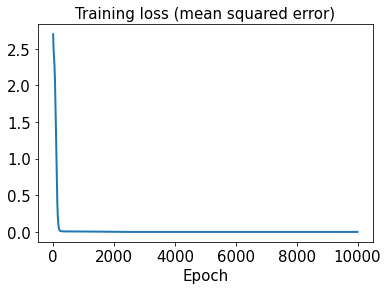

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

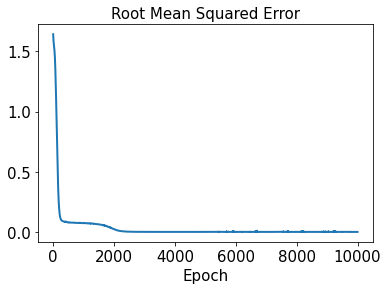

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [57]:
decoded_train2 = sd2.predict(t_train)

In [58]:
decoded_test2 = sd2.predict(t_test)

In [59]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [60]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [61]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

2.9491174394727926e-05


In [62]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.0011602853073119487


In [63]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[1.3318607159807115e-05, 8.735991673890739e-06, 1.2249246365656612e-05, 8.006724438514117e-06, 9.137226785523367e-06, 7.982957551376033e-06, 8.576336946717032e-06, 1.4332473359270276e-05, 8.850151078011243e-06, 1.5270187212345715e-05, 1.4990820181620442e-05, 0.00020956802698974842, 1.2616946417906688e-05, 9.144572687656643e-06, 7.92724916434114e-06, 7.763211177635887e-05, 1.3663953777351912e-05, 1.0460588963181102e-05, 1.0974129180989851e-05, 1.399164387292628e-05, 1.5906521915641716e-05, 1.029223631099887e-05, 1.5592273491069766e-05, 1.1175727086677768e-05, 1.4641466844847225e-05, 7.928835005340152e-06, 1.082187279041319e-05, 9.43094862029526e-06, 1.0106935237018073e-05, 8.394325431545294e-06, 8.334858492965461e-06, 1.2961768761622535e-05, 1.6194569714167326e-05]


In [64]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[1.1550829785297858e-05, 8.133440590231713e-06, 8.131031430185725e-06, 1.1913300850051168e-05, 9.663535600707666e-06, 0.002444279433841365, 9.763670781112107e-06, 0.0009157603542113898]


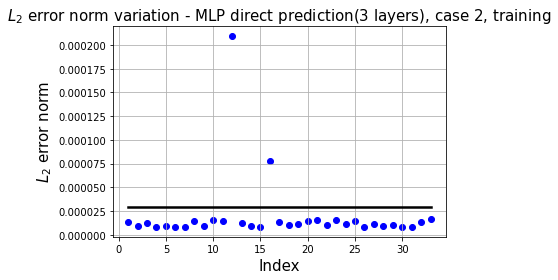

In [105]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

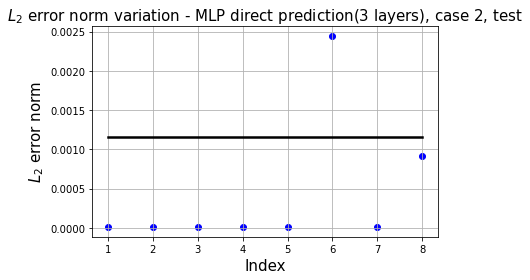

In [106]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

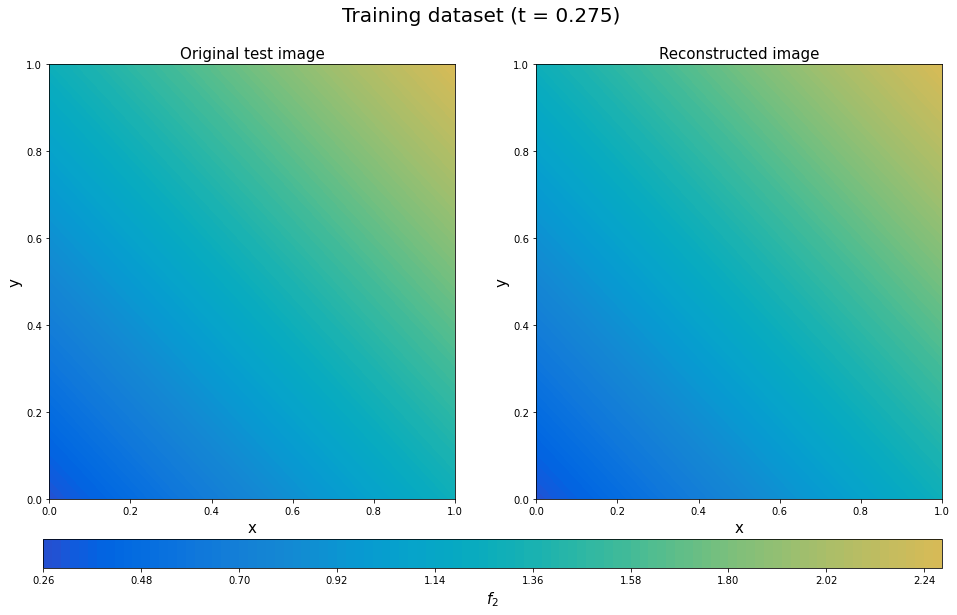

In [67]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

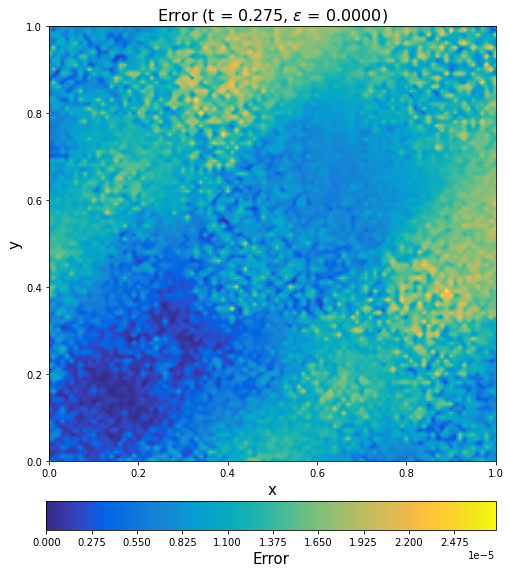

In [68]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

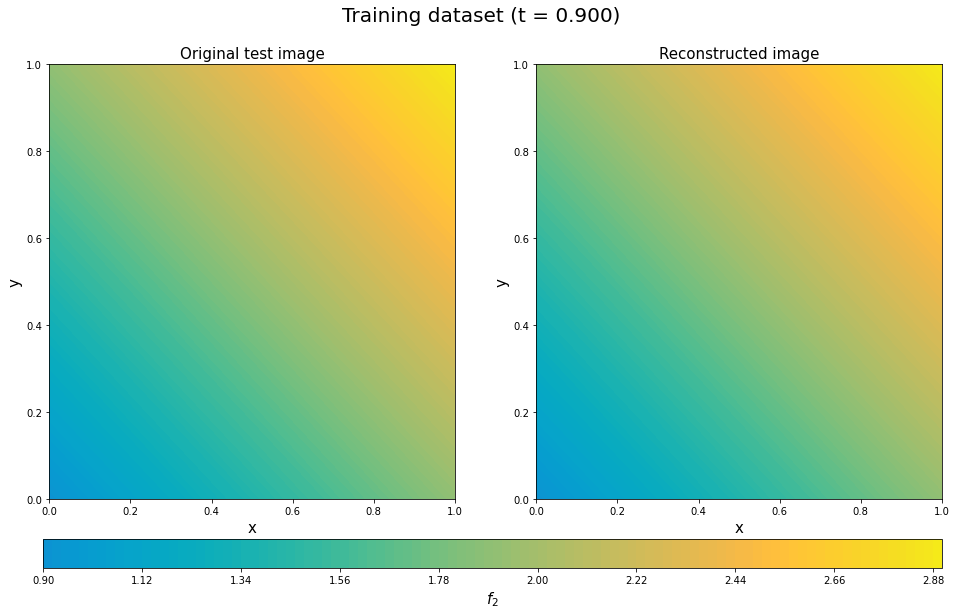

In [69]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

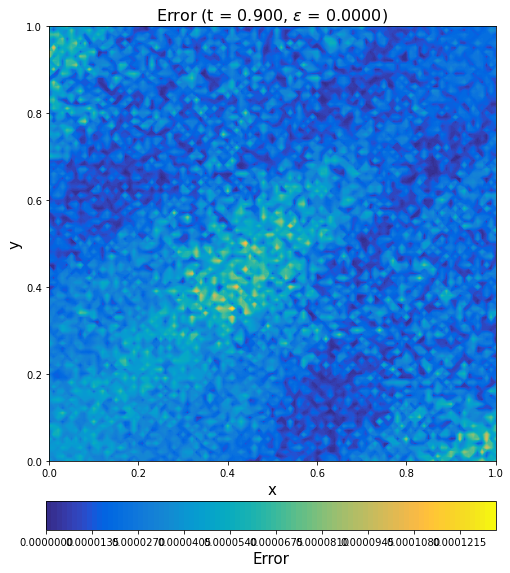

In [70]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

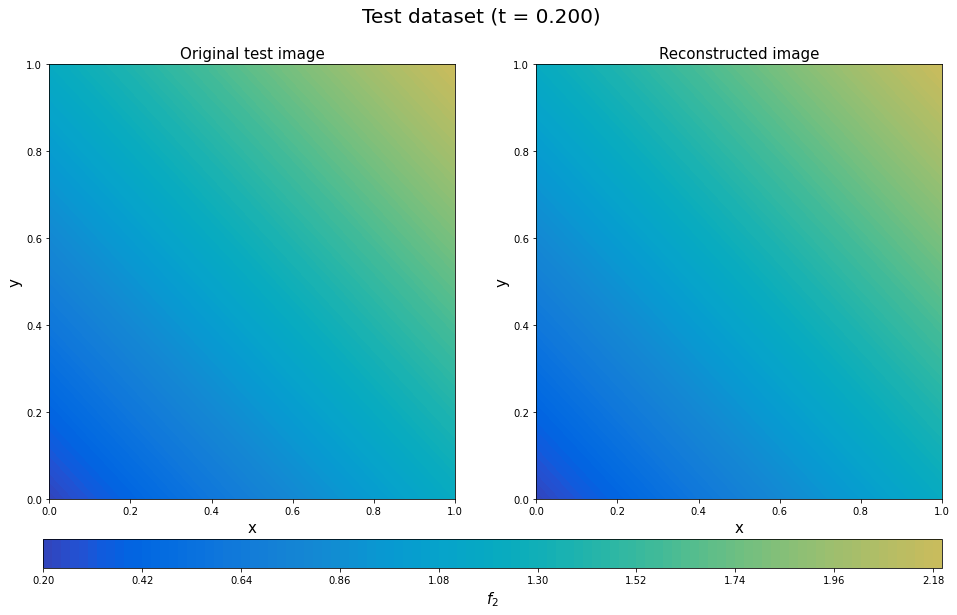

In [71]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

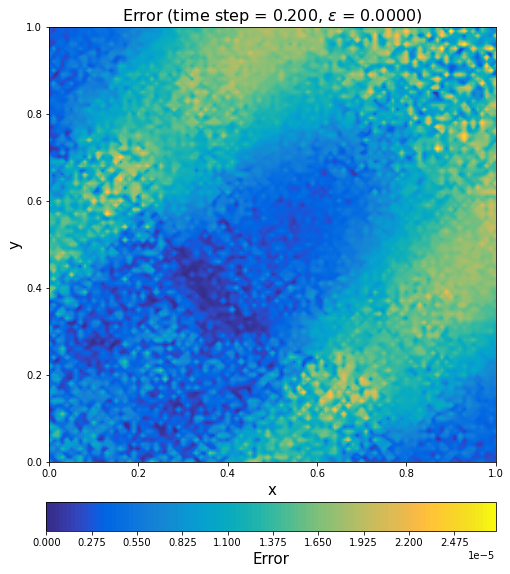

In [72]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

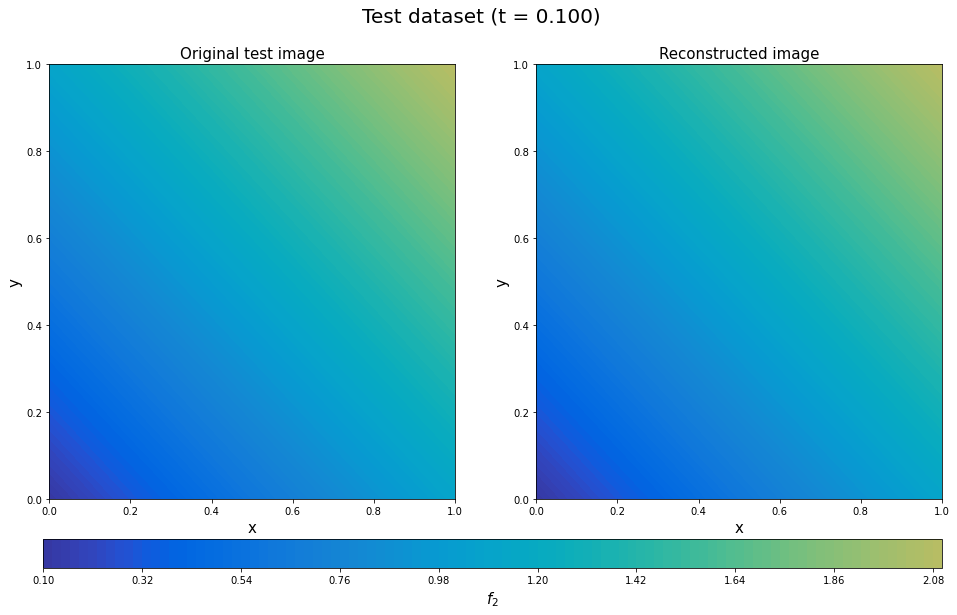

In [73]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

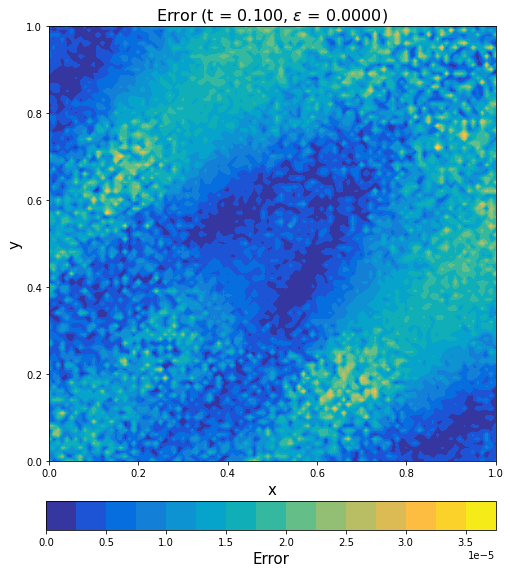

In [74]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [75]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [76]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [77]:
sensor3 = sensor3.reshape((41, 16, 1))

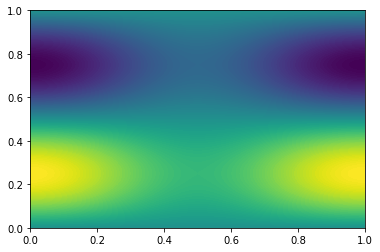

In [78]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [79]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [80]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [81]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [82]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8763 - rmse: 1.9688
Epoch 2/10000
2/2 [==============================] - 0s 42ms/step - loss: 3.7756 - rmse: 1.9431
Epoch 3/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6776 - rmse: 1.9177
Epoch 4/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5840 - rmse: 1.8931
Epoch 5/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4934 - rmse: 1.8691
Epoch 6/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4065 - rmse: 1.8457
Epoch 7/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3243 - rmse: 1.8233
Epoch 8/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2437 - rmse: 1.8010
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1659 - rmse: 1.7793
Epoch 10/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0893 - rmse: 1.7576
Epoch 11/10000
2/2 [==========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1327 - rmse: 1.0643
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1247 - rmse: 1.0605
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1167 - rmse: 1.0568
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1090 - rmse: 1.0531
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1013 - rmse: 1.0495
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0938 - rmse: 1.0459
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0865 - rmse: 1.0423
Epoch 93/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0792 - rmse: 1.0388
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0720 - rmse: 1.0354
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0650 - rmse: 1.0320
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.7223 - rmse: 0.8499
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7189 - rmse: 0.8479
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7155 - rmse: 0.8459
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7120 - rmse: 0.8438
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7085 - rmse: 0.8417
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7050 - rmse: 0.8396
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7015 - rmse: 0.8376
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6981 - rmse: 0.8355
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6946 - rmse: 0.8334
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6912 - rmse: 0.8314
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.4599 - rmse: 0.6781
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4572 - rmse: 0.6762
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4546 - rmse: 0.6743
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4521 - rmse: 0.6724
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4495 - rmse: 0.6705
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4470 - rmse: 0.6686
Epoch 260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4444 - rmse: 0.6666
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4419 - rmse: 0.6648
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4396 - rmse: 0.6630
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4372 - rmse: 0.6612
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2830 - rmse: 0.5319
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2812 - rmse: 0.5303
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2796 - rmse: 0.5288
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2780 - rmse: 0.5272
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2764 - rmse: 0.5258
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2748 - rmse: 0.5242
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2732 - rmse: 0.5227
Epoch 345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2718 - rmse: 0.5213
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2702 - rmse: 0.5198
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2688 - rmse: 0.5184
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1922 - rmse: 0.4384
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1915 - rmse: 0.4376
Epoch 424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1909 - rmse: 0.4369
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1902 - rmse: 0.4361
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1895 - rmse: 0.4353
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1888 - rmse: 0.4346
Epoch 428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1882 - rmse: 0.4338
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1875 - rmse: 0.4330
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1868 - rmse: 0.4322
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1861 - rmse: 0.4314
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.1471 - rmse: 0.3836
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1467 - rmse: 0.3831
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1463 - rmse: 0.3825
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1459 - rmse: 0.3819
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1455 - rmse: 0.3815
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1452 - rmse: 0.3810
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1448 - rmse: 0.3805
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1445 - rmse: 0.3801
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1441 - rmse: 0.3796
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1437 - rmse: 0.3790
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1183 - rmse: 0.3440
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1178 - rmse: 0.3433
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1174 - rmse: 0.3426
Epoch 593/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1169 - rmse: 0.3419
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1165 - rmse: 0.3413
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1160 - rmse: 0.3407
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1156 - rmse: 0.3400
Epoch 597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1151 - rmse: 0.3393
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1147 - rmse: 0.3386
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1142 - rmse: 0.3379
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0890 - rmse: 0.2983
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0885 - rmse: 0.2975
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0880 - rmse: 0.2966
Epoch 677/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0873 - rmse: 0.2954
Epoch 678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0865 - rmse: 0.2941
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0859 - rmse: 0.2931
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0852 - rmse: 0.2919
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0846 - rmse: 0.2909
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0839 - rmse: 0.2897
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0834 - rmse: 0.2887
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0567 - rmse: 0.2380
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0563 - rmse: 0.2374
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0560 - rmse: 0.2366
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0556 - rmse: 0.2358
Epoch 762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0552 - rmse: 0.2350
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0548 - rmse: 0.2341
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0545 - rmse: 0.2334
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0541 - rmse: 0.2326
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0538 - rmse: 0.2319
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0535 - rmse: 0.2313
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0344 - rmse: 0.1854
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0341 - rmse: 0.1848
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0339 - rmse: 0.1842
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0338 - rmse: 0.1837
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0336 - rmse: 0.1832
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0333 - rmse: 0.1825
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0330 - rmse: 0.1816
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0327 - rmse: 0.1809
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0325 - rmse: 0.1802
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0323 - rmse: 0.1796
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1064
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1059
Epoch 1012/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.1056
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1052
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1045
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 1017/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0108 - rmse: 0.1038
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1032
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0801
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 1185/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 1261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 1263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0505
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 1265/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 1266/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 1348/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 1350/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 1351/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 9.4353e-04 - rmse: 0.0307
Epoch 1426/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3230e-04 - rmse: 0.0305
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2250e-04 - rmse: 0.0304
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1715e-04 - rmse: 0.0303
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1614e-04 - rmse: 0.0303
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1876e-04 - rmse: 0.0303
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1929e-04 - rmse: 0.0303
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1446e-04 - rmse: 0.0302
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0635e-04 - rmse: 0.0301
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9614e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 6.2044e-04 - rmse: 0.0249
Epoch 1506/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1940e-04 - rmse: 0.0249
Epoch 1507/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2192e-04 - rmse: 0.0249
Epoch 1508/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2155e-04 - rmse: 0.0249
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1849e-04 - rmse: 0.0249
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1268e-04 - rmse: 0.0248
Epoch 1511/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0474e-04 - rmse: 0.0246
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9714e-04 - rmse: 0.0244
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8935e-04 - rmse: 0.0243
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8368e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.4755e-04 - rmse: 0.0212
Epoch 1586/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4401e-04 - rmse: 0.0211
Epoch 1587/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3920e-04 - rmse: 0.0210
Epoch 1588/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3476e-04 - rmse: 0.0209
Epoch 1589/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3062e-04 - rmse: 0.0208
Epoch 1590/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2862e-04 - rmse: 0.0207
Epoch 1591/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2678e-04 - rmse: 0.0207
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2564e-04 - rmse: 0.0206
Epoch 1593/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2480e-04 - rmse: 0.0206
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2456e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 3.7195e-04 - rmse: 0.0193
Epoch 1666/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6355e-04 - rmse: 0.0191
Epoch 1667/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5657e-04 - rmse: 0.0189
Epoch 1668/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5089e-04 - rmse: 0.0187
Epoch 1669/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4530e-04 - rmse: 0.0186
Epoch 1670/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4320e-04 - rmse: 0.0185
Epoch 1671/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4192e-04 - rmse: 0.0185
Epoch 1672/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4350e-04 - rmse: 0.0185
Epoch 1673/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4459e-04 - rmse: 0.0186
Epoch 1674/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4436e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.8278e-04 - rmse: 0.0168
Epoch 1746/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8212e-04 - rmse: 0.0168
Epoch 1747/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8213e-04 - rmse: 0.0168
Epoch 1748/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8227e-04 - rmse: 0.0168
Epoch 1749/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8251e-04 - rmse: 0.0168
Epoch 1750/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8272e-04 - rmse: 0.0168
Epoch 1751/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8287e-04 - rmse: 0.0168
Epoch 1752/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8276e-04 - rmse: 0.0168
Epoch 1753/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8283e-04 - rmse: 0.0168
Epoch 1754/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8257e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 2.4444e-04 - rmse: 0.0156
Epoch 1826/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4624e-04 - rmse: 0.0157
Epoch 1827/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4869e-04 - rmse: 0.0158
Epoch 1828/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4975e-04 - rmse: 0.0158
Epoch 1829/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4668e-04 - rmse: 0.0157
Epoch 1830/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4222e-04 - rmse: 0.0156
Epoch 1831/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3881e-04 - rmse: 0.0155
Epoch 1832/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3701e-04 - rmse: 0.0154
Epoch 1833/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3604e-04 - rmse: 0.0154
Epoch 1834/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3539e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.0802e-04 - rmse: 0.0144
Epoch 1906/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0418e-04 - rmse: 0.0143
Epoch 1907/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0104e-04 - rmse: 0.0142
Epoch 1908/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9904e-04 - rmse: 0.0141
Epoch 1909/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9889e-04 - rmse: 0.0141
Epoch 1910/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9896e-04 - rmse: 0.0141
Epoch 1911/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9833e-04 - rmse: 0.0141
Epoch 1912/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9776e-04 - rmse: 0.0141
Epoch 1913/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9839e-04 - rmse: 0.0141
Epoch 1914/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0009e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.7308e-04 - rmse: 0.0132
Epoch 1986/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7543e-04 - rmse: 0.0132
Epoch 1987/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7543e-04 - rmse: 0.0132
Epoch 1988/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7432e-04 - rmse: 0.0132
Epoch 1989/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7377e-04 - rmse: 0.0132
Epoch 1990/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7345e-04 - rmse: 0.0132
Epoch 1991/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7330e-04 - rmse: 0.0132
Epoch 1992/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7314e-04 - rmse: 0.0132
Epoch 1993/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7291e-04 - rmse: 0.0131
Epoch 1994/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7252e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.6672e-04 - rmse: 0.0129
Epoch 2066/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6852e-04 - rmse: 0.0130
Epoch 2067/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6566e-04 - rmse: 0.0129
Epoch 2068/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6183e-04 - rmse: 0.0127
Epoch 2069/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5963e-04 - rmse: 0.0126
Epoch 2070/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5798e-04 - rmse: 0.0126
Epoch 2071/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5582e-04 - rmse: 0.0125
Epoch 2072/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5358e-04 - rmse: 0.0124
Epoch 2073/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5253e-04 - rmse: 0.0124
Epoch 2074/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5052e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2463e-04 - rmse: 0.0112
Epoch 2146/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2526e-04 - rmse: 0.0112
Epoch 2147/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2600e-04 - rmse: 0.0112
Epoch 2148/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2721e-04 - rmse: 0.0113
Epoch 2149/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2757e-04 - rmse: 0.0113
Epoch 2150/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2646e-04 - rmse: 0.0112
Epoch 2151/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2362e-04 - rmse: 0.0111
Epoch 2152/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2237e-04 - rmse: 0.0111
Epoch 2153/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2351e-04 - rmse: 0.0111
Epoch 2154/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2448e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.0463e-04 - rmse: 0.0102
Epoch 2226/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0327e-04 - rmse: 0.0102
Epoch 2227/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0304e-04 - rmse: 0.0102
Epoch 2228/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0328e-04 - rmse: 0.0102
Epoch 2229/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0241e-04 - rmse: 0.0101
Epoch 2230/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0139e-04 - rmse: 0.0101
Epoch 2231/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0157e-04 - rmse: 0.0101
Epoch 2232/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0214e-04 - rmse: 0.0101
Epoch 2233/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0293e-04 - rmse: 0.0101
Epoch 2234/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0401e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 9.6207e-05 - rmse: 0.0098
Epoch 2306/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1514e-05 - rmse: 0.0096
Epoch 2307/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9895e-05 - rmse: 0.0095
Epoch 2308/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9473e-05 - rmse: 0.0095
Epoch 2309/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9607e-05 - rmse: 0.0095
Epoch 2310/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0552e-05 - rmse: 0.0095
Epoch 2311/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1826e-05 - rmse: 0.0096
Epoch 2312/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.0557e-05 - rmse: 0.0095
Epoch 2313/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8917e-05 - rmse: 0.0094
Epoch 2314/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9160e-05 - rmse: 0.0

2/2 [==============================] - 0s 4ms/step - loss: 8.6392e-05 - rmse: 0.0093
Epoch 2386/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5226e-05 - rmse: 0.0092
Epoch 2387/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3412e-05 - rmse: 0.0091
Epoch 2388/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1838e-05 - rmse: 0.0090
Epoch 2389/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0837e-05 - rmse: 0.0090
Epoch 2390/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0420e-05 - rmse: 0.0090
Epoch 2391/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0077e-05 - rmse: 0.0089
Epoch 2392/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0857e-05 - rmse: 0.0090
Epoch 2393/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3729e-05 - rmse: 0.0092
Epoch 2394/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6541e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 6.9037e-05 - rmse: 0.0083
Epoch 2466/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9412e-05 - rmse: 0.0083
Epoch 2467/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9465e-05 - rmse: 0.0083
Epoch 2468/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9447e-05 - rmse: 0.0083
Epoch 2469/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9689e-05 - rmse: 0.0083
Epoch 2470/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0399e-05 - rmse: 0.0084
Epoch 2471/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1733e-05 - rmse: 0.0085
Epoch 2472/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2863e-05 - rmse: 0.0085
Epoch 2473/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3310e-05 - rmse: 0.0086
Epoch 2474/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3031e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 6.5037e-05 - rmse: 0.0081
Epoch 2546/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4365e-05 - rmse: 0.0080
Epoch 2547/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4048e-05 - rmse: 0.0080
Epoch 2548/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3182e-05 - rmse: 0.0079
Epoch 2549/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2288e-05 - rmse: 0.0079
Epoch 2550/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1626e-05 - rmse: 0.0079
Epoch 2551/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1560e-05 - rmse: 0.0078
Epoch 2552/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1847e-05 - rmse: 0.0079
Epoch 2553/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1852e-05 - rmse: 0.0079
Epoch 2554/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1498e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.5636e-05 - rmse: 0.0075
Epoch 2626/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5673e-05 - rmse: 0.0075
Epoch 2627/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5924e-05 - rmse: 0.0075
Epoch 2628/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6388e-05 - rmse: 0.0075
Epoch 2629/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6318e-05 - rmse: 0.0075
Epoch 2630/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6055e-05 - rmse: 0.0075
Epoch 2631/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5717e-05 - rmse: 0.0075
Epoch 2632/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5300e-05 - rmse: 0.0074
Epoch 2633/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4871e-05 - rmse: 0.0074
Epoch 2634/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4568e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.2185e-05 - rmse: 0.0072
Epoch 2706/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0324e-05 - rmse: 0.0071
Epoch 2707/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9794e-05 - rmse: 0.0071
Epoch 2708/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9769e-05 - rmse: 0.0071
Epoch 2709/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0639e-05 - rmse: 0.0071
Epoch 2710/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2251e-05 - rmse: 0.0072
Epoch 2711/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2738e-05 - rmse: 0.0073
Epoch 2712/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1793e-05 - rmse: 0.0072
Epoch 2713/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0262e-05 - rmse: 0.0071
Epoch 2714/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9073e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.0794e-05 - rmse: 0.0071
Epoch 2786/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8960e-05 - rmse: 0.0070
Epoch 2787/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8007e-05 - rmse: 0.0069
Epoch 2788/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8353e-05 - rmse: 0.0070
Epoch 2789/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8837e-05 - rmse: 0.0070
Epoch 2790/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9558e-05 - rmse: 0.0070
Epoch 2791/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9976e-05 - rmse: 0.0071
Epoch 2792/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0145e-05 - rmse: 0.0071
Epoch 2793/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0319e-05 - rmse: 0.0071
Epoch 2794/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0271e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.4778e-05 - rmse: 0.0067
Epoch 2866/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4461e-05 - rmse: 0.0067
Epoch 2867/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4125e-05 - rmse: 0.0066
Epoch 2868/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3312e-05 - rmse: 0.0066
Epoch 2869/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1666e-05 - rmse: 0.0065
Epoch 2870/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0792e-05 - rmse: 0.0064
Epoch 2871/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0916e-05 - rmse: 0.0064
Epoch 2872/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1468e-05 - rmse: 0.0064
Epoch 2873/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1503e-05 - rmse: 0.0064
Epoch 2874/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1288e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.8620e-05 - rmse: 0.0062
Epoch 2946/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9926e-05 - rmse: 0.0063
Epoch 2947/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1284e-05 - rmse: 0.0064
Epoch 2948/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1493e-05 - rmse: 0.0064
Epoch 2949/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0061e-05 - rmse: 0.0063
Epoch 2950/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8042e-05 - rmse: 0.0062
Epoch 2951/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7410e-05 - rmse: 0.0061
Epoch 2952/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9364e-05 - rmse: 0.0063
Epoch 2953/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2305e-05 - rmse: 0.0065
Epoch 2954/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3280e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 3.4907e-05 - rmse: 0.0059
Epoch 3026/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4638e-05 - rmse: 0.0059
Epoch 3027/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4134e-05 - rmse: 0.0058
Epoch 3028/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5014e-05 - rmse: 0.0059
Epoch 3029/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8729e-05 - rmse: 0.0062
Epoch 3030/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2640e-05 - rmse: 0.0065
Epoch 3031/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3704e-05 - rmse: 0.0066
Epoch 3032/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1044e-05 - rmse: 0.0064
Epoch 3033/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6866e-05 - rmse: 0.0061
Epoch 3034/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4494e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.4074e-05 - rmse: 0.0058
Epoch 3106/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2449e-05 - rmse: 0.0057
Epoch 3107/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2217e-05 - rmse: 0.0057
Epoch 3108/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2052e-05 - rmse: 0.0057
Epoch 3109/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1731e-05 - rmse: 0.0056
Epoch 3110/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1888e-05 - rmse: 0.0056
Epoch 3111/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2754e-05 - rmse: 0.0057
Epoch 3112/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3389e-05 - rmse: 0.0058
Epoch 3113/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3785e-05 - rmse: 0.0058
Epoch 3114/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3807e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.0614e-05 - rmse: 0.0055
Epoch 3186/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0077e-05 - rmse: 0.0055
Epoch 3187/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0152e-05 - rmse: 0.0055
Epoch 3188/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1564e-05 - rmse: 0.0056
Epoch 3189/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2951e-05 - rmse: 0.0057
Epoch 3190/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2721e-05 - rmse: 0.0057
Epoch 3191/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1211e-05 - rmse: 0.0056
Epoch 3192/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9626e-05 - rmse: 0.0054
Epoch 3193/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9220e-05 - rmse: 0.0054
Epoch 3194/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0152e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.6367e-05 - rmse: 0.0051
Epoch 3266/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6172e-05 - rmse: 0.0051
Epoch 3267/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5944e-05 - rmse: 0.0051
Epoch 3268/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5817e-05 - rmse: 0.0051
Epoch 3269/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5754e-05 - rmse: 0.0051
Epoch 3270/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5862e-05 - rmse: 0.0051
Epoch 3271/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6297e-05 - rmse: 0.0051
Epoch 3272/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6713e-05 - rmse: 0.0052
Epoch 3273/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7139e-05 - rmse: 0.0052
Epoch 3274/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8331e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 3.3307e-05 - rmse: 0.0058
Epoch 3346/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9576e-05 - rmse: 0.0054
Epoch 3347/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5204e-05 - rmse: 0.0050
Epoch 3348/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6431e-05 - rmse: 0.0051
Epoch 3349/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4168e-05 - rmse: 0.0058
Epoch 3350/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9559e-05 - rmse: 0.0063
Epoch 3351/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9458e-05 - rmse: 0.0063
Epoch 3352/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3693e-05 - rmse: 0.0058
Epoch 3353/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5287e-05 - rmse: 0.0050
Epoch 3354/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3409e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.1576e-05 - rmse: 0.0046
Epoch 3426/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1655e-05 - rmse: 0.0047
Epoch 3427/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1331e-05 - rmse: 0.0046
Epoch 3428/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1280e-05 - rmse: 0.0046
Epoch 3429/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1914e-05 - rmse: 0.0047
Epoch 3430/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2583e-05 - rmse: 0.0048
Epoch 3431/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2853e-05 - rmse: 0.0048
Epoch 3432/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2690e-05 - rmse: 0.0048
Epoch 3433/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2391e-05 - rmse: 0.0047
Epoch 3434/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2310e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.9600e-05 - rmse: 0.0044
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8715e-05 - rmse: 0.0043
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8656e-05 - rmse: 0.0043
Epoch 3508/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8590e-05 - rmse: 0.0043
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8409e-05 - rmse: 0.0043
Epoch 3510/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8937e-05 - rmse: 0.0044
Epoch 3511/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9755e-05 - rmse: 0.0044
Epoch 3512/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9943e-05 - rmse: 0.0045
Epoch 3513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9832e-05 - rmse: 0.0045
Epoch 3514/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9890e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.8255e-05 - rmse: 0.0043
Epoch 3586/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7609e-05 - rmse: 0.0042
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6628e-05 - rmse: 0.0041
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6940e-05 - rmse: 0.0041
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7348e-05 - rmse: 0.0042
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6718e-05 - rmse: 0.0041
Epoch 3591/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7031e-05 - rmse: 0.0041
Epoch 3592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8499e-05 - rmse: 0.0043
Epoch 3593/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0338e-05 - rmse: 0.0045
Epoch 3594/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0700e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.5636e-05 - rmse: 0.0040
Epoch 3666/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5536e-05 - rmse: 0.0039
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5319e-05 - rmse: 0.0039
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5232e-05 - rmse: 0.0039
Epoch 3669/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5205e-05 - rmse: 0.0039
Epoch 3670/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5198e-05 - rmse: 0.0039
Epoch 3671/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4792e-05 - rmse: 0.0038
Epoch 3672/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5078e-05 - rmse: 0.0039
Epoch 3673/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5888e-05 - rmse: 0.0040
Epoch 3674/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6086e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3815e-05 - rmse: 0.0037
Epoch 3746/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3401e-05 - rmse: 0.0037
Epoch 3747/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3389e-05 - rmse: 0.0037
Epoch 3748/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3520e-05 - rmse: 0.0037
Epoch 3749/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3627e-05 - rmse: 0.0037
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3786e-05 - rmse: 0.0037
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4023e-05 - rmse: 0.0037
Epoch 3752/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4265e-05 - rmse: 0.0038
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4409e-05 - rmse: 0.0038
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4204e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.4038e-05 - rmse: 0.0037
Epoch 3826/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3280e-05 - rmse: 0.0036
Epoch 3827/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2476e-05 - rmse: 0.0035
Epoch 3828/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4088e-05 - rmse: 0.0038
Epoch 3829/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4411e-05 - rmse: 0.0038
Epoch 3830/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2252e-05 - rmse: 0.0035
Epoch 3831/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6154e-05 - rmse: 0.0040
Epoch 3832/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0406e-05 - rmse: 0.0045
Epoch 3833/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8341e-05 - rmse: 0.0043
Epoch 3834/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4180e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.9026e-06 - rmse: 0.0031
Epoch 3906/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6346e-06 - rmse: 0.0031
Epoch 3907/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9621e-06 - rmse: 0.0032
Epoch 3908/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0389e-05 - rmse: 0.0032
Epoch 3909/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0042e-05 - rmse: 0.0032
Epoch 3910/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7547e-06 - rmse: 0.0031
Epoch 3911/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8415e-06 - rmse: 0.0031
Epoch 3912/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8314e-06 - rmse: 0.0031
Epoch 3913/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9265e-06 - rmse: 0.0032
Epoch 3914/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0058e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.0269e-05 - rmse: 0.0032
Epoch 3986/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7546e-06 - rmse: 0.0030
Epoch 3987/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1332e-05 - rmse: 0.0034
Epoch 3988/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2439e-05 - rmse: 0.0035
Epoch 3989/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0146e-05 - rmse: 0.0032
Epoch 3990/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0050e-05 - rmse: 0.0032
Epoch 3991/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7927e-05 - rmse: 0.0042
Epoch 3992/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1760e-05 - rmse: 0.0047
Epoch 3993/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3112e-05 - rmse: 0.0036
Epoch 3994/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5189e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 8.6566e-06 - rmse: 0.0029
Epoch 4066/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0293e-06 - rmse: 0.0028
Epoch 4067/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4998e-06 - rmse: 0.0027
Epoch 4068/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4178e-06 - rmse: 0.0027
Epoch 4069/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5328e-06 - rmse: 0.0027
Epoch 4070/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6138e-06 - rmse: 0.0028
Epoch 4071/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6046e-06 - rmse: 0.0028
Epoch 4072/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4547e-06 - rmse: 0.0027
Epoch 4073/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2695e-06 - rmse: 0.0027
Epoch 4074/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2140e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.5582e-06 - rmse: 0.0026
Epoch 4146/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6326e-06 - rmse: 0.0026
Epoch 4147/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6154e-06 - rmse: 0.0026
Epoch 4148/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5488e-06 - rmse: 0.0026
Epoch 4149/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4794e-06 - rmse: 0.0025
Epoch 4150/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9427e-06 - rmse: 0.0026
Epoch 4151/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6753e-06 - rmse: 0.0028
Epoch 4152/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7070e-06 - rmse: 0.0028
Epoch 4153/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5454e-06 - rmse: 0.0027
Epoch 4154/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3902e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.3070e-06 - rmse: 0.0025
Epoch 4226/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0518e-06 - rmse: 0.0027
Epoch 4227/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3577e-06 - rmse: 0.0025
Epoch 4228/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8298e-06 - rmse: 0.0024
Epoch 4229/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8454e-06 - rmse: 0.0024
Epoch 4230/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8461e-06 - rmse: 0.0024
Epoch 4231/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8001e-06 - rmse: 0.0024
Epoch 4232/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6567e-06 - rmse: 0.0024
Epoch 4233/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5088e-06 - rmse: 0.0023
Epoch 4234/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9036e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.0991e-06 - rmse: 0.0023
Epoch 4306/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0354e-06 - rmse: 0.0022
Epoch 4307/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9705e-06 - rmse: 0.0022
Epoch 4308/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9397e-06 - rmse: 0.0022
Epoch 4309/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0034e-06 - rmse: 0.0022
Epoch 4310/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1278e-06 - rmse: 0.0023
Epoch 4311/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1545e-06 - rmse: 0.0023
Epoch 4312/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0233e-06 - rmse: 0.0022
Epoch 4313/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9414e-06 - rmse: 0.0022
Epoch 4314/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0620e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.9069e-06 - rmse: 0.0022
Epoch 4386/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6736e-06 - rmse: 0.0022
Epoch 4387/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8676e-06 - rmse: 0.0022
Epoch 4388/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1979e-06 - rmse: 0.0023
Epoch 4389/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7575e-06 - rmse: 0.0022
Epoch 4390/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8481e-06 - rmse: 0.0022
Epoch 4391/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9298e-06 - rmse: 0.0022
Epoch 4392/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5653e-06 - rmse: 0.0021
Epoch 4393/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6974e-06 - rmse: 0.0022
Epoch 4394/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0797e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.7709e-06 - rmse: 0.0022
Epoch 4466/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6943e-06 - rmse: 0.0022
Epoch 4467/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7552e-06 - rmse: 0.0022
Epoch 4468/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5695e-06 - rmse: 0.0021
Epoch 4469/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1424e-06 - rmse: 0.0020
Epoch 4470/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1474e-06 - rmse: 0.0020
Epoch 4471/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6967e-06 - rmse: 0.0022
Epoch 4472/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2430e-06 - rmse: 0.0023
Epoch 4473/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2516e-06 - rmse: 0.0023
Epoch 4474/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7405e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.1523e-06 - rmse: 0.0020
Epoch 4546/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2028e-06 - rmse: 0.0021
Epoch 4547/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2580e-06 - rmse: 0.0021
Epoch 4548/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1993e-06 - rmse: 0.0020
Epoch 4549/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4225e-06 - rmse: 0.0021
Epoch 4550/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3413e-06 - rmse: 0.0021
Epoch 4551/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4723e-06 - rmse: 0.0021
Epoch 4552/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9607e-06 - rmse: 0.0022
Epoch 4553/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6011e-06 - rmse: 0.0021
Epoch 4554/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1739e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.3250e-06 - rmse: 0.0021
Epoch 4626/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6580e-06 - rmse: 0.0019
Epoch 4627/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6876e-06 - rmse: 0.0019
Epoch 4628/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9980e-06 - rmse: 0.0020
Epoch 4629/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9953e-06 - rmse: 0.0020
Epoch 4630/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8156e-06 - rmse: 0.0020
Epoch 4631/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6556e-06 - rmse: 0.0019
Epoch 4632/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5616e-06 - rmse: 0.0019
Epoch 4633/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7895e-06 - rmse: 0.0019
Epoch 4634/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0696e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.3492e-06 - rmse: 0.0018
Epoch 4706/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1604e-06 - rmse: 0.0018
Epoch 4707/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1026e-06 - rmse: 0.0018
Epoch 4708/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0585e-06 - rmse: 0.0017
Epoch 4709/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0215e-06 - rmse: 0.0017
Epoch 4710/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0064e-06 - rmse: 0.0017
Epoch 4711/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0061e-06 - rmse: 0.0017
Epoch 4712/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0386e-06 - rmse: 0.0017
Epoch 4713/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1171e-06 - rmse: 0.0018
Epoch 4714/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1820e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8425e-06 - rmse: 0.0017
Epoch 4786/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1304e-06 - rmse: 0.0018
Epoch 4787/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9275e-06 - rmse: 0.0017
Epoch 4788/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8393e-06 - rmse: 0.0017
Epoch 4789/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9811e-06 - rmse: 0.0017
Epoch 4790/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0862e-06 - rmse: 0.0018
Epoch 4791/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4727e-06 - rmse: 0.0019
Epoch 4792/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2863e-06 - rmse: 0.0021
Epoch 4793/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4223e-06 - rmse: 0.0018
Epoch 4794/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3787e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.8066e-06 - rmse: 0.0017
Epoch 4866/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9434e-06 - rmse: 0.0017
Epoch 4867/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9062e-06 - rmse: 0.0017
Epoch 4868/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7489e-06 - rmse: 0.0017
Epoch 4869/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6966e-06 - rmse: 0.0016
Epoch 4870/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5743e-06 - rmse: 0.0016
Epoch 4871/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8157e-06 - rmse: 0.0017
Epoch 4872/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8949e-06 - rmse: 0.0017
Epoch 4873/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6405e-06 - rmse: 0.0016
Epoch 4874/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9073e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5460e-06 - rmse: 0.0016
Epoch 4946/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2380e-06 - rmse: 0.0018
Epoch 4947/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0235e-06 - rmse: 0.0017
Epoch 4948/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4003e-06 - rmse: 0.0015
Epoch 4949/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8618e-06 - rmse: 0.0017
Epoch 4950/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6949e-06 - rmse: 0.0016
Epoch 4951/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5083e-06 - rmse: 0.0016
Epoch 4952/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5625e-06 - rmse: 0.0016
Epoch 4953/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4486e-06 - rmse: 0.0016
Epoch 4954/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5087e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 3.7266e-06 - rmse: 0.0019
Epoch 5026/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3873e-06 - rmse: 0.0018
Epoch 5027/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3867e-06 - rmse: 0.0015
Epoch 5028/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6970e-06 - rmse: 0.0019
Epoch 5029/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0275e-06 - rmse: 0.0020
Epoch 5030/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9717e-06 - rmse: 0.0017
Epoch 5031/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5849e-06 - rmse: 0.0016
Epoch 5032/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6409e-06 - rmse: 0.0016
Epoch 5033/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3646e-06 - rmse: 0.0018
Epoch 5034/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8054e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.3346e-06 - rmse: 0.0015
Epoch 5106/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4795e-06 - rmse: 0.0016
Epoch 5107/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6735e-06 - rmse: 0.0016
Epoch 5108/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3027e-06 - rmse: 0.0015
Epoch 5109/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4690e-06 - rmse: 0.0016
Epoch 5110/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6397e-06 - rmse: 0.0016
Epoch 5111/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5292e-06 - rmse: 0.0016
Epoch 5112/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8730e-06 - rmse: 0.0017
Epoch 5113/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2880e-06 - rmse: 0.0015
Epoch 5114/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6425e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.6980e-06 - rmse: 0.0016
Epoch 5186/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0978e-06 - rmse: 0.0014
Epoch 5187/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9811e-06 - rmse: 0.0014
Epoch 5188/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9767e-06 - rmse: 0.0014
Epoch 5189/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0005e-06 - rmse: 0.0017
Epoch 5190/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5753e-06 - rmse: 0.0019
Epoch 5191/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4621e-06 - rmse: 0.0016
Epoch 5192/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8681e-06 - rmse: 0.0017
Epoch 5193/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4856e-06 - rmse: 0.0016
Epoch 5194/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5597e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.9991e-06 - rmse: 0.0014
Epoch 5266/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0353e-06 - rmse: 0.0014
Epoch 5267/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2385e-06 - rmse: 0.0015
Epoch 5268/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5106e-06 - rmse: 0.0016
Epoch 5269/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4198e-06 - rmse: 0.0016
Epoch 5270/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6013e-06 - rmse: 0.0016
Epoch 5271/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0013e-06 - rmse: 0.0017
Epoch 5272/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1206e-06 - rmse: 0.0018
Epoch 5273/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5212e-06 - rmse: 0.0019
Epoch 5274/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5161e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.1524e-06 - rmse: 0.0020
Epoch 5346/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8382e-06 - rmse: 0.0017
Epoch 5347/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0499e-06 - rmse: 0.0020
Epoch 5348/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1058e-06 - rmse: 0.0015
Epoch 5349/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6624e-06 - rmse: 0.0019
Epoch 5350/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4245e-06 - rmse: 0.0016
Epoch 5351/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5401e-06 - rmse: 0.0019
Epoch 5352/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9255e-06 - rmse: 0.0014
Epoch 5353/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2553e-06 - rmse: 0.0018
Epoch 5354/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8545e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8822e-06 - rmse: 0.0017
Epoch 5426/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1407e-06 - rmse: 0.0015
Epoch 5427/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0976e-06 - rmse: 0.0014
Epoch 5428/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1207e-06 - rmse: 0.0015
Epoch 5429/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2823e-06 - rmse: 0.0015
Epoch 5430/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6160e-06 - rmse: 0.0016
Epoch 5431/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2686e-06 - rmse: 0.0015
Epoch 5432/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0587e-06 - rmse: 0.0017
Epoch 5433/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9133e-06 - rmse: 0.0014
Epoch 5434/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7863e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.4556e-06 - rmse: 0.0012
Epoch 5506/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7831e-06 - rmse: 0.0013
Epoch 5507/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6277e-06 - rmse: 0.0013
Epoch 5508/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7668e-06 - rmse: 0.0013
Epoch 5509/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7293e-06 - rmse: 0.0013
Epoch 5510/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7703e-06 - rmse: 0.0013
Epoch 5511/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8178e-06 - rmse: 0.0013
Epoch 5512/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6227e-06 - rmse: 0.0013
Epoch 5513/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5033e-06 - rmse: 0.0012
Epoch 5514/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6073e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.7334e-06 - rmse: 0.0017
Epoch 5586/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6473e-06 - rmse: 0.0019
Epoch 5587/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2522e-06 - rmse: 0.0021
Epoch 5588/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5931e-06 - rmse: 0.0019
Epoch 5589/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2822e-06 - rmse: 0.0015
Epoch 5590/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8192e-06 - rmse: 0.0017
Epoch 5591/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7913e-06 - rmse: 0.0013
Epoch 5592/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2913e-06 - rmse: 0.0015
Epoch 5593/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0399e-06 - rmse: 0.0014
Epoch 5594/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6061e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.7972e-06 - rmse: 0.0017
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7939e-06 - rmse: 0.0013
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8367e-06 - rmse: 0.0014
Epoch 5668/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9408e-06 - rmse: 0.0014
Epoch 5669/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6535e-06 - rmse: 0.0013
Epoch 5670/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4671e-06 - rmse: 0.0012
Epoch 5671/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4094e-06 - rmse: 0.0012
Epoch 5672/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3988e-06 - rmse: 0.0012
Epoch 5673/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5211e-06 - rmse: 0.0012
Epoch 5674/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6087e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3515e-06 - rmse: 0.0012
Epoch 5746/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5284e-06 - rmse: 0.0012
Epoch 5747/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4318e-06 - rmse: 0.0012
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4035e-06 - rmse: 0.0012
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2465e-06 - rmse: 0.0011
Epoch 5750/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4039e-06 - rmse: 0.0012
Epoch 5751/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2129e-06 - rmse: 0.0011
Epoch 5752/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4045e-06 - rmse: 0.0012
Epoch 5753/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2428e-06 - rmse: 0.0011
Epoch 5754/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1683e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.4902e-06 - rmse: 0.0012
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4090e-06 - rmse: 0.0012
Epoch 5827/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2955e-06 - rmse: 0.0011
Epoch 5828/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2545e-06 - rmse: 0.0011
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2634e-06 - rmse: 0.0011
Epoch 5830/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3974e-06 - rmse: 0.0012
Epoch 5831/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3620e-06 - rmse: 0.0012
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6086e-06 - rmse: 0.0013
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2530e-06 - rmse: 0.0011
Epoch 5834/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6020e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.1951e-06 - rmse: 0.0011
Epoch 5906/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7548e-06 - rmse: 0.0017
Epoch 5907/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0663e-06 - rmse: 0.0014
Epoch 5908/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0692e-06 - rmse: 0.0018
Epoch 5909/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2516e-06 - rmse: 0.0018
Epoch 5910/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4186e-06 - rmse: 0.0021
Epoch 5911/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3341e-06 - rmse: 0.0012
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2316e-06 - rmse: 0.0021
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4517e-06 - rmse: 0.0012
Epoch 5914/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8008e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.2617e-06 - rmse: 0.0015
Epoch 5986/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3810e-06 - rmse: 0.0015
Epoch 5987/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5826e-06 - rmse: 0.0016
Epoch 5988/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8143e-06 - rmse: 0.0013
Epoch 5989/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4913e-06 - rmse: 0.0016
Epoch 5990/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5976e-06 - rmse: 0.0013
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7764e-06 - rmse: 0.0013
Epoch 5992/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3504e-06 - rmse: 0.0012
Epoch 5993/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8814e-06 - rmse: 0.0014
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5350e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.4989e-06 - rmse: 0.0012
Epoch 6066/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2976e-06 - rmse: 0.0011
Epoch 6067/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2729e-06 - rmse: 0.0011
Epoch 6068/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2925e-06 - rmse: 0.0011
Epoch 6069/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2353e-06 - rmse: 0.0011
Epoch 6070/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1107e-06 - rmse: 0.0011
Epoch 6071/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0157e-06 - rmse: 0.0014
Epoch 6072/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5642e-06 - rmse: 0.0013
Epoch 6073/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6472e-06 - rmse: 0.0013
Epoch 6074/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0503e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.4594e-06 - rmse: 0.0012
Epoch 6145/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2050e-06 - rmse: 0.0011
Epoch 6146/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4608e-06 - rmse: 0.0016
Epoch 6147/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1324e-06 - rmse: 0.0011
Epoch 6148/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8555e-06 - rmse: 0.0017
Epoch 6149/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3521e-06 - rmse: 0.0012
Epoch 6150/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5591e-06 - rmse: 0.0019
Epoch 6151/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2992e-06 - rmse: 0.0011
Epoch 6152/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6469e-06 - rmse: 0.0013
Epoch 6153/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6844e-07 - rmse: 9.84

2/2 [==============================] - 0s 3ms/step - loss: 8.1329e-07 - rmse: 9.0183e-04
Epoch 6224/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0207e-06 - rmse: 0.0010
Epoch 6225/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5274e-07 - rmse: 9.7608e-04
Epoch 6226/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.0769e-07 - rmse: 9.5273e-04
Epoch 6227/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0858e-06 - rmse: 0.0010
Epoch 6228/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1374e-07 - rmse: 9.5590e-04
Epoch 6229/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0687e-06 - rmse: 0.0010
Epoch 6230/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5251e-07 - rmse: 9.2331e-04
Epoch 6231/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1981e-06 - rmse: 0.0011
Epoch 6232/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0

2/2 [==============================] - 0s 4ms/step - loss: 3.3530e-06 - rmse: 0.0018
Epoch 6302/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7450e-06 - rmse: 0.0013
Epoch 6303/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4834e-06 - rmse: 0.0012
Epoch 6304/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4302e-06 - rmse: 0.0016
Epoch 6305/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5973e-07 - rmse: 9.7966e-04
Epoch 6306/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2411e-06 - rmse: 0.0015
Epoch 6307/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1785e-06 - rmse: 0.0011
Epoch 6308/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8776e-06 - rmse: 0.0014
Epoch 6309/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4691e-06 - rmse: 0.0012
Epoch 6310/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8894e-06 - rmse: 

2/2 [==============================] - 0s 5ms/step - loss: 1.0939e-06 - rmse: 0.0010
Epoch 6381/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0674e-06 - rmse: 0.0014
Epoch 6382/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3129e-06 - rmse: 0.0011
Epoch 6383/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0183e-07 - rmse: 9.4965e-04
Epoch 6384/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6864e-06 - rmse: 0.0013
Epoch 6385/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7308e-06 - rmse: 0.0013
Epoch 6386/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7779e-06 - rmse: 0.0013
Epoch 6387/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2807e-06 - rmse: 0.0011
Epoch 6388/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1477e-06 - rmse: 0.0011
Epoch 6389/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0230e-07 - rmse: 

2/2 [==============================] - 0s 5ms/step - loss: 1.3740e-06 - rmse: 0.0012
Epoch 6461/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0268e-06 - rmse: 0.0010
Epoch 6462/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0671e-06 - rmse: 0.0010
Epoch 6463/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.2458e-07 - rmse: 9.6155e-04
Epoch 6464/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3033e-07 - rmse: 9.1122e-04
Epoch 6465/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4278e-07 - rmse: 9.1803e-04
Epoch 6466/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1005e-06 - rmse: 0.0010
Epoch 6467/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0845e-06 - rmse: 0.0010
Epoch 6468/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2828e-06 - rmse: 0.0011
Epoch 6469/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1764e-06 

2/2 [==============================] - 0s 3ms/step - loss: 7.6438e-06 - rmse: 0.0028
Epoch 6540/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4617e-06 - rmse: 0.0031
Epoch 6541/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7112e-06 - rmse: 0.0013
Epoch 6542/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6696e-05 - rmse: 0.0041
Epoch 6543/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0325e-05 - rmse: 0.0032
Epoch 6544/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6466e-05 - rmse: 0.0060
Epoch 6545/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4395e-05 - rmse: 0.0038
Epoch 6546/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6110e-05 - rmse: 0.0040
Epoch 6547/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7739e-06 - rmse: 0.0026
Epoch 6548/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.7410e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 8.9156e-07 - rmse: 9.4422e-04
Epoch 6619/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1730e-06 - rmse: 0.0011
Epoch 6620/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1463e-06 - rmse: 0.0011
Epoch 6621/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4691e-06 - rmse: 0.0012
Epoch 6622/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5760e-06 - rmse: 0.0013
Epoch 6623/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2195e-06 - rmse: 0.0011
Epoch 6624/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7108e-07 - rmse: 9.3332e-04
Epoch 6625/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1597e-06 - rmse: 0.0011
Epoch 6626/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1735e-07 - rmse: 9.5779e-04
Epoch 6627/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9957e-07 

2/2 [==============================] - 0s 3ms/step - loss: 8.6205e-07 - rmse: 9.2847e-04
Epoch 6697/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6391e-06 - rmse: 0.0013
Epoch 6698/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1235e-06 - rmse: 0.0011
Epoch 6699/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2164e-06 - rmse: 0.0011
Epoch 6700/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2724e-07 - rmse: 9.0953e-04
Epoch 6701/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1043e-06 - rmse: 0.0011
Epoch 6702/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2642e-06 - rmse: 0.0011
Epoch 6703/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1649e-07 - rmse: 9.5734e-04
Epoch 6704/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7855e-07 - rmse: 9.8922e-04
Epoch 6705/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8165e

2/2 [==============================] - 0s 4ms/step - loss: 9.1226e-07 - rmse: 9.5512e-04
Epoch 6776/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3147e-06 - rmse: 0.0011
Epoch 6777/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1019e-07 - rmse: 9.5404e-04
Epoch 6778/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1728e-06 - rmse: 0.0015
Epoch 6779/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3369e-06 - rmse: 0.0012
Epoch 6780/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2918e-06 - rmse: 0.0011
Epoch 6781/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0372e-06 - rmse: 0.0014
Epoch 6782/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2873e-06 - rmse: 0.0011
Epoch 6783/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2202e-06 - rmse: 0.0011
Epoch 6784/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7037e-06 - rm

Epoch 6854/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6051e-07 - rmse: 9.2764e-04
Epoch 6855/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6343e-07 - rmse: 9.8154e-04
Epoch 6856/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0980e-06 - rmse: 0.0010
Epoch 6857/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7026e-07 - rmse: 9.3288e-04
Epoch 6858/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4181e-07 - rmse: 9.7047e-04
Epoch 6859/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3269e-07 - rmse: 8.5597e-04
Epoch 6860/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4824e-07 - rmse: 8.6501e-04
Epoch 6861/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0621e-07 - rmse: 8.4036e-04
Epoch 6862/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4883e-07 - rmse: 8.6535e-04
Epoch 6863/10000
2/2 [============================

2/2 [==============================] - 0s 4ms/step - loss: 9.9673e-07 - rmse: 9.9836e-04
Epoch 6933/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6086e-06 - rmse: 0.0013
Epoch 6934/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9761e-06 - rmse: 0.0014
Epoch 6935/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6005e-06 - rmse: 0.0016
Epoch 6936/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3659e-06 - rmse: 0.0012
Epoch 6937/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9015e-06 - rmse: 0.0014
Epoch 6938/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4406e-06 - rmse: 0.0012
Epoch 6939/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8722e-06 - rmse: 0.0017
Epoch 6940/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6410e-06 - rmse: 0.0016
Epoch 6941/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6630e-06 - rmse: 

2/2 [==============================] - 0s 3ms/step - loss: 1.2367e-06 - rmse: 0.0011
Epoch 7012/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6417e-06 - rmse: 0.0013
Epoch 7013/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4792e-06 - rmse: 0.0012
Epoch 7014/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4057e-06 - rmse: 0.0012
Epoch 7015/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6090e-06 - rmse: 0.0013
Epoch 7016/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1212e-06 - rmse: 0.0015
Epoch 7017/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8236e-07 - rmse: 9.3934e-04
Epoch 7018/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8055e-07 - rmse: 9.3838e-04
Epoch 7019/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5457e-06 - rmse: 0.0016
Epoch 7020/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8665e-07 - rm

Epoch 7090/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9658e-07 - rmse: 9.9829e-04
Epoch 7091/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1277e-06 - rmse: 0.0011
Epoch 7092/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4896e-07 - rmse: 8.6542e-04
Epoch 7093/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0698e-06 - rmse: 0.0010
Epoch 7094/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8016e-06 - rmse: 0.0013
Epoch 7095/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5742e-07 - rmse: 8.1082e-04
Epoch 7096/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2647e-06 - rmse: 0.0011
Epoch 7097/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3536e-07 - rmse: 9.1398e-04
Epoch 7098/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0107e-06 - rmse: 0.0010
Epoch 7099/10000
2/2 [==============================] - 0s 7ms/ste

Epoch 7170/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2076e-05 - rmse: 0.0057
Epoch 7171/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5015e-06 - rmse: 0.0031
Epoch 7172/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0034e-05 - rmse: 0.0055
Epoch 7173/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7209e-06 - rmse: 0.0016
Epoch 7174/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6714e-05 - rmse: 0.0052
Epoch 7175/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1433e-06 - rmse: 0.0030
Epoch 7176/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2719e-06 - rmse: 0.0029
Epoch 7177/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4807e-06 - rmse: 0.0016
Epoch 7178/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5672e-06 - rmse: 0.0021
Epoch 7179/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4124

2/2 [==============================] - 0s 9ms/step - loss: 3.5527e-06 - rmse: 0.0019
Epoch 7251/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0044e-06 - rmse: 0.0010
Epoch 7252/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7499e-06 - rmse: 0.0013
Epoch 7253/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4432e-07 - rmse: 9.7176e-04
Epoch 7254/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5662e-06 - rmse: 0.0013
Epoch 7255/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9936e-07 - rmse: 9.4834e-04
Epoch 7256/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1201e-06 - rmse: 0.0011
Epoch 7257/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7911e-07 - rmse: 8.8267e-04
Epoch 7258/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1654e-06 - rmse: 0.0011
Epoch 7259/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.9877e-07 

2/2 [==============================] - 0s 4ms/step - loss: 8.9294e-07 - rmse: 9.4495e-04
Epoch 7329/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0206e-06 - rmse: 0.0014
Epoch 7330/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0006e-06 - rmse: 0.0010
Epoch 7331/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0967e-06 - rmse: 0.0014
Epoch 7332/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0693e-06 - rmse: 0.0010
Epoch 7333/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7989e-06 - rmse: 0.0013
Epoch 7334/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2412e-06 - rmse: 0.0011
Epoch 7335/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7056e-06 - rmse: 0.0016
Epoch 7336/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6813e-06 - rmse: 0.0013
Epoch 7337/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1157e-06 - rmse: 

2/2 [==============================] - 0s 3ms/step - loss: 8.0113e-07 - rmse: 8.9506e-04
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2574e-06 - rmse: 0.0011
Epoch 7409/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6120e-07 - rmse: 8.1314e-04
Epoch 7410/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6893e-06 - rmse: 0.0013
Epoch 7411/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9720e-07 - rmse: 8.3499e-04
Epoch 7412/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8349e-06 - rmse: 0.0014
Epoch 7413/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3812e-07 - rmse: 8.5914e-04
Epoch 7414/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1096e-06 - rmse: 0.0011
Epoch 7415/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6713e-07 - rmse: 7.5308e-04
Epoch 7416/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1

2/2 [==============================] - 0s 4ms/step - loss: 6.0878e-07 - rmse: 7.8024e-04
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1595e-07 - rmse: 7.8483e-04
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4686e-07 - rmse: 8.0428e-04
Epoch 7488/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5622e-07 - rmse: 8.1008e-04
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9986e-07 - rmse: 8.3658e-04
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1930e-07 - rmse: 8.4811e-04
Epoch 7491/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7101e-07 - rmse: 7.5565e-04
Epoch 7492/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9751e-07 - rmse: 7.7299e-04
Epoch 7493/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7150e-07 - rmse: 8.1945e-04
Epoch 7494/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0010e-06 - rmse: 0.0010
Epoch 7564/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2158e-07 - rmse: 9.0641e-04
Epoch 7565/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4849e-07 - rmse: 9.2114e-04
Epoch 7566/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0574e-07 - rmse: 8.4009e-04
Epoch 7567/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3699e-06 - rmse: 0.0012
Epoch 7568/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3670e-07 - rmse: 9.1471e-04
Epoch 7569/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9413e-07 - rmse: 8.3314e-04
Epoch 7570/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8768e-07 - rmse: 7.6660e-04
Epoch 7571/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0772e-07 - rmse: 7.7956e-04
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 5.0624e-07 - rmse: 7.1150e-04
Epoch 7642/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8777e-07 - rmse: 6.9840e-04
Epoch 7643/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5058e-07 - rmse: 6.7125e-04
Epoch 7644/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8105e-07 - rmse: 6.9358e-04
Epoch 7645/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1296e-07 - rmse: 7.1621e-04
Epoch 7646/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7744e-07 - rmse: 7.5989e-04
Epoch 7647/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0103e-07 - rmse: 7.7526e-04
Epoch 7648/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5847e-07 - rmse: 8.1146e-04
Epoch 7649/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3347e-06 - rmse: 0.0012
Epoch 7650/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 5ms/step - loss: 1.6999e-06 - rmse: 0.0013
Epoch 7719/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9189e-07 - rmse: 7.6935e-04
Epoch 7720/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2744e-06 - rmse: 0.0011
Epoch 7721/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2215e-07 - rmse: 9.0673e-04
Epoch 7722/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5692e-07 - rmse: 8.1051e-04
Epoch 7723/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2176e-07 - rmse: 9.0651e-04
Epoch 7724/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5557e-07 - rmse: 7.4536e-04
Epoch 7725/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1328e-07 - rmse: 9.0182e-04
Epoch 7726/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6656e-07 - rmse: 8.7553e-04
Epoch 7727/10000
2/2 [==============================] - 0s 6ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 9.2197e-07 - rmse: 9.6019e-04
Epoch 7797/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3745e-07 - rmse: 8.5875e-04
Epoch 7798/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6556e-07 - rmse: 8.1582e-04
Epoch 7799/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2351e-07 - rmse: 8.5059e-04
Epoch 7800/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9719e-07 - rmse: 9.4720e-04
Epoch 7801/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4382e-07 - rmse: 8.0238e-04
Epoch 7802/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6918e-07 - rmse: 8.7703e-04
Epoch 7803/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0314e-07 - rmse: 7.7662e-04
Epoch 7804/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8549e-07 - rmse: 6.9677e-04
Epoch 7805/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 8ms/step - loss: 1.2883e-06 - rmse: 0.0011
Epoch 7876/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5193e-05 - rmse: 0.0039
Epoch 7877/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2772e-06 - rmse: 0.0018
Epoch 7878/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2770e-05 - rmse: 0.0036
Epoch 7879/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4869e-06 - rmse: 0.0031
Epoch 7880/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1332e-05 - rmse: 0.0034
Epoch 7881/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7272e-05 - rmse: 0.0042
Epoch 7882/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5880e-06 - rmse: 0.0029
Epoch 7883/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5313e-05 - rmse: 0.0050
Epoch 7884/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4413e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 9.3155e-07 - rmse: 9.6517e-04
Epoch 7956/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6049e-06 - rmse: 0.0013
Epoch 7957/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9357e-07 - rmse: 8.3281e-04
Epoch 7958/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0842e-06 - rmse: 0.0014
Epoch 7959/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9028e-07 - rmse: 8.3083e-04
Epoch 7960/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3980e-06 - rmse: 0.0012
Epoch 7961/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0324e-07 - rmse: 7.0940e-04
Epoch 7962/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7648e-06 - rmse: 0.0013
Epoch 7963/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1622e-07 - rmse: 9.0345e-04
Epoch 7964/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9

2/2 [==============================] - 0s 3ms/step - loss: 5.9334e-07 - rmse: 7.7029e-04
Epoch 8034/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7092e-06 - rmse: 0.0013
Epoch 8035/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0378e-06 - rmse: 0.0010
Epoch 8036/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5755e-07 - rmse: 9.7855e-04
Epoch 8037/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5045e-07 - rmse: 7.4192e-04
Epoch 8038/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6021e-07 - rmse: 9.2747e-04
Epoch 8039/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9470e-07 - rmse: 9.4588e-04
Epoch 8040/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6120e-06 - rmse: 0.0013
Epoch 8041/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8789e-07 - rmse: 7.6674e-04
Epoch 8042/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 8.4873e-07 - rmse: 9.2127e-04
Epoch 8112/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2849e-07 - rmse: 9.6358e-04
Epoch 8113/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0513e-06 - rmse: 0.0010
Epoch 8114/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1140e-07 - rmse: 7.1512e-04
Epoch 8115/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8509e-07 - rmse: 6.9648e-04
Epoch 8116/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6592e-07 - rmse: 6.8258e-04
Epoch 8117/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0561e-07 - rmse: 8.4000e-04
Epoch 8118/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0029e-07 - rmse: 6.3268e-04
Epoch 8119/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8301e-07 - rmse: 8.8488e-04
Epoch 8120/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 5.3443e-07 - rmse: 7.3105e-04
Epoch 8189/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8631e-07 - rmse: 6.2154e-04
Epoch 8190/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3011e-07 - rmse: 7.2809e-04
Epoch 8191/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5667e-07 - rmse: 6.7577e-04
Epoch 8192/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0437e-07 - rmse: 7.7741e-04
Epoch 8193/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3522e-07 - rmse: 7.9700e-04
Epoch 8194/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2417e-07 - rmse: 7.2400e-04
Epoch 8195/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1442e-06 - rmse: 0.0011
Epoch 8196/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3608e-07 - rmse: 9.1437e-04
Epoch 8197/10000
2/2 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 4ms/step - loss: 7.1847e-07 - rmse: 8.4762e-04
Epoch 8266/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5548e-07 - rmse: 7.4531e-04
Epoch 8267/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2800e-07 - rmse: 7.9247e-04
Epoch 8268/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9129e-07 - rmse: 7.0092e-04
Epoch 8269/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6834e-07 - rmse: 7.5388e-04
Epoch 8270/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4388e-07 - rmse: 7.3748e-04
Epoch 8271/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8435e-07 - rmse: 8.2726e-04
Epoch 8272/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3397e-07 - rmse: 7.3073e-04
Epoch 8273/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0432e-07 - rmse: 7.7738e-04
Epoch 8274/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.0801e-06 - rmse: 0.0010
Epoch 8343/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0058e-06 - rmse: 0.0010
Epoch 8344/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3613e-06 - rmse: 0.0012
Epoch 8345/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0294e-07 - rmse: 8.3841e-04
Epoch 8346/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9876e-07 - rmse: 7.0623e-04
Epoch 8347/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5361e-07 - rmse: 6.7350e-04
Epoch 8348/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9831e-07 - rmse: 7.7350e-04
Epoch 8349/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5680e-07 - rmse: 8.1043e-04
Epoch 8350/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0493e-07 - rmse: 7.7777e-04
Epoch 8351/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 7.3821e-07 - rmse: 8.5919e-04
Epoch 8421/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2096e-07 - rmse: 8.4909e-04
Epoch 8422/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7338e-07 - rmse: 8.7942e-04
Epoch 8423/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3297e-07 - rmse: 6.5800e-04
Epoch 8424/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5281e-07 - rmse: 6.7291e-04
Epoch 8425/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7312e-07 - rmse: 6.8784e-04
Epoch 8426/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3882e-07 - rmse: 7.3404e-04
Epoch 8427/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4168e-07 - rmse: 8.0105e-04
Epoch 8428/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3940e-07 - rmse: 6.6287e-04
Epoch 8429/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.0294e-06 - rmse: 0.0010
Epoch 8499/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0091e-06 - rmse: 0.0010
Epoch 8500/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0000e-07 - rmse: 7.7459e-04
Epoch 8501/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0169e-06 - rmse: 0.0014
Epoch 8502/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7503e-06 - rmse: 0.0013
Epoch 8503/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1894e-06 - rmse: 0.0011
Epoch 8504/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1072e-06 - rmse: 0.0018
Epoch 8505/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5612e-07 - rmse: 8.1001e-04
Epoch 8506/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3113e-07 - rmse: 8.5506e-04
Epoch 8507/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4141e-07 

2/2 [==============================] - 0s 3ms/step - loss: 7.9065e-06 - rmse: 0.0028
Epoch 8578/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2029e-06 - rmse: 0.0021
Epoch 8579/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8130e-06 - rmse: 0.0013
Epoch 8580/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9905e-06 - rmse: 0.0024
Epoch 8581/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3309e-06 - rmse: 0.0023
Epoch 8582/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8972e-06 - rmse: 0.0014
Epoch 8583/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8887e-06 - rmse: 0.0022
Epoch 8584/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4010e-06 - rmse: 0.0018
Epoch 8585/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9892e-06 - rmse: 0.0014
Epoch 8586/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6189e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.3902e-07 - rmse: 7.3418e-04
Epoch 8657/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3084e-07 - rmse: 7.2859e-04
Epoch 8658/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0367e-07 - rmse: 6.3535e-04
Epoch 8659/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1401e-07 - rmse: 7.1695e-04
Epoch 8660/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9023e-07 - rmse: 8.3080e-04
Epoch 8661/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8025e-07 - rmse: 8.2477e-04
Epoch 8662/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9311e-06 - rmse: 0.0014
Epoch 8663/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9536e-06 - rmse: 0.0017
Epoch 8664/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6191e-07 - rmse: 8.7287e-04
Epoch 8665/10000
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 6ms/step - loss: 2.6278e-06 - rmse: 0.0016
Epoch 8736/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0501e-06 - rmse: 0.0014
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4253e-06 - rmse: 0.0023
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2459e-06 - rmse: 0.0015
Epoch 8739/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1315e-06 - rmse: 0.0020
Epoch 8740/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9526e-07 - rmse: 9.4618e-04
Epoch 8741/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7841e-06 - rmse: 0.0017
Epoch 8742/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2892e-06 - rmse: 0.0018
Epoch 8743/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5406e-07 - rmse: 9.2415e-04
Epoch 8744/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4081e-06 - rm

2/2 [==============================] - 0s 4ms/step - loss: 5.3200e-07 - rmse: 7.2938e-04
Epoch 8814/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5279e-07 - rmse: 6.7290e-04
Epoch 8815/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8081e-07 - rmse: 8.2511e-04
Epoch 8816/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9716e-07 - rmse: 7.7276e-04
Epoch 8817/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9917e-07 - rmse: 7.7406e-04
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6954e-07 - rmse: 8.1825e-04
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8089e-07 - rmse: 9.9040e-04
Epoch 8820/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2881e-07 - rmse: 7.9298e-04
Epoch 8821/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4376e-06 - rmse: 0.0012
Epoch 8822/10000
2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 6ms/step - loss: 6.7541e-07 - rmse: 8.2184e-04
Epoch 8893/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2571e-06 - rmse: 0.0011
Epoch 8894/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0305e-07 - rmse: 7.7656e-04
Epoch 8895/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5342e-07 - rmse: 8.6800e-04
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8367e-07 - rmse: 7.6398e-04
Epoch 8897/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1720e-07 - rmse: 6.4591e-04
Epoch 8898/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5050e-07 - rmse: 7.4196e-04
Epoch 8899/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8045e-07 - rmse: 7.6187e-04
Epoch 8900/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0158e-07 - rmse: 7.0822e-04
Epoch 8901/10000
2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 4ms/step - loss: 3.3845e-07 - rmse: 5.8176e-04
Epoch 8970/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0973e-07 - rmse: 8.4246e-04
Epoch 8971/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9921e-07 - rmse: 9.9960e-04
Epoch 8972/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3233e-07 - rmse: 6.5752e-04
Epoch 8973/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6282e-07 - rmse: 8.1414e-04
Epoch 8974/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5379e-07 - rmse: 7.4417e-04
Epoch 8975/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3309e-07 - rmse: 7.3013e-04
Epoch 8976/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0551e-07 - rmse: 8.3995e-04
Epoch 8977/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5588e-07 - rmse: 6.7519e-04
Epoch 8978/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.9347e-06 - rmse: 0.0017
Epoch 9048/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3924e-06 - rmse: 0.0012
Epoch 9049/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1470e-06 - rmse: 0.0011
Epoch 9050/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7902e-06 - rmse: 0.0013
Epoch 9051/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2116e-06 - rmse: 0.0011
Epoch 9052/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0396e-06 - rmse: 0.0014
Epoch 9053/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7246e-07 - rmse: 8.7890e-04
Epoch 9054/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2990e-07 - rmse: 6.5566e-04
Epoch 9055/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2690e-06 - rmse: 0.0015
Epoch 9056/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0640e-07 - rm

2/2 [==============================] - 0s 3ms/step - loss: 5.5351e-07 - rmse: 7.4398e-04
Epoch 9126/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9371e-07 - rmse: 6.2747e-04
Epoch 9127/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4942e-07 - rmse: 6.7038e-04
Epoch 9128/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6682e-07 - rmse: 6.8324e-04
Epoch 9129/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8517e-07 - rmse: 6.2062e-04
Epoch 9130/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3432e-07 - rmse: 6.5903e-04
Epoch 9131/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2407e-07 - rmse: 7.8998e-04
Epoch 9132/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5120e-07 - rmse: 8.6672e-04
Epoch 9133/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2299e-07 - rmse: 6.5037e-04
Epoch 9134/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.4763e-06 - rmse: 0.0016
Epoch 9204/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8259e-07 - rmse: 9.3946e-04
Epoch 9205/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2690e-07 - rmse: 8.5259e-04
Epoch 9206/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1088e-06 - rmse: 0.0015
Epoch 9207/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4273e-06 - rmse: 0.0012
Epoch 9208/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6298e-06 - rmse: 0.0013
Epoch 9209/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5304e-06 - rmse: 0.0012
Epoch 9210/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5422e-07 - rmse: 7.4446e-04
Epoch 9211/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2326e-06 - rmse: 0.0015
Epoch 9212/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5632e-06 

Epoch 9282/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3958e-06 - rmse: 0.0023
Epoch 9283/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9679e-06 - rmse: 0.0014
Epoch 9284/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2943e-06 - rmse: 0.0027
Epoch 9285/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0902e-06 - rmse: 0.0020
Epoch 9286/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7170e-06 - rmse: 0.0013
Epoch 9287/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0400e-06 - rmse: 0.0017
Epoch 9288/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9485e-07 - rmse: 8.9154e-04
Epoch 9289/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2305e-07 - rmse: 7.8933e-04
Epoch 9290/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2642e-06 - rmse: 0.0015
Epoch 9291/10000
2/2 [==============================] - 0s 5ms/step - loss

2/2 [==============================] - 0s 4ms/step - loss: 3.4362e-06 - rmse: 0.0019
Epoch 9361/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5080e-07 - rmse: 9.2239e-04
Epoch 9362/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5612e-07 - rmse: 8.6955e-04
Epoch 9363/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7164e-07 - rmse: 8.7843e-04
Epoch 9364/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3485e-07 - rmse: 8.5724e-04
Epoch 9365/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0463e-06 - rmse: 0.0010
Epoch 9366/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3675e-07 - rmse: 9.6786e-04
Epoch 9367/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1640e-07 - rmse: 8.4640e-04
Epoch 9368/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8728e-07 - rmse: 6.2231e-04
Epoch 9369/10000
2/2 [==============================] - 0s 7ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 5.1002e-07 - rmse: 7.1416e-04
Epoch 9439/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1738e-07 - rmse: 8.4698e-04
Epoch 9440/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3329e-07 - rmse: 7.3027e-04
Epoch 9441/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2144e-07 - rmse: 7.2211e-04
Epoch 9442/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5667e-07 - rmse: 7.4610e-04
Epoch 9443/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7004e-07 - rmse: 8.1856e-04
Epoch 9444/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5318e-07 - rmse: 8.0819e-04
Epoch 9445/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2045e-07 - rmse: 7.2142e-04
Epoch 9446/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9587e-07 - rmse: 6.2918e-04
Epoch 9447/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 1.6039e-05 - rmse: 0.0040
Epoch 9517/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0164e-06 - rmse: 0.0020
Epoch 9518/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1007e-06 - rmse: 0.0027
Epoch 9519/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2760e-05 - rmse: 0.0048
Epoch 9520/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4072e-06 - rmse: 0.0012
Epoch 9521/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0235e-05 - rmse: 0.0032
Epoch 9522/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6782e-06 - rmse: 0.0028
Epoch 9523/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8780e-06 - rmse: 0.0017
Epoch 9524/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4304e-05 - rmse: 0.0049
Epoch 9525/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6584e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9547e-06 - rmse: 0.0014
Epoch 9597/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9793e-07 - rmse: 9.4759e-04
Epoch 9598/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9758e-06 - rmse: 0.0014
Epoch 9599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5312e-06 - rmse: 0.0012
Epoch 9600/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6726e-06 - rmse: 0.0013
Epoch 9601/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2102e-06 - rmse: 0.0011
Epoch 9602/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0984e-06 - rmse: 0.0010
Epoch 9603/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1374e-06 - rmse: 0.0011
Epoch 9604/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0440e-06 - rmse: 0.0014
Epoch 9605/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8021e-07 - rmse: 

2/2 [==============================] - 0s 7ms/step - loss: 7.2280e-07 - rmse: 8.5018e-04
Epoch 9675/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5663e-07 - rmse: 6.7574e-04
Epoch 9676/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3342e-07 - rmse: 8.5640e-04
Epoch 9677/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4827e-07 - rmse: 8.0515e-04
Epoch 9678/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4929e-07 - rmse: 8.6561e-04
Epoch 9679/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3257e-07 - rmse: 9.6570e-04
Epoch 9680/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.0893e-07 - rmse: 8.4198e-04
Epoch 9681/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5977e-07 - rmse: 6.7806e-04
Epoch 9682/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6181e-07 - rmse: 6.0150e-04
Epoch 9683/10000
2/2 [==============================] - 0s 10

2/2 [==============================] - 0s 4ms/step - loss: 5.1393e-07 - rmse: 7.1689e-04
Epoch 9753/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9599e-07 - rmse: 7.0426e-04
Epoch 9754/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8598e-07 - rmse: 8.8655e-04
Epoch 9755/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1848e-07 - rmse: 6.4690e-04
Epoch 9756/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4986e-07 - rmse: 8.6595e-04
Epoch 9757/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4723e-07 - rmse: 8.6443e-04
Epoch 9758/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5704e-07 - rmse: 6.7605e-04
Epoch 9759/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0796e-07 - rmse: 7.7972e-04
Epoch 9760/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3043e-07 - rmse: 9.1128e-04
Epoch 9761/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.0631e-06 - rmse: 0.0010
Epoch 9831/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0325e-06 - rmse: 0.0010
Epoch 9832/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6797e-07 - rmse: 8.1729e-04
Epoch 9833/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4884e-06 - rmse: 0.0012
Epoch 9834/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.3434e-07 - rmse: 9.1342e-04
Epoch 9835/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0213e-07 - rmse: 7.0861e-04
Epoch 9836/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6263e-07 - rmse: 9.2878e-04
Epoch 9837/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6116e-07 - rmse: 6.7909e-04
Epoch 9838/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3396e-07 - rmse: 9.1321e-04
Epoch 9839/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 3.6495e-06 - rmse: 0.0019
Epoch 9909/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6851e-06 - rmse: 0.0013
Epoch 9910/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5796e-06 - rmse: 0.0016
Epoch 9911/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3741e-06 - rmse: 0.0023
Epoch 9912/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1083e-06 - rmse: 0.0023
Epoch 9913/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4270e-06 - rmse: 0.0023
Epoch 9914/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4543e-06 - rmse: 0.0012
Epoch 9915/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3497e-06 - rmse: 0.0021
Epoch 9916/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9550e-06 - rmse: 0.0014
Epoch 9917/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4318e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.4761e-05 - rmse: 0.0038
Epoch 9989/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8649e-06 - rmse: 0.0014
Epoch 9990/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4419e-05 - rmse: 0.0038
Epoch 9991/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0846e-06 - rmse: 0.0014
Epoch 9992/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7379e-05 - rmse: 0.0042
Epoch 9993/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5416e-06 - rmse: 0.0021
Epoch 9994/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2297e-05 - rmse: 0.0035
Epoch 9995/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0798e-06 - rmse: 0.0014
Epoch 9996/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3518e-06 - rmse: 0.0021
Epoch 9997/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0988e-06 - rmse: 0.00

In [83]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:01:37.446056


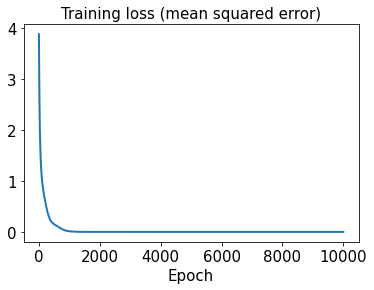

In [84]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

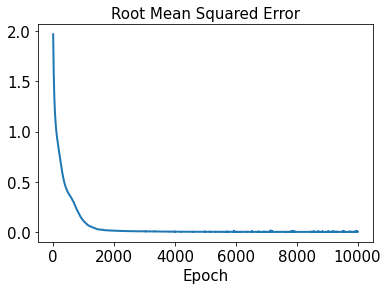

In [85]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [86]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [87]:
decoded_train3 = sd3.predict(t_train)

In [88]:
decoded_test3 = sd3.predict(t_test)

In [89]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [90]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [91]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.0017928523395554876


In [92]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.0064974437807623206


In [93]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.0012699616609824966, 0.0018295820048413354, 0.0009803232345995064, 0.0018598148207744358, 0.0019234636479729685, 0.0023878299371285585, 0.0018099571550117893, 0.0027491316270184837, 0.0015864037940640898, 0.0028476185735699755, 0.002731791832931509, 0.0005054126585212179, 0.0011920467007742964, 0.0011547060652273363, 0.002111407288177599, 0.001146750297435132, 0.002130300048332238, 0.001564018592430679, 0.0012540752197649167, 0.00269983115824888, 0.0030927920182169367, 0.0008366708545712568, 0.003249568752272598, 0.0009648382555215785, 0.0029194103533743214, 0.002250158810284465, 0.001523067530709758, 0.0019711647878575453, 0.0018397112887240164, 0.0019346203362364078, 0.002097365480194778, 0.0013684126261088898, 0.0033340445554744707]


In [94]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.0007329248199780254, 0.0018065065817616994, 0.0019404127588669435, 0.0008169758200841302, 0.0005534446255837344, 0.027937599111986317, 0.0018730327682408494, 0.013502975300312142]


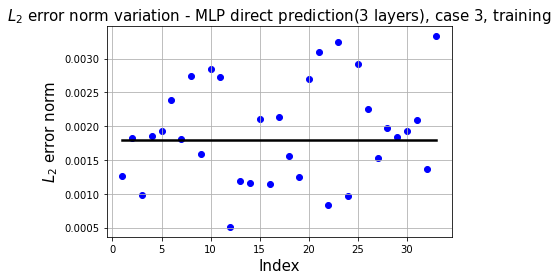

In [107]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

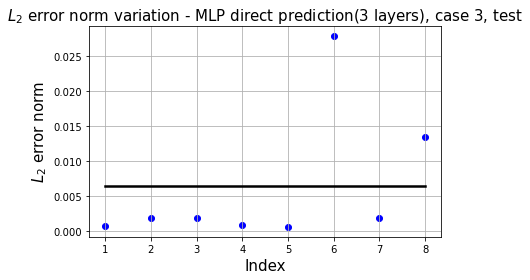

In [108]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

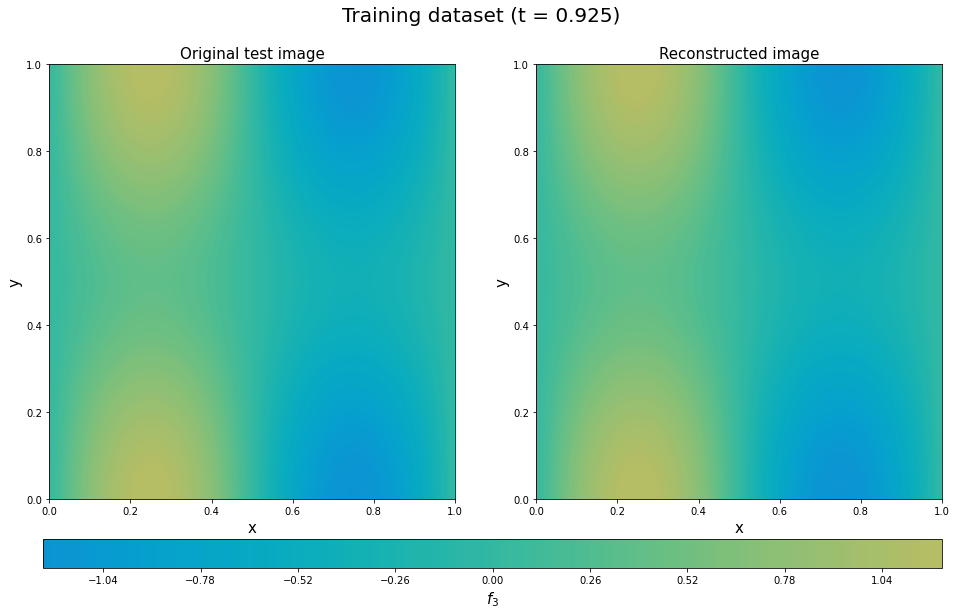

In [97]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

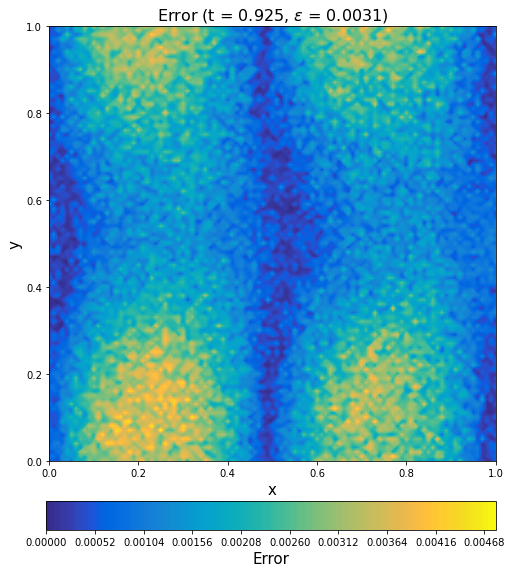

In [98]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

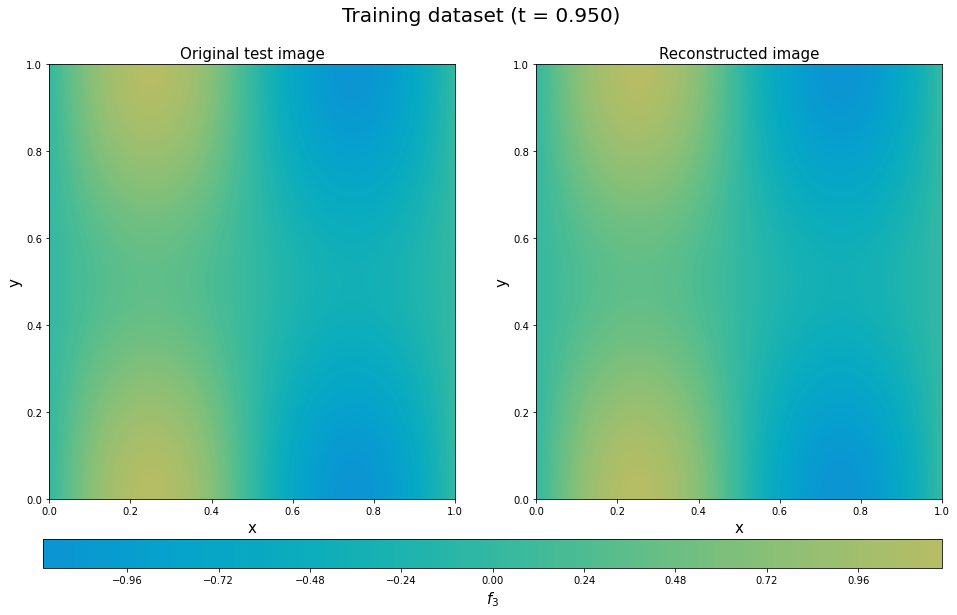

In [99]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

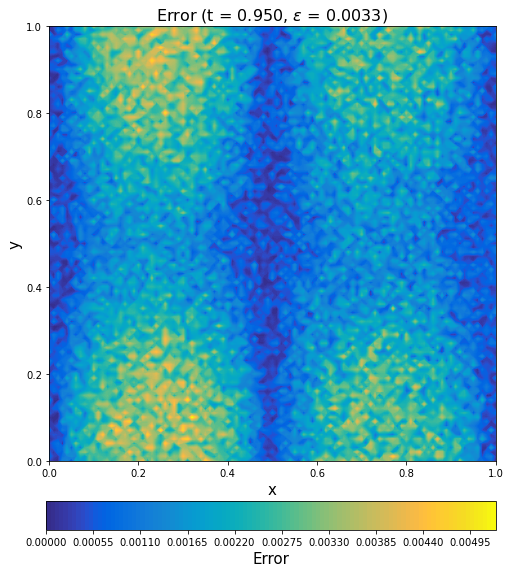

In [100]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

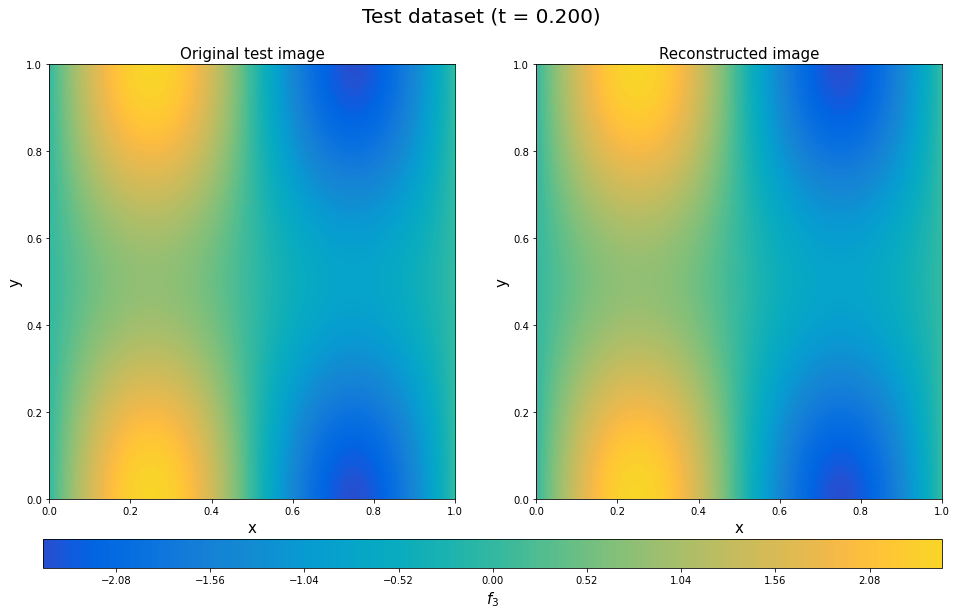

In [101]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

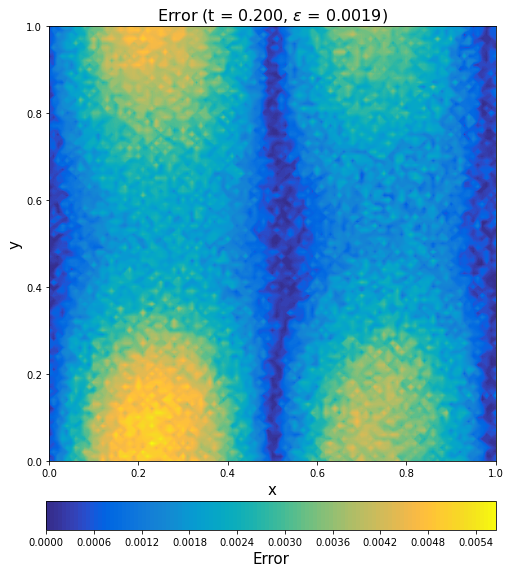

In [102]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

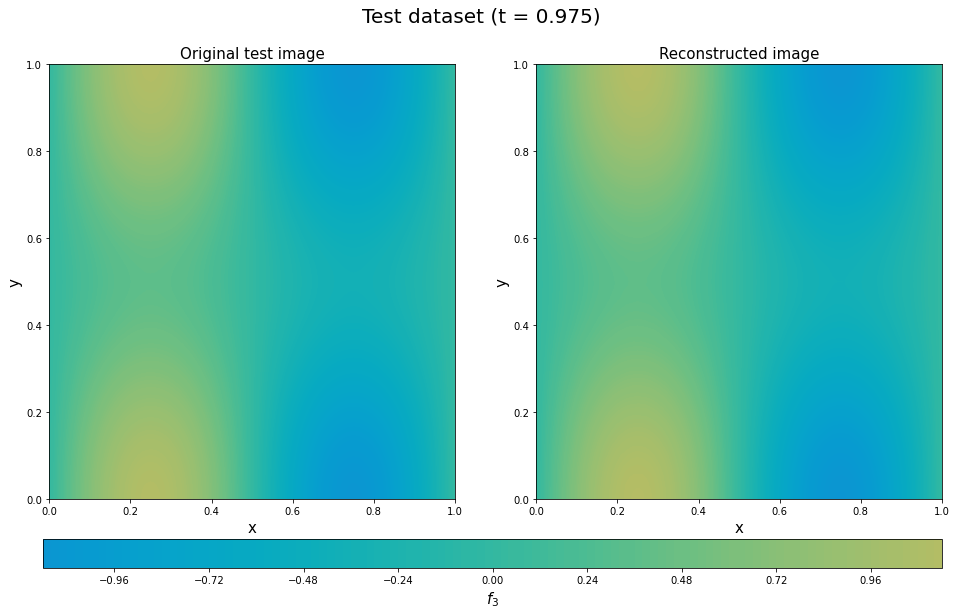

In [103]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

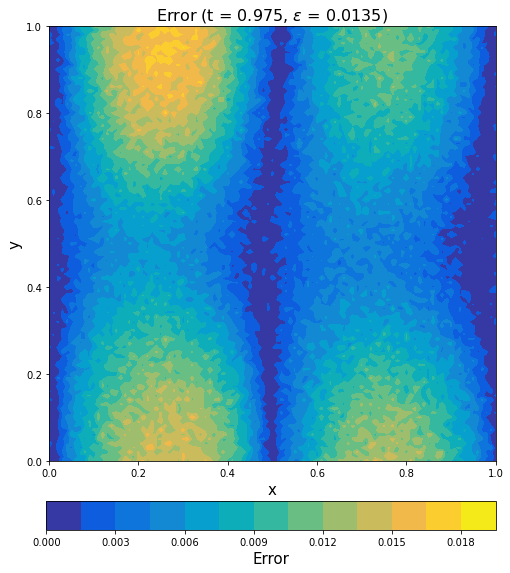

In [104]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()